In [1]:
# Basic Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

# Machine learning Libraries
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [84]:
df=pd.read_csv('LifeExpectancyData.csv')
pd.set_option('display.max_columns', None) 
df.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']
#Canada and France are mislabeled as Developing
df[df['Country']=='France']['Status'].replace('Developing','Developed')
df[df['Country']=='Canada']['Status'].replace('Developing','Developed')
df.head(10)

Country  Year      Status  Life Expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   
5  Afghanistan  2010  Developing             58.8            279.0   
6  Afghanistan  2009  Developing             58.6            281.0   
7  Afghanistan  2008  Developing             58.1            287.0   
8  Afghanistan  2007  Developing             57.5            295.0   
9  Afghanistan  2006  Developing             57.3            295.0   

   Infant Deaths  Alcohol  Percent Expenditure  Hep B  Measles   BMI  \
0             62     0.01            71.279624   65.0     1154  19.1   
1             64     0.01            73.523582   62.0      492  18.6   
2             66     0.01            73.219243   64.0      430  18.1   
3             69     0.01            78.184215   67.0     2787  17.6   
4             71     0.01             7.097109   68.0     3013  17.2   
5             74     0.01            79.679367   66.0     1989  16.7   
6             77     0.01            56.762217   63.0     2861  16.2   
7             80     0.03            25.873925   64.0     1599  15.7   
8             82     0.02            10.910156   63.0     1141  15.2   
9             84     0.03            17.171518   64.0     1990  14.7   

   U-5 Deaths  Polio  Total Expenditure  Diphtheria  HIVAIDS         GDP  \
0          83    6.0               8.16        65.0      0.1  584.259210   
1          86   58.0               8.18        62.0      0.1  612.696514   
2          89   62.0               8.13        64.0      0.1  631.744976   
3          93   67.0               8.52        67.0      0.1  669.959000   
4          97   68.0               7.87        68.0      0.1   63.537231   
5         102   66.0               9.20        66.0      0.1  553.328940   
6         106   63.0               9.42        63.0      0.1  445.893298   
7         110   64.0               8.33        64.0      0.1  373.361116   
8         113   63.0               6.73        63.0      0.1  369.835796   
9         116   58.0               7.43        58.0      0.1  272.563770   

   Population  Thinness 10-19  Thinness 5-9  Income Composition  Schooling  
0  33736494.0            17.2          17.3               0.479       10.1  
1    327582.0            17.5          17.5               0.476       10.0  
2  31731688.0            17.7          17.7               0.470        9.9  
3   3696958.0            17.9          18.0               0.463        9.8  
4   2978599.0            18.2          18.2               0.454        9.5  
5   2883167.0            18.4          18.4               0.448        9.2  
6    284331.0            18.6          18.7               0.434        8.9  
7   2729431.0            18.8          18.9               0.433        8.7  
8  26616792.0            19.0          19.1               0.415        8.4  
9   2589345.0            19.2          19.3               0.405        8.1

AxesSubplot(0.125,0.125;0.698618x0.755)


Year  Life Expectancy  Adult Mortality  Infant Deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percent Expenditure        Hep B        Measles  \
count  2744.000000          2938.000000  2385.000000    2938.000000   
mean      4.602861           738.251295    80.940461    2419.592240   
std       4.052413          1987.914858    25.070016   11467.272489   
min       0.010000             0.000000     1.000000       0.000000   
25%       0.877500             4.685343    77.000000       0.000000   
50%       3.755000            64.912906    92.000000      17.000000   
75%       7.702500           441.534144    97.000000     360.250000   
max      17.870000         19479.911610    99.000000  212183.000000   

               BMI   U-5 Deaths        Polio  Total Expenditure   Diphtheria  \
count  2904.000000  2938.000000  2919.000000         2712.00000  2919.000000   
mean     38.321247    42.035739    82.550188            5.93819    82.324084   
std      20.044034   160.445548    23.428046            2.49832    23.716912   
min       1.000000     0.000000     3.000000            0.37000     2.000000   
25%      19.300000     0.000000    78.000000            4.26000    78.000000   
50%      43.500000     4.000000    93.000000            5.75500    93.000000   
75%      56.200000    28.000000    97.000000            7.49250    97.000000   
max      87.300000  2500.000000    99.000000           17.60000    99.000000   

           HIVAIDS            GDP    Population  Thinness 10-19  Thinness 5-9  \
count  2938.000000    2490.000000  2.286000e+03     2904.000000   2904.000000   
mean      1.742103    7483.158469  1.275338e+07        4.839704      4.870317   
std       5.077785   14270.169342  6.101210e+07        4.420195      4.508882   
min       0.100000       1.681350  3.400000e+01        0.100000      0.100000   
25%       0.100000     463.935626  1.957932e+05        1.600000      1.500000   
50%       0.100000    1766.947595  1.386542e+06        3.300000      3.300000   
75%       0.800000    5910.806335  7.420359e+06        7.200000      7.200000   
max      50.600000  119172.741800  1.293859e+09       27.700000     28.600000   

       Income Composition    Schooling  
count         2771.000000  2775.000000  
mean             0.627551    11.992793  
std              0.210904     3.358920  
min              0.000000     0.000000  
25%              0.493000    10.100000  
50%              0.677000    12.300000  
75%              0.779000    14.300000  
max              0.948000    20.700000

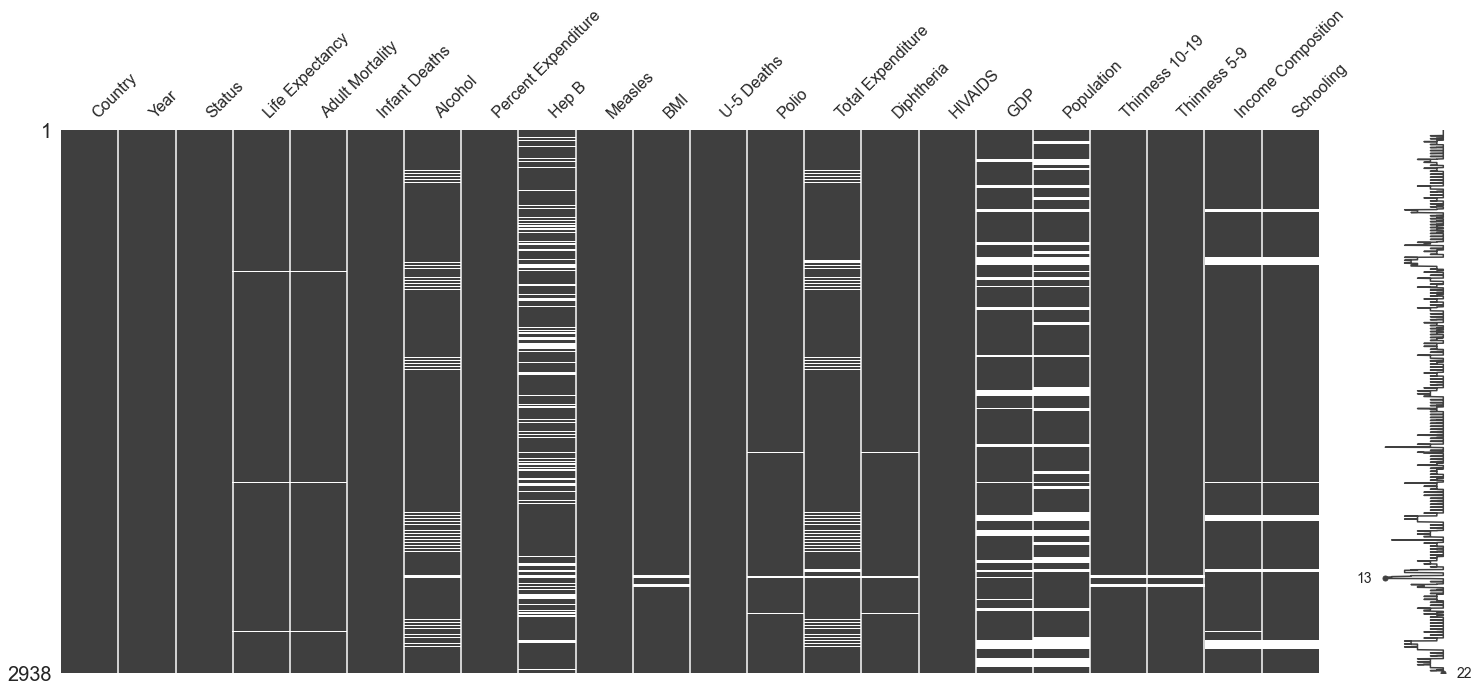

In [85]:
import missingno as msno
print(msno.matrix(df))
df.describe()

<ipython-input-86-6d5359fc6316>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i]=df[df['Country']==country][column].mean()


(2938, 20)
AxesSubplot(0.125,0.125;0.698618x0.755)


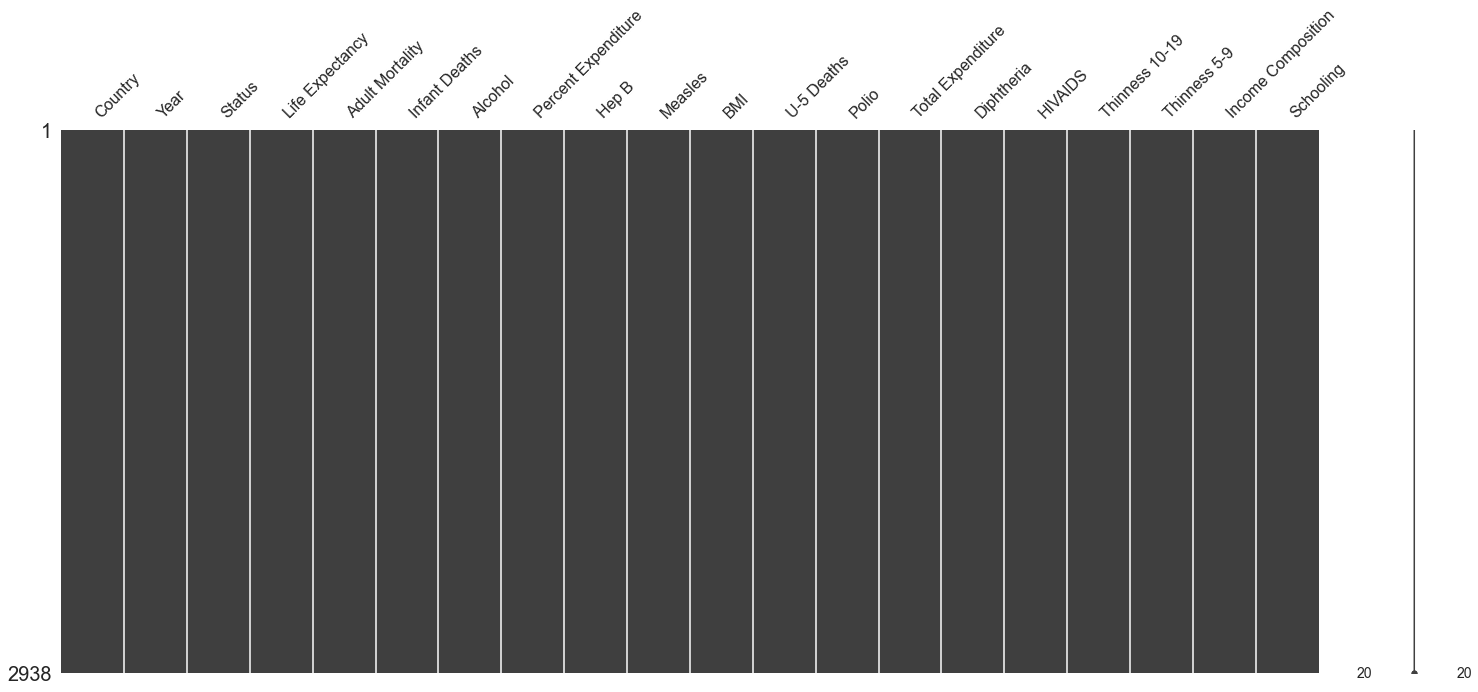

In [86]:
#Drop Population and GDP
df=df.drop(['Population','GDP'],axis=1)

#Replace Missing Values Associated with Country Feature Mean
for column in df.columns:
    for i in range(len(df)): 
        country=df['Country'][i]
        status=df['Country'][i]
        if (df[column].isnull()[i]==True):
            df[column][i]=df[df['Country']==country][column].mean() 
        else:
             pass
#Fill Unresolved Values by Status
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())
df=df2.append(df1)
print(df.shape)
print(msno.matrix(df))


In [88]:
#Features with Outliers 
numcol=['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS', 'Thinness 10-19', 'Thinness 5-9',
       'Income Composition', 'Schooling']
for column in numcol:
    if df[column].quantile(.9973)<df[column].max():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Max',df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif df[column].quantile(0)>df[column].min():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Min',df[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Adult Mortality
99th Percentile 675.2803999999978
Max 723.0
Outliers Present in Column Adult Mortality

Infant Deaths
99th Percentile 1307.0099999999456
Max 1800
Outliers Present in Column Infant Deaths

Alcohol
99th Percentile 15.074906999999962
Max 17.87
Outliers Present in Column Alcohol

Percent Expenditure
99th Percentile 15357.426040963908
Max 19479.91161
Outliers Present in Column Percent Expenditure

Measles
99th Percentile 111472.72849999576
Max 212183
Outliers Present in Column Measles

BMI
99th Percentile 76.72803999999978
Max 87.3
Outliers Present in Column BMI

U-5 Deaths
99th Percentile 1807.0099999999456
Max 2500
Outliers Present in Column U-5 Deaths

Total Expenditure
99th Percentile 16.228740999999776
Max 17.6
Outliers Present in Column Total Expenditure

HIVAIDS
99th Percentile 42.19813999999924
Max 50.6
Outliers Present in Column HIVAIDS

Thinness 10-19
99th Percentile 27.007009999999944
Max 27.7
Outliers Present in Column Thinness 10-19

Thinness 5-9
99th Percentile

In [89]:
df.describe()

Year  Life Expectancy  Adult Mortality  Infant Deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.217738       164.857839      30.303948   
std       4.613841         9.508437       124.084750     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percent Expenditure        Hep B        Measles  \
count  2938.000000          2938.000000  2938.000000    2938.000000   
mean      4.594394           738.251295    78.970357    2419.592240   
std       4.028168          1987.914858    24.607214   11467.272489   
min       0.010000             0.000000     1.000000       0.000000   
25%       0.930000             4.685343    73.500000       0.000000   
50%       3.685000            64.912906    88.000000      17.000000   
75%       7.677500           441.534144    96.000000     360.250000   
max      17.870000         19479.911610    99.000000  212183.000000   

               BMI   U-5 Deaths        Polio  Total Expenditure   Diphtheria  \
count  2938.000000  2938.000000  2938.000000        2938.000000  2938.000000   
mean     38.287849    42.035739    82.396266           5.917162    82.183944   
std      19.930067   160.445548    23.476067           2.456024    23.743205   
min       1.000000     0.000000     3.000000           0.370000     2.000000   
25%      19.400000     0.000000    78.000000           4.280000    78.000000   
50%      43.000000     4.000000    93.000000           5.710000    93.000000   
75%      56.100000    28.000000    97.000000           7.430000    97.000000   
max      87.300000  2500.000000    99.000000          17.600000    99.000000   

           HIVAIDS  Thinness 10-19  Thinness 5-9  Income Composition  \
count  2938.000000     2938.000000   2938.000000         2938.000000   
mean      1.742103        4.848421      4.879169            0.629394   
std       5.077785        4.395274      4.483454            0.207021   
min       0.100000        0.100000      0.100000            0.000000   
25%       0.100000        1.600000      1.600000            0.504250   
50%       0.100000        3.400000      3.400000            0.672000   
75%       0.800000        7.100000      7.200000            0.780000   
max      50.600000       27.700000     28.600000            0.948000   

         Schooling  
count  2938.000000  
mean     12.025459  
std       3.304714  
min       0.000000  
25%      10.300000  
50%      12.300000  
75%      14.300000  
max      20.700000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


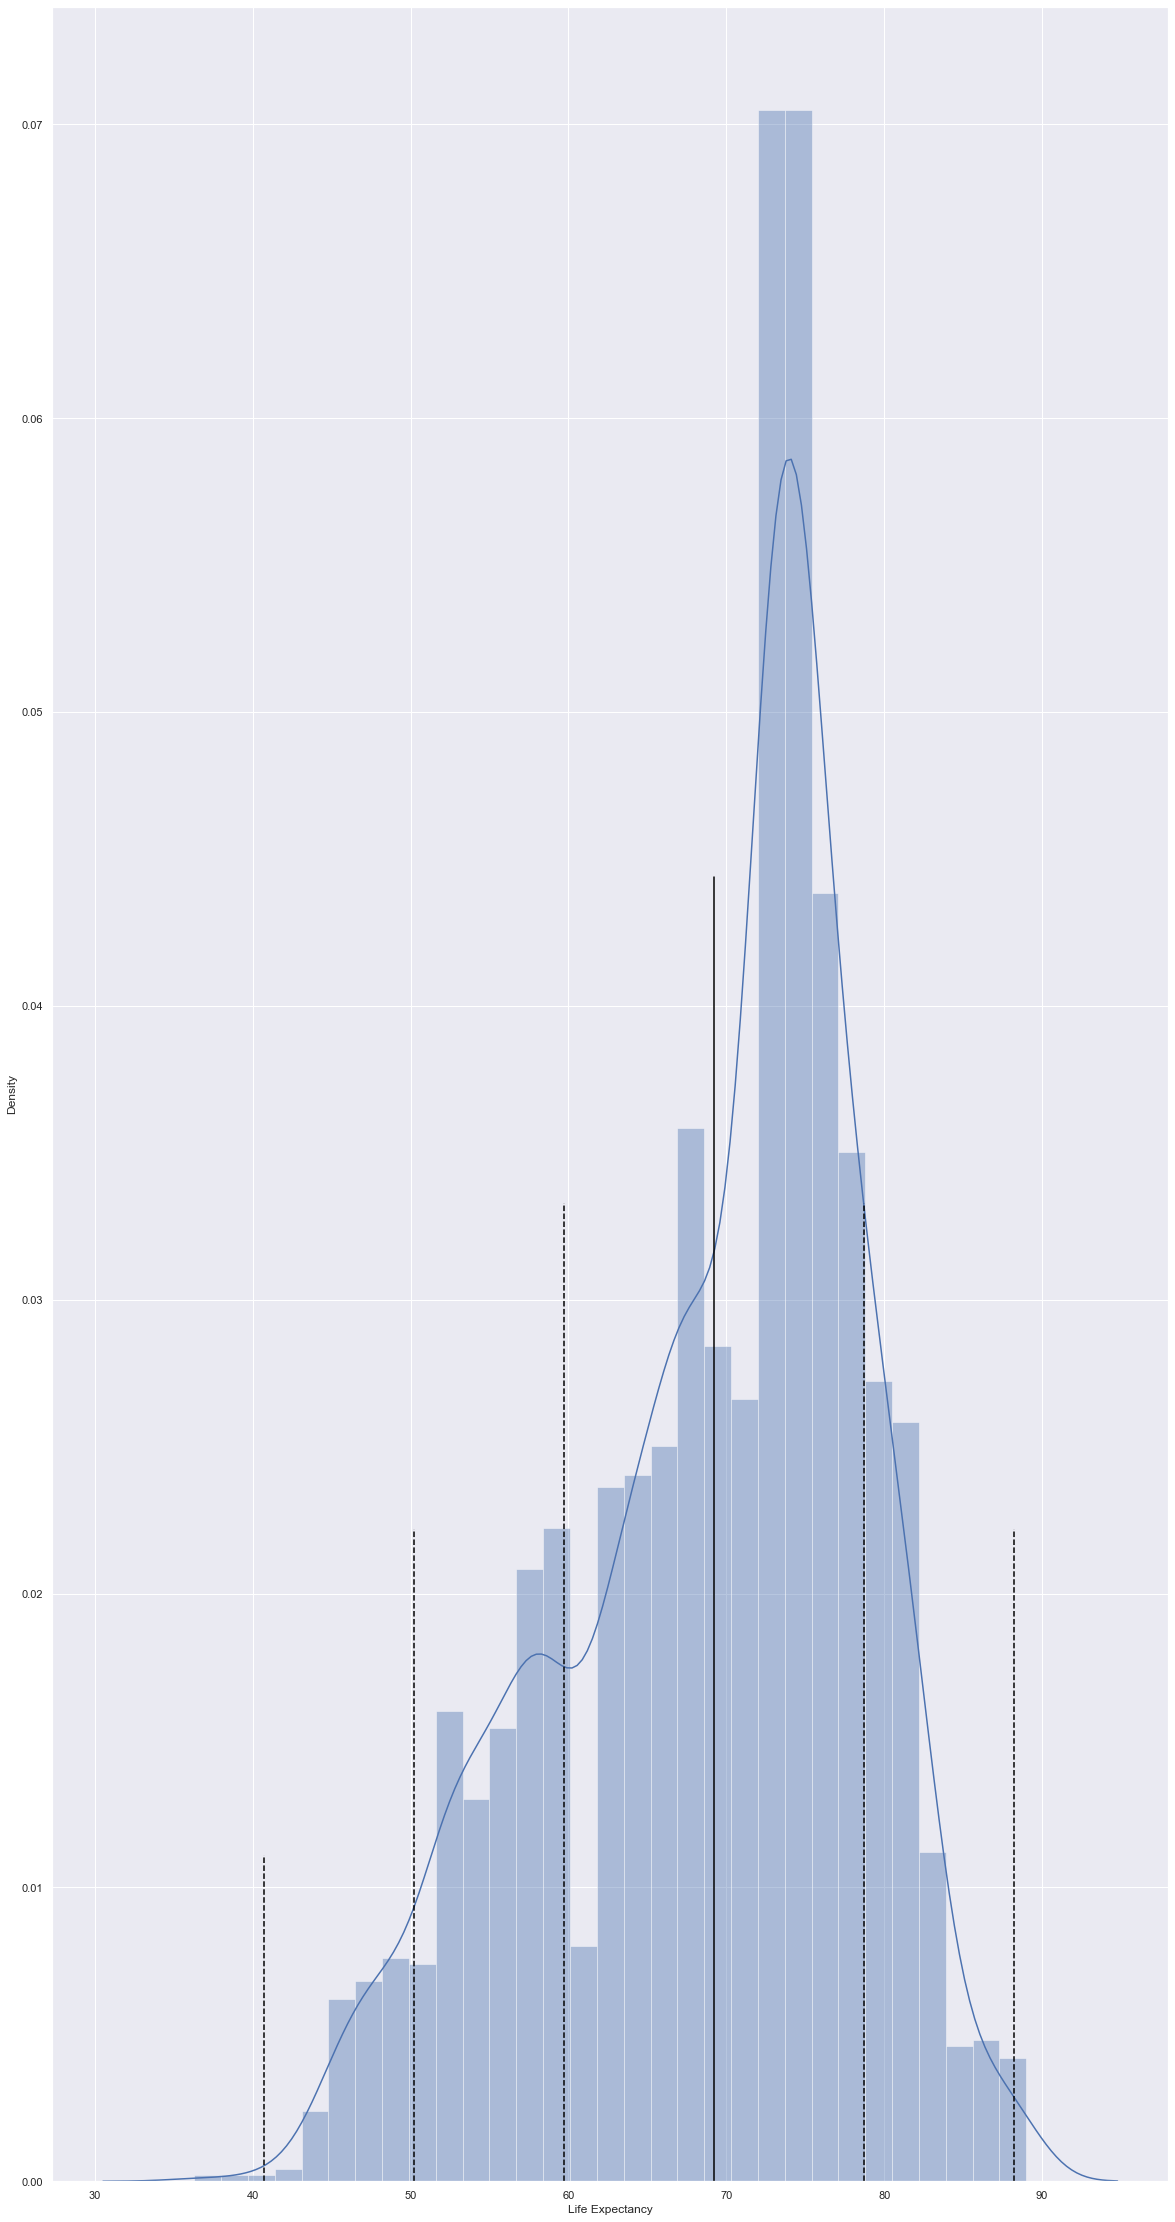

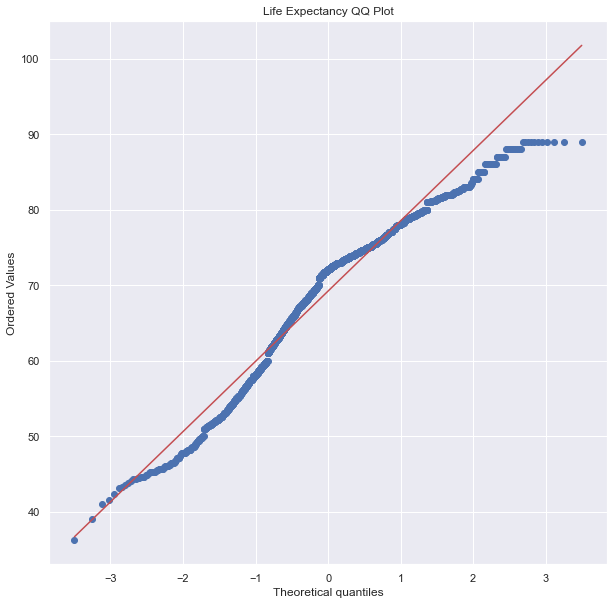

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


In [90]:
#Life Expectancy 
sns.distplot(df['Life Expectancy'])
plt.axvline(df['Life Expectancy'].mean(),0,.6,color='black')
plt.axvline(df['Life Expectancy'].mean()+df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()+2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-3*df['Life Expectancy'].std(),0,.15,color='black',linestyle='--')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy QQ Plot')
plt.show()
print(stats.shapiro(df['Life Expectancy']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


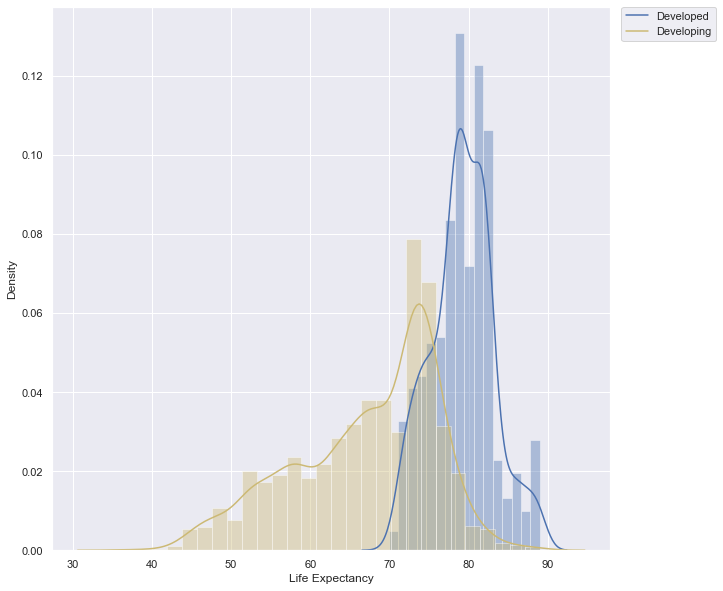

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


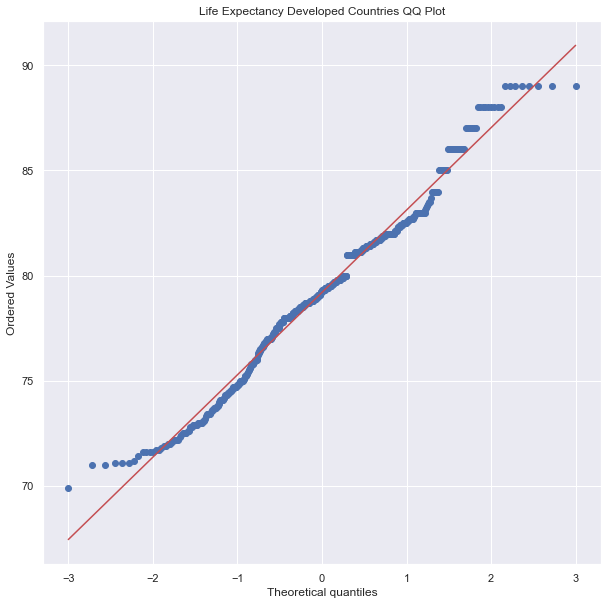

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


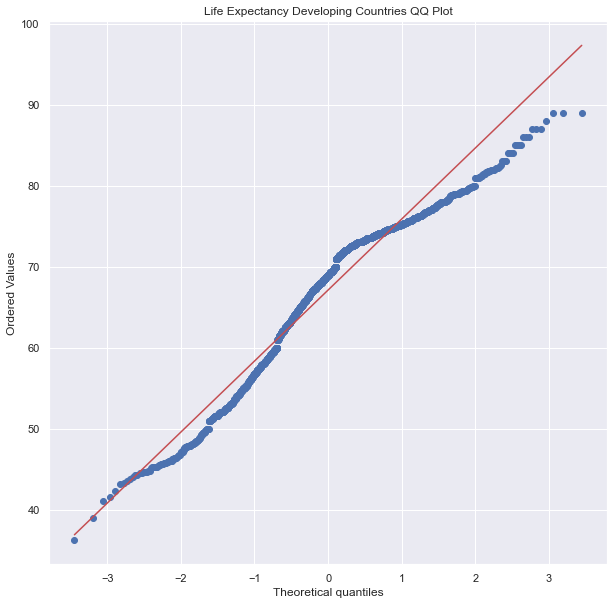

In [92]:
#Life Expectancy 
sns.distplot(df[df['Status']=='Developed']['Life Expectancy'])
sns.distplot(df[df['Status']=='Developing']['Life Expectancy'],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df[df['Status']=='Developed']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developed Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
#QQ plot   
stats.probplot(df[df['Status']=='Developing']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developing Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()


In [31]:
df['Life Expectancy'].groupby(df['Status']).describe()

count       mean       std   min   25%    50%   75%   max
Status                                                                
Developed    512.0  79.197852  3.930942  69.9  76.8  79.25  81.7  89.0
Developing  2426.0  67.111465  8.987504  36.3  61.1  69.00  74.0  89.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

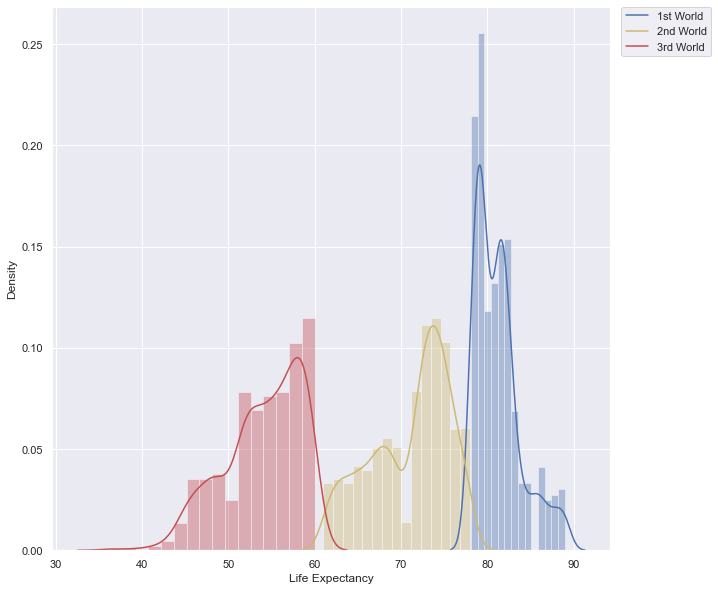

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


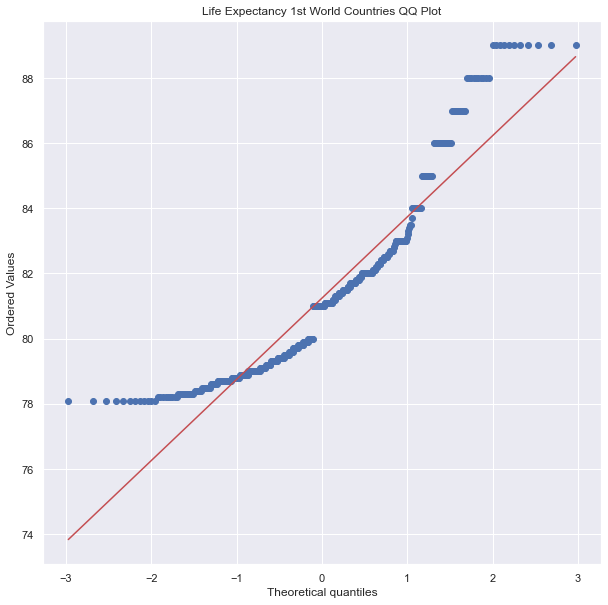

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


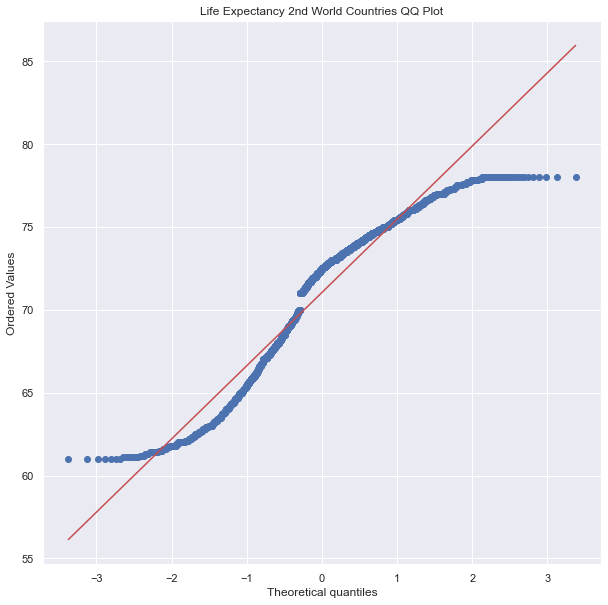

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


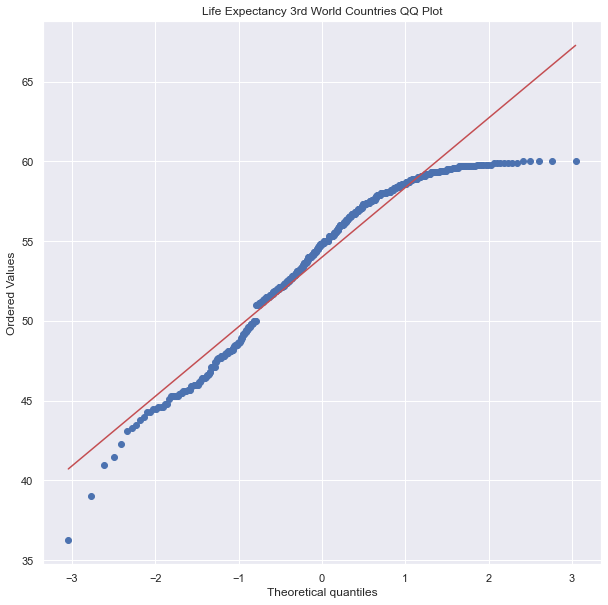

count       mean       std   min     25%   50%   75%   max
world                                                             
3       594.0  53.994613  4.483506  36.3  51.425  54.8  57.9  60.0
2      1877.0  71.043108  4.554366  61.0  67.500  72.5  74.6  78.0
1       467.0  81.244111  2.640365  78.1  79.100  81.0  82.3  89.0

In [94]:
bins=[36,60,78,90]
labels=[3,2,1]
df['world']=pd.cut(df['Life Expectancy'],bins=bins,labels=labels)

#Life Expectancy 
sns.distplot(df[df['world']==1]['Life Expectancy'])
sns.distplot(df[df['world']==2]['Life Expectancy'],color='y')
sns.distplot(df[df['world']==3]['Life Expectancy'],color='r')

labels=['1st World','2nd World','3rd World']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df[df['world']==1]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 1st World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
#QQ plot   
stats.probplot(df[df['world']==2]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 2nd World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()

stats.probplot(df[df['world']==3]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 3rd World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
df['Life Expectancy'].groupby(df['world']).describe()


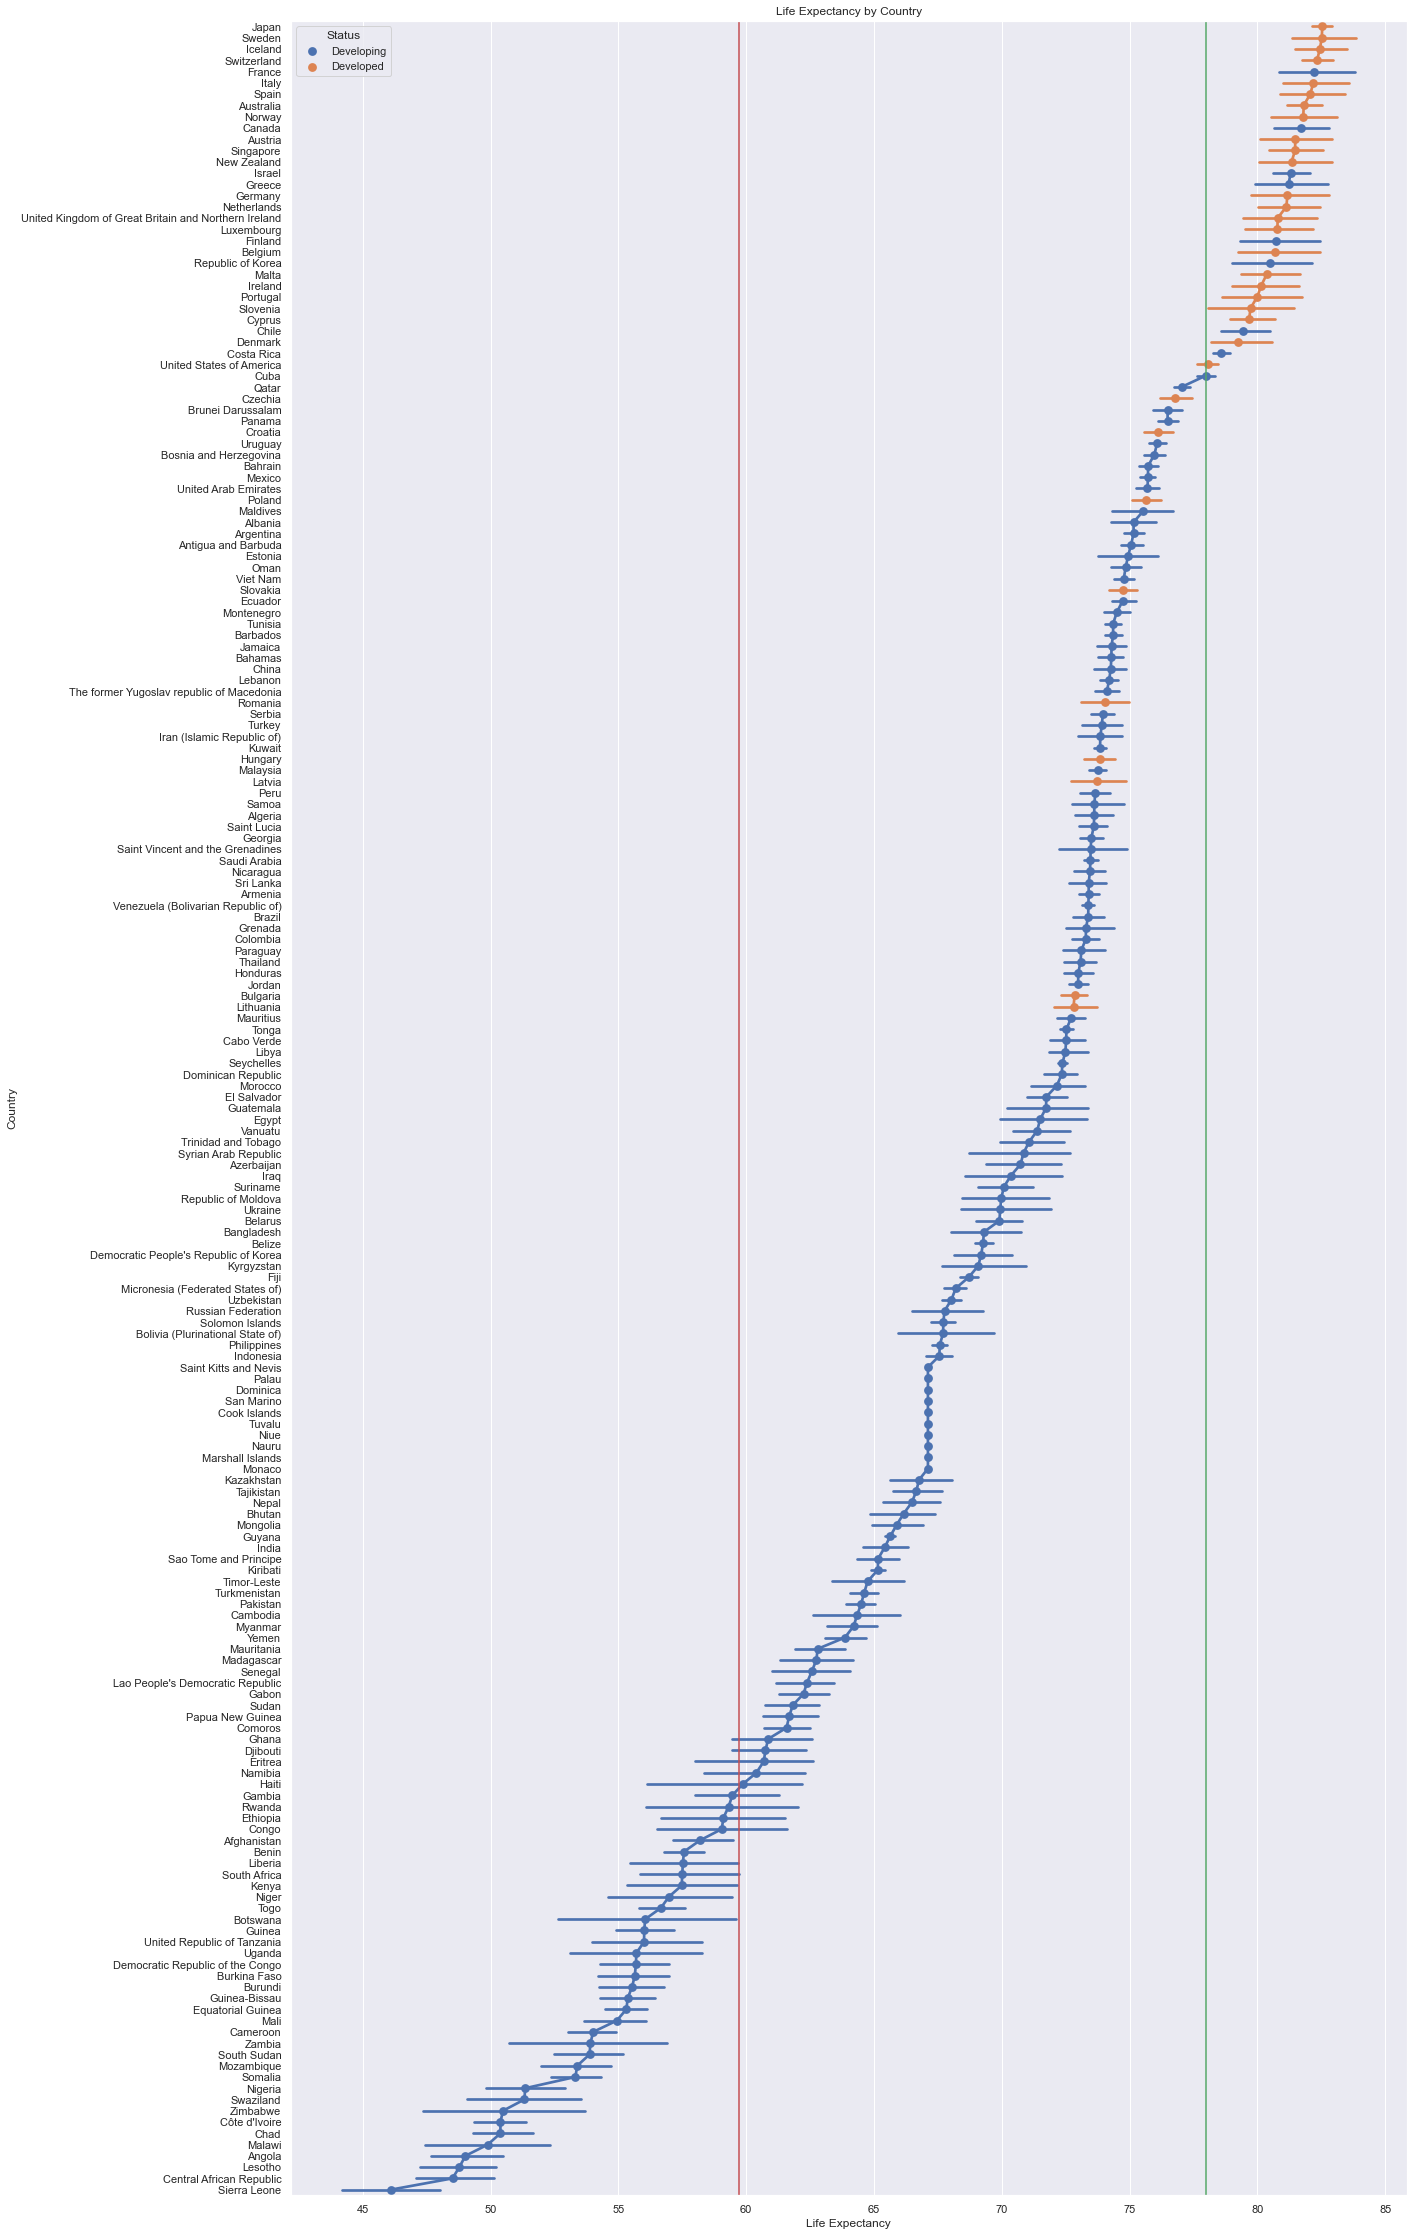

In [96]:
LEcountry=df.groupby(df['Country'])['Life Expectancy'].mean().sort_values(kind="quicksort",ascending=False)
sns.pointplot(y='Country',x='Life Expectancy',hue='Status',data=df,order=LEcountry.index,join=True)
plt.title( 'Life Expectancy by Country')
plt.axvline(78,0,10,color='g')
plt.axvline(df['Life Expectancy'].mean()-df['Life Expectancy'].std(),0,10,color='r')
sns.set(rc={'figure.figsize':(40,40)})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Developed or Developing Country Status
Developing    0.825732
Developed     0.174268
Name: Status, dtype: float64


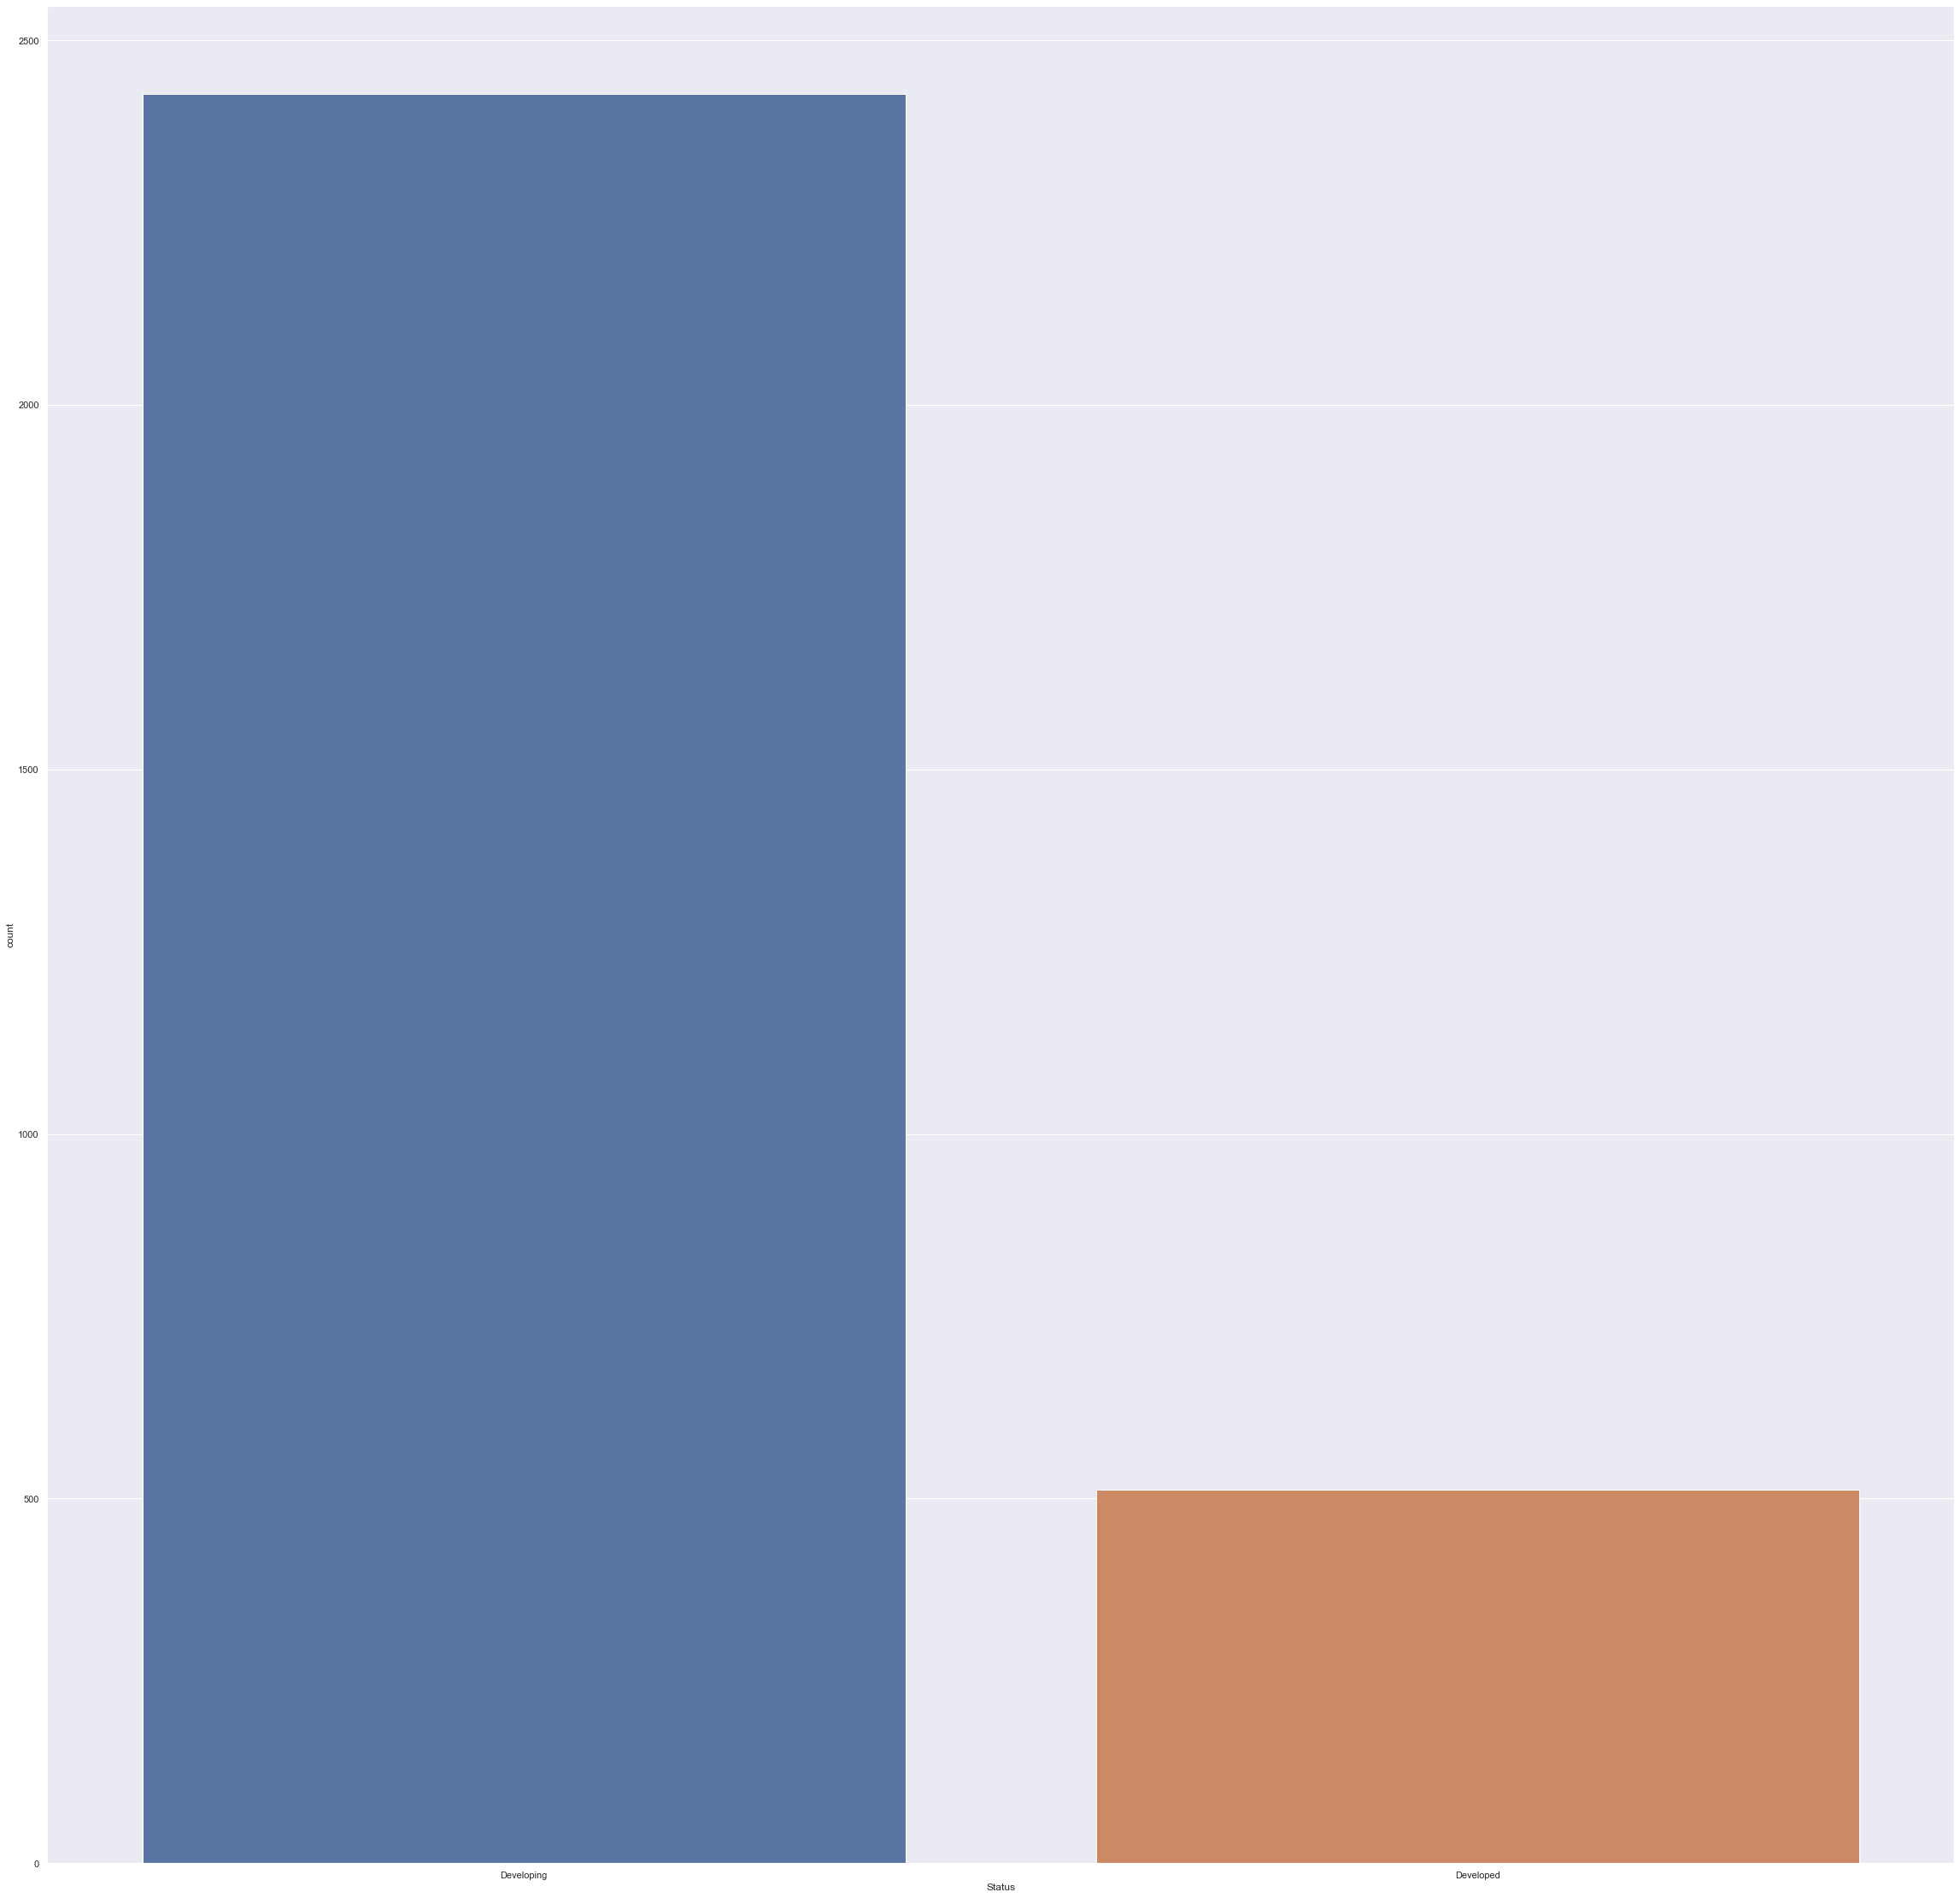

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1st,2nd,and 3rd World Countries
2    123.0
3     39.0
1     31.0
Name: world, dtype: float64


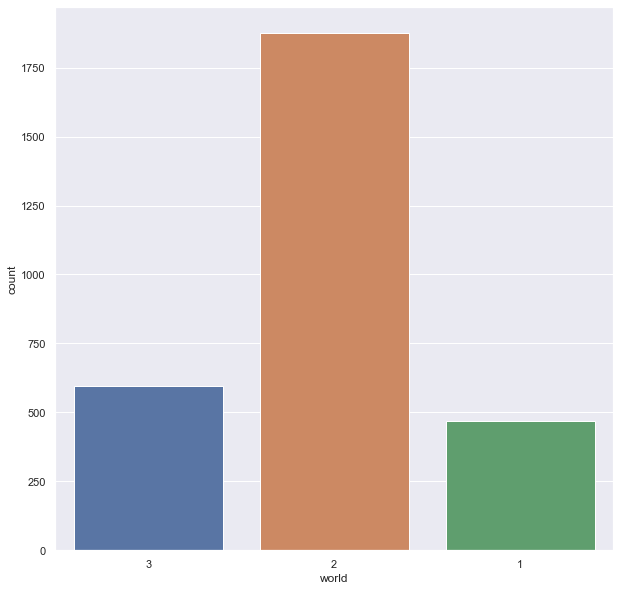

In [97]:
sns.countplot(df['Status'])
print('Developed or Developing Country Status')
print(df.Status.value_counts()/len(df.Status))
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

sns.countplot(df['world'])
print('1st,2nd,and 3rd World Countries')
print(((df.world.value_counts()/len(df.world))*193).round(0))
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

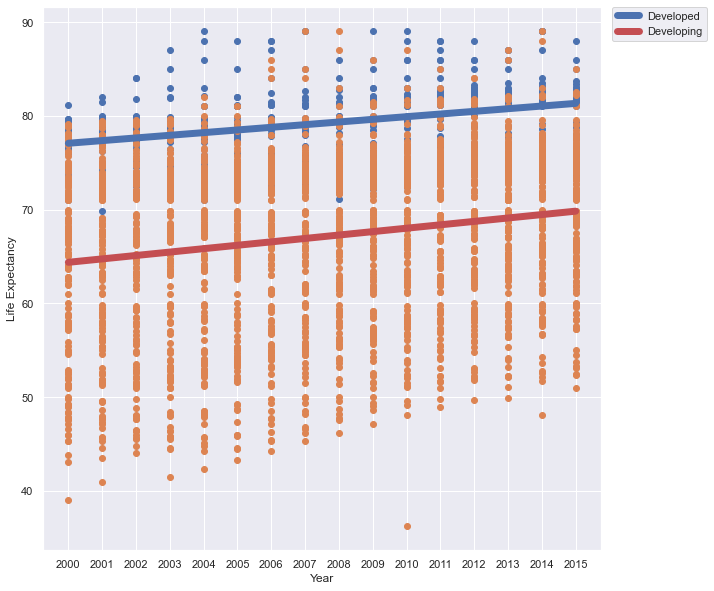

In [98]:
def LEfactorplot(column):
    x=df[df['Status']=='Developed'][column]
    y=df[df['Status']=='Developed']['Life Expectancy']
    x1=df[df['Status']=='Developing'][column]
    y1=df[df['Status']=='Developing']['Life Expectancy']
    #Fit Lines
    z1 =np.polyfit(x,y,1)
    z2 =np.polyfit(x1,y1,1)
    z1poly = np.poly1d(z1) 
    z2poly = np.poly1d(z2)

    #Plot
    plt.scatter(x,y,alpha=1)
    plt.scatter(x1,y1,alpha=1)
    plt.plot(x,z1poly(x),linewidth=7.0)
    plt.plot(x1,z2poly(x1),linewidth=7.0,color='r')
    labels=['Developed','Developing']
    plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Life Expectancy')
    plt.xlabel(column)
LEfactorplot('Year')
plt.xticks(np.arange(2000,2016,1))
plt.show()

<ipython-input-99-632fe7d846ea>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)
<ipython-input-99-632fe7d846ea>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))


Correlation Values for the 193 countries left after Data Cleaning:


Life Expectancy  Schooling              0.732084
                 Income Composition     0.708651
                 BMI                    0.560105
                 Diphtheria             0.483574
                 Polio                  0.470396
                 Alcohol                0.407103
                 Percent Expenditure    0.381990
                 Hep B                  0.314744
                 Total Expenditure      0.226319
                 Year                   0.168709
                 Measles               -0.157401
                 Infant Deaths         -0.196324
                 U-5 Deaths            -0.222286
                 Thinness 5-9          -0.468218
                 Thinness 10-19        -0.473757
                 HIVAIDS               -0.556165
                 Adult Mortality       -0.696386
dtype: float64

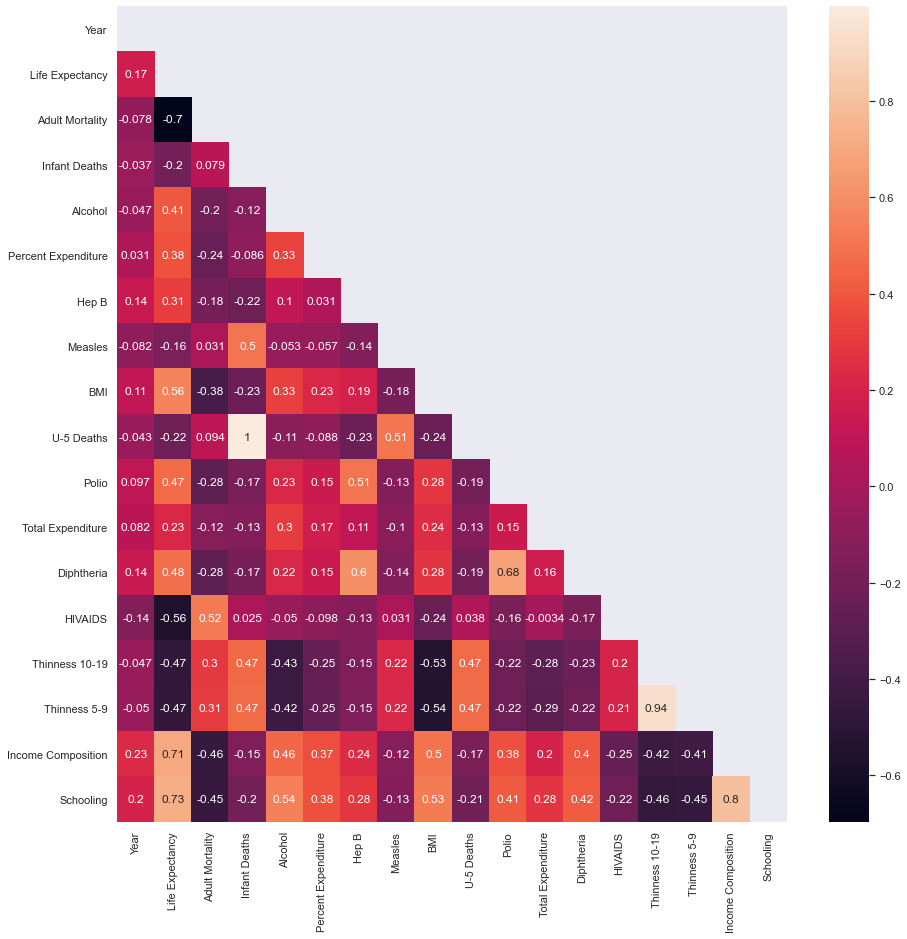

In [99]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,mask=mask)
sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))
LE=pd.Series(corrmat.unstack()[18:36]).sort_values(kind="quicksort",ascending=False)
print('Correlation Values for the {} countries left after Data Cleaning:'.format(len(df['Country'].unique())))
LE[1:18]

In [100]:
print('Top 10 Correlated Features Pairs:')
print(sol[0:10],'\n')
print('Bottom 10 Correlated Features Pairs:')
print(sol[143:153])

Top 10 Correlated Features Pairs:
Infant Deaths       U-5 Deaths            0.996629
Thinness 10-19      Thinness 5-9          0.939122
Income Composition  Schooling             0.801269
Life Expectancy     Schooling             0.732084
                    Income Composition    0.708651
Polio               Diphtheria            0.676641
Hep B               Diphtheria            0.600456
Life Expectancy     BMI                   0.560105
Alcohol             Schooling             0.541402
BMI                 Schooling             0.529271
dtype: float64 

Bottom 10 Correlated Features Pairs:
Adult Mortality  Schooling            -0.451296
Thinness 5-9     Schooling            -0.452244
Adult Mortality  Income Composition   -0.455119
Thinness 10-19   Schooling            -0.462581
Life Expectancy  Thinness 5-9         -0.468218
                 Thinness 10-19       -0.473757
BMI              Thinness 10-19       -0.532155
                 Thinness 5-9         -0.539039
Life Expectancy  H

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

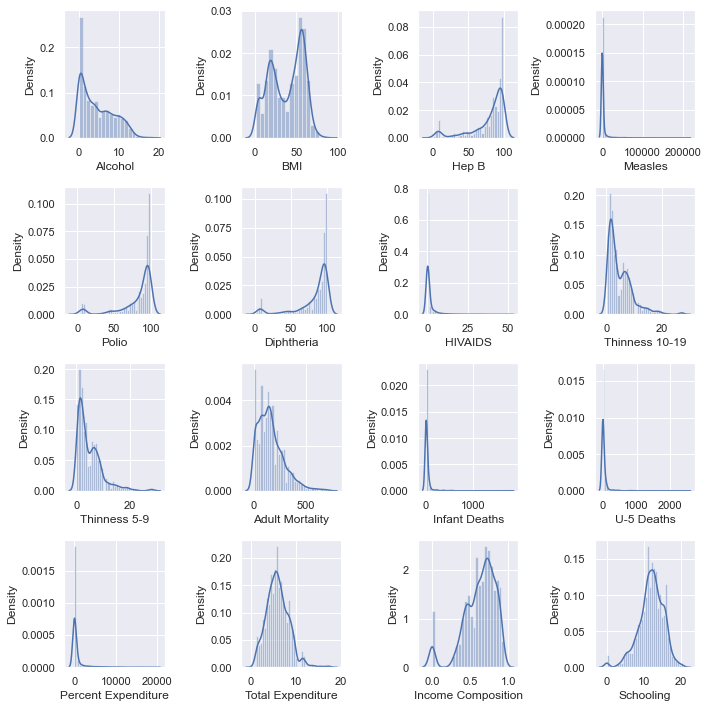

In [101]:
columns=['Alcohol','BMI','Hep B','Measles','Polio','Diphtheria','HIVAIDS','Thinness 10-19',
         'Thinness 5-9','Adult Mortality','Infant Deaths','U-5 Deaths','Percent Expenditure'
         ,'Total Expenditure','Income Composition','Schooling']

for column,i in zip(columns,range(len(columns))):
    plt.subplot(4,4,i+1)
    sns.distplot(df[column])  
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(20,20)})

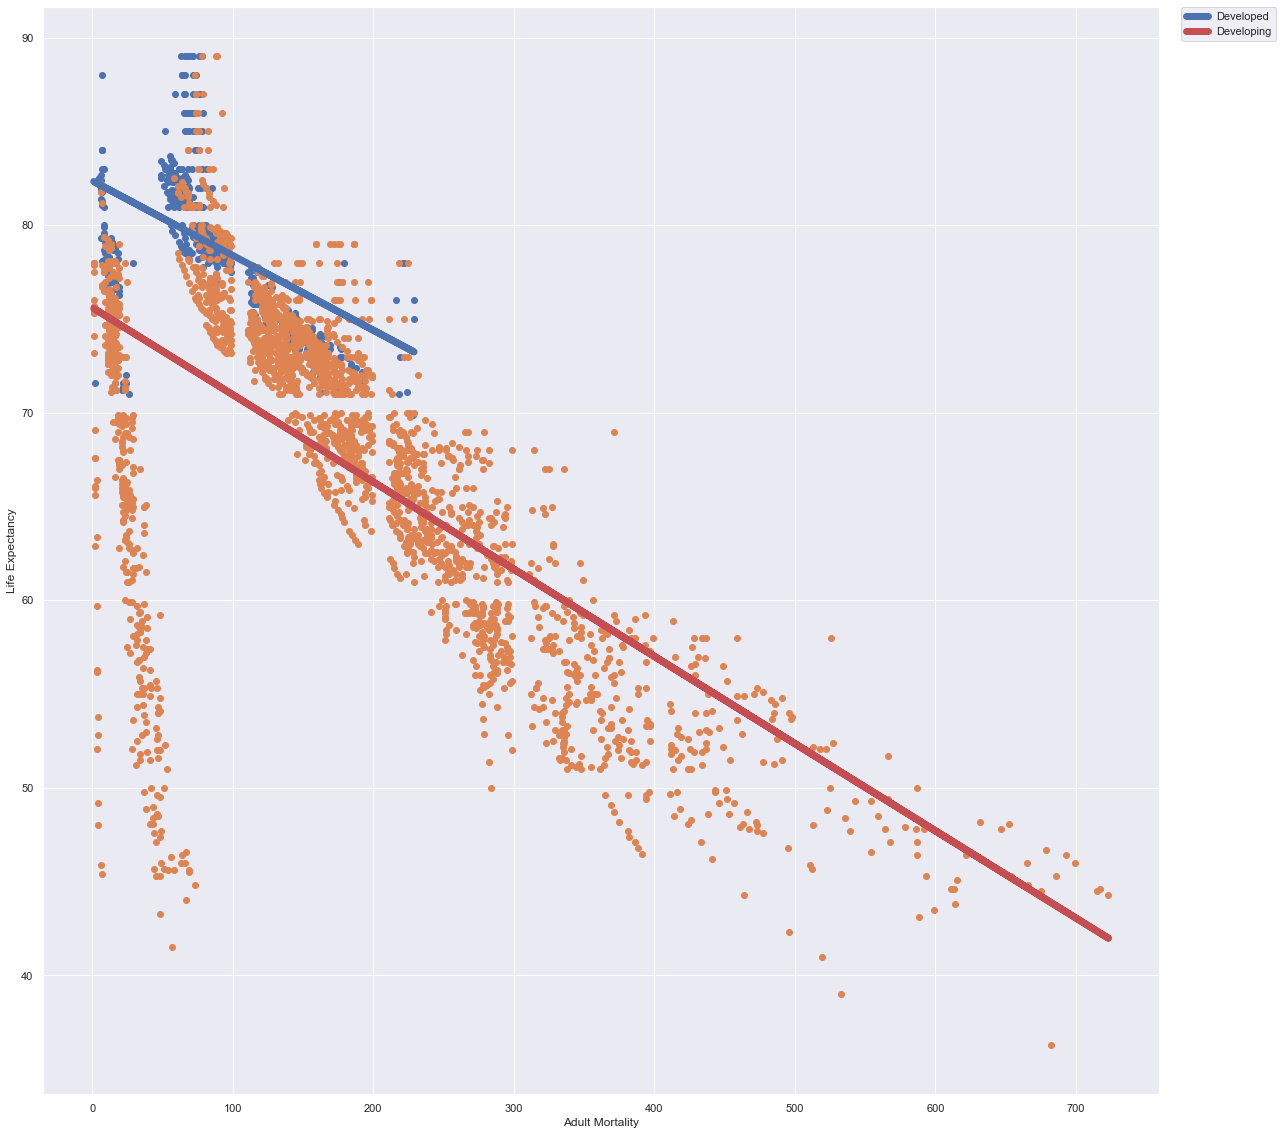

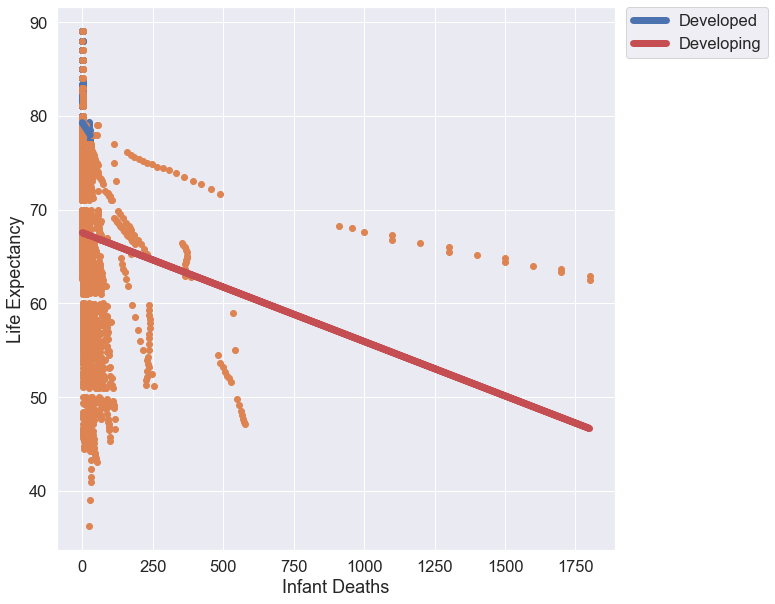

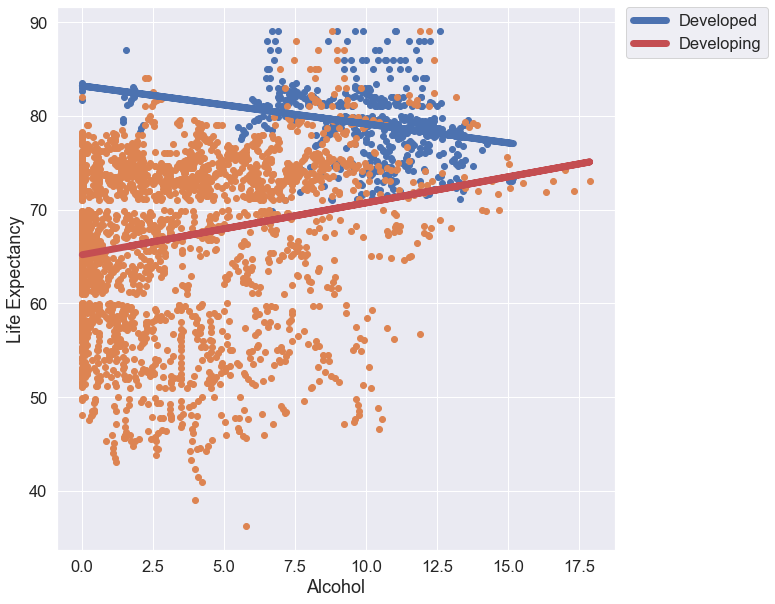

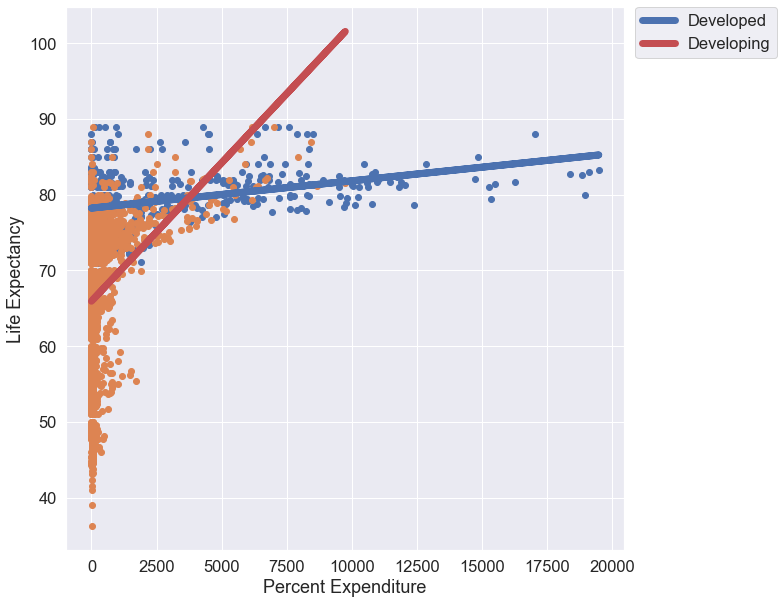

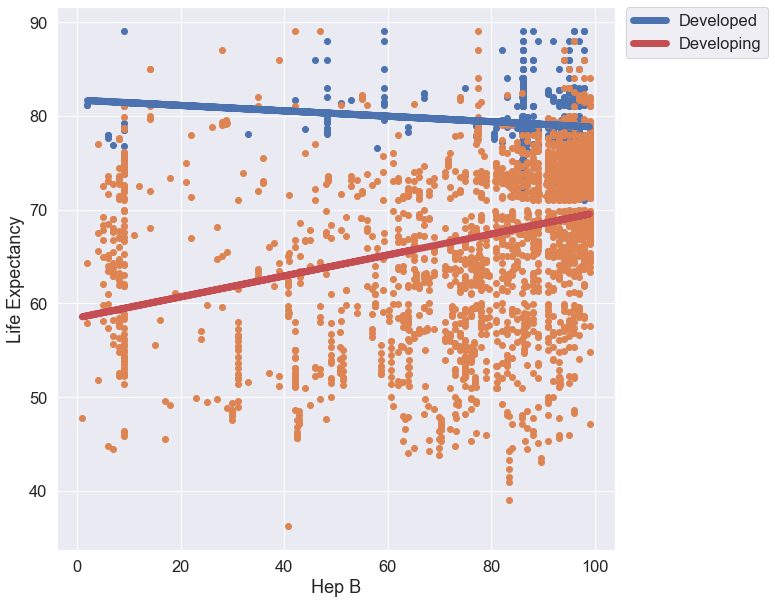

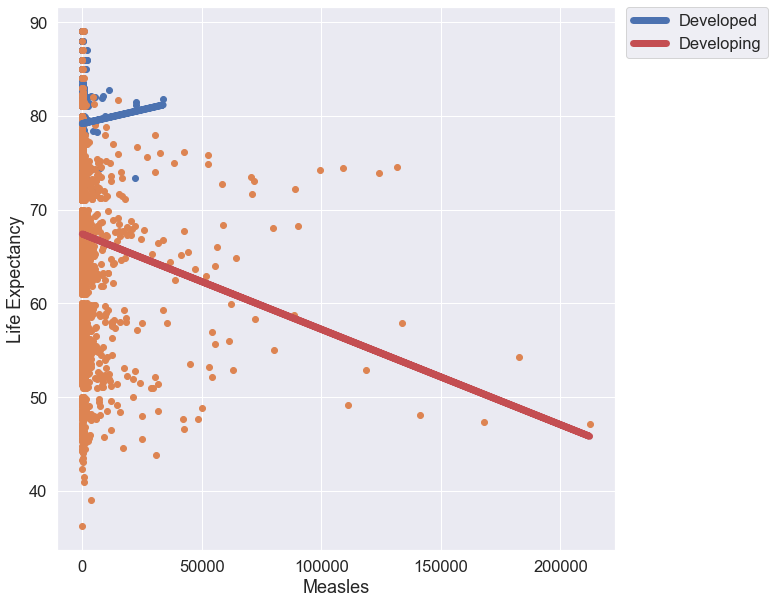

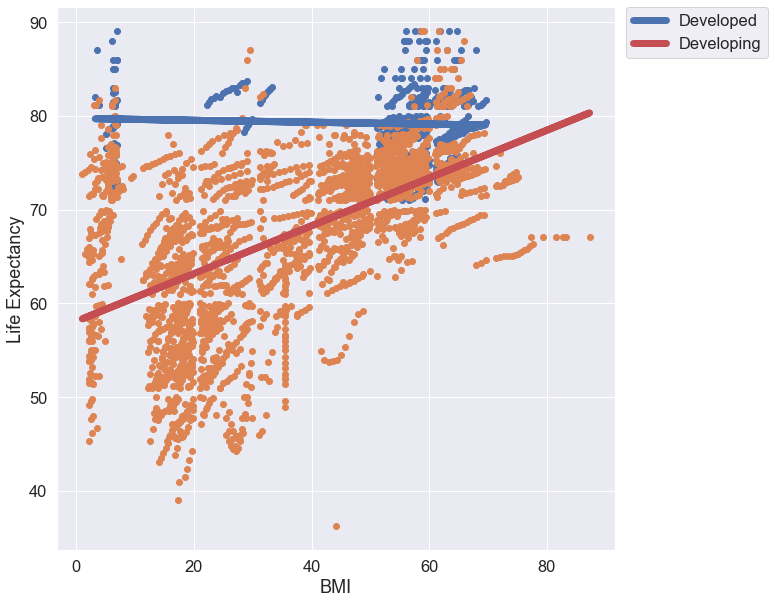

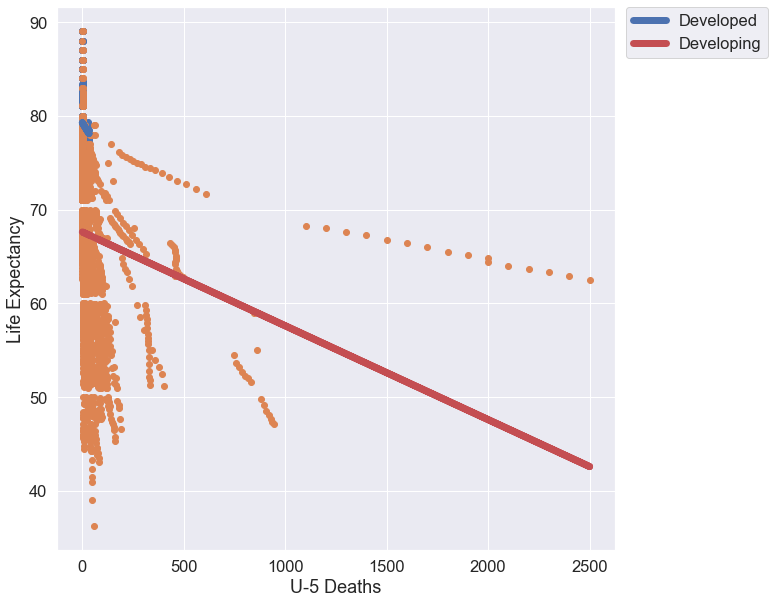

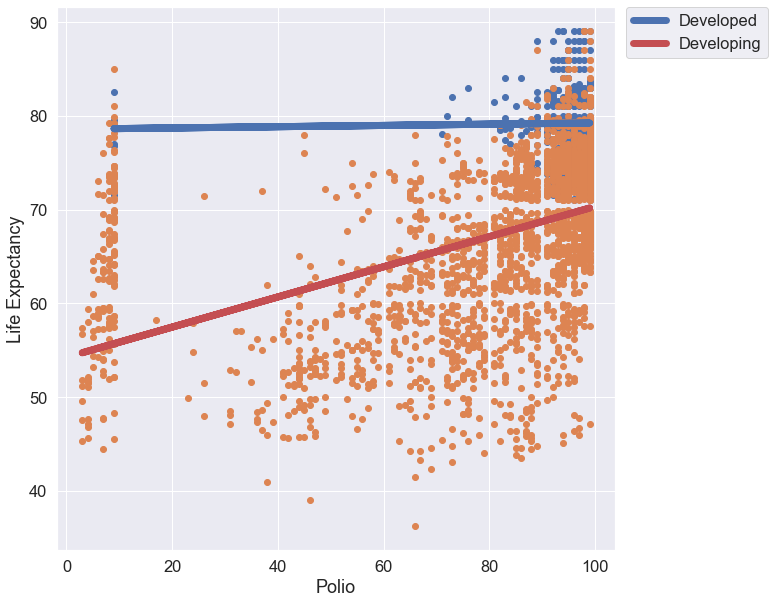

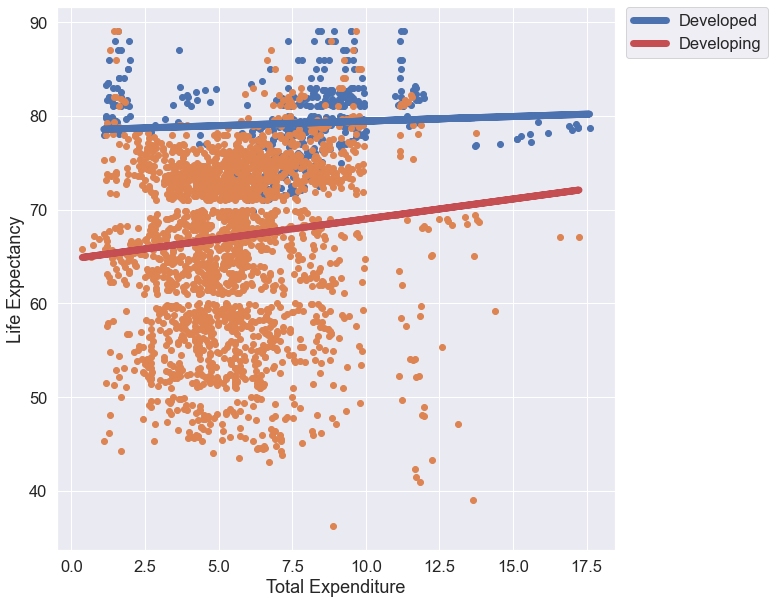

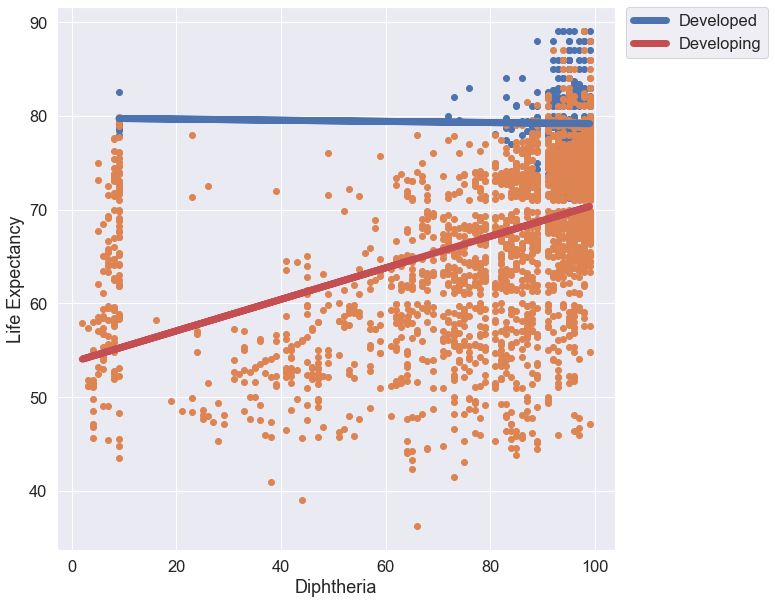

<ipython-input-102-0f9bea750ed4>:5: RankWarning: Polyfit may be poorly conditioned
  LEfactorplot(column)


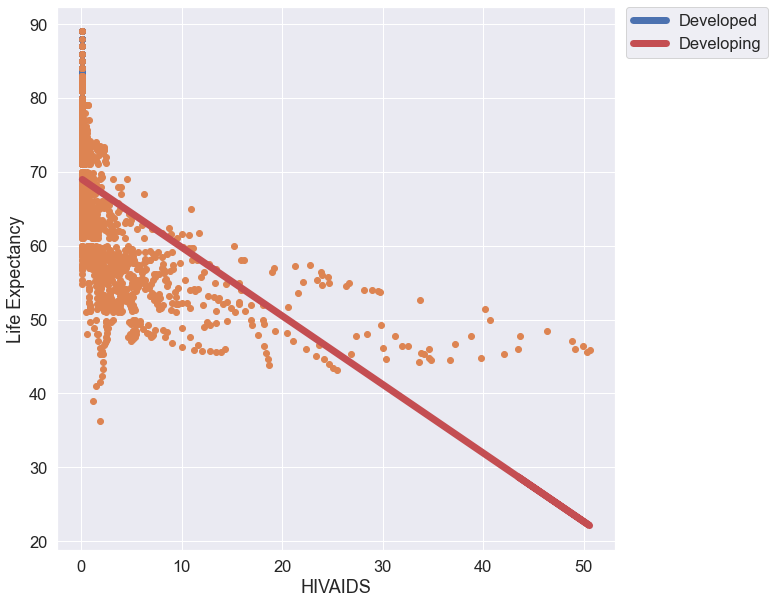

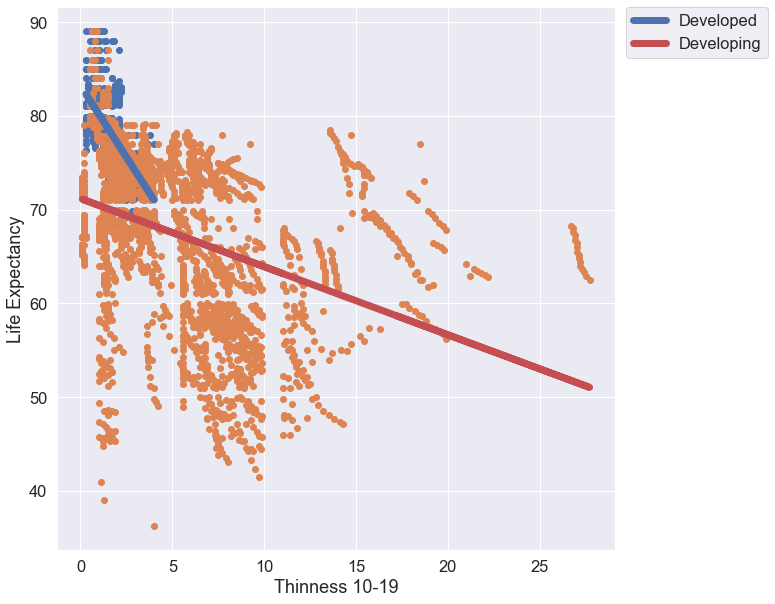

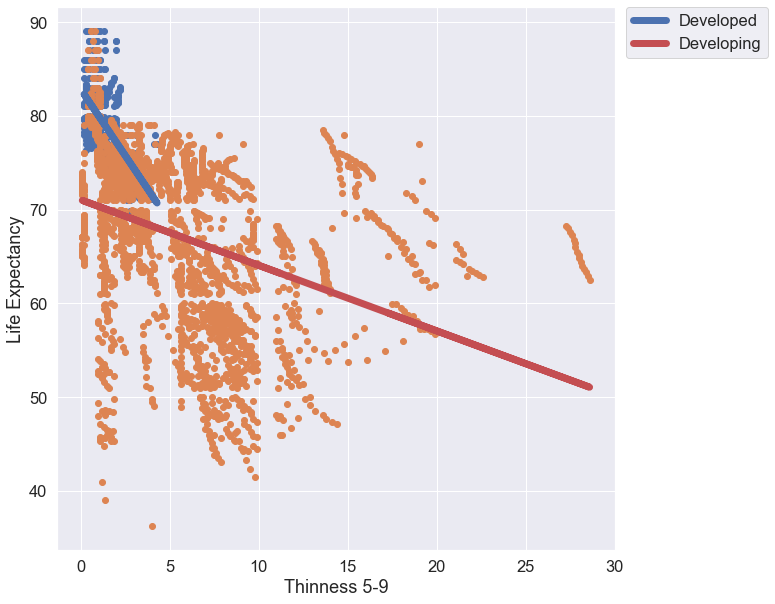

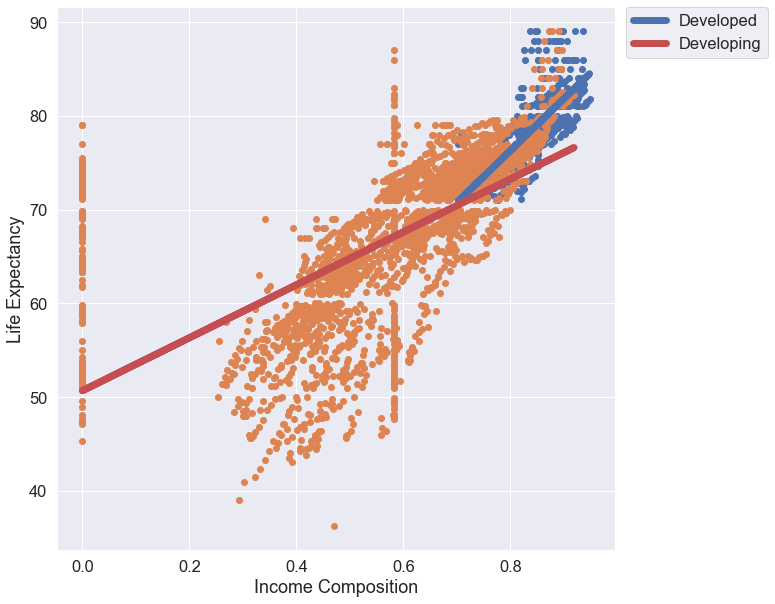

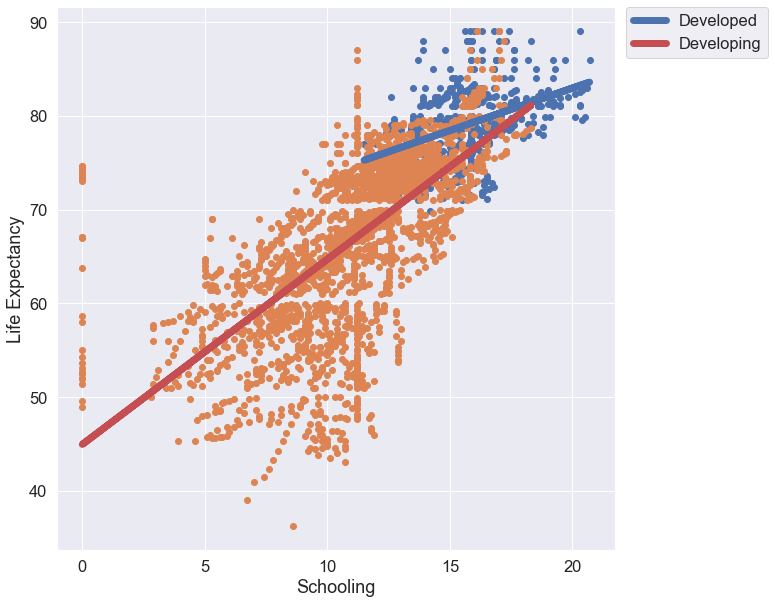

In [102]:
for column in df.columns:
    if (column=='Country')or(column=='Status')or(column=='Life Expectancy')or(column=='world')or(column=='Year'):
        pass
    else:
        LEfactorplot(column)
        sns.set(rc={'figure.figsize':(10,10)})
        sns.set(font_scale=1.5)
        plt.show()

# Machine Learning

## Regression

In [103]:
#Encode Country and Create copy of dataframe for regression 
df_reg=df.copy()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_reg["country_code"] = lb_make.fit_transform(df_reg["Country"])


#Binarize Status
df_reg['Status']=np.where(df_reg['Status']=='Developing',0,1)

df_reg.columns=['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percent_Expenditure', 'Hep_B', 'Measles',
       'BMI', 'U_5_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'Thinness_10_19', 'Thinness_5_9', 'Income_Composition',
       'Schooling', 'world', 'country_code']

In [104]:
#remove outliers
for col in df_reg.columns:
    if (col=='world')or (col=='Country'):
        pass
    else:
        df_reg=df_reg[np.abs(df_reg[col]-df_reg[col].mean())<=(3*df_reg[col].std())]

In [105]:
#Developed Training Data
X_developed_train=df_reg[(df_reg['Status']==1)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_developed_train=df_reg[(df_reg['Status']==1)&(df_reg['Year']<2011)]['Life_Expectancy']

#Developed Testing Data
X_developed_test=df_reg[(df_reg['Status']==1)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_developed_test=df_reg[(df_reg['Status']==1)&(df_reg['Year']>2011)]['Life_Expectancy']

#Developing Training Data
X_developing_train=df_reg[(df_reg['Status']==0)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_developing_train=df_reg[(df_reg['Status']==0)&(df_reg['Year']<2011)]['Life_Expectancy']

#Developing Testing Data
X_developing_test=df_reg[(df_reg['Status']==0)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_developing_test=df_reg[(df_reg['Status']==0)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=1 Training Data
X_world1_train=df_reg[(df_reg['world']==1)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world1_train=df_reg[(df_reg['world']==1)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=1 Testing Data
X_world1_test=df_reg[(df_reg['world']==1)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world1_test=df_reg[(df_reg['world']==1)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=2 Training Data
X_world2_train=df_reg[(df_reg['world']==2)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world2_train=df_reg[(df_reg['world']==2)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=2 Testing Data
X_world2_test=df_reg[(df_reg['world']==2)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world2_test=df_reg[(df_reg['world']==2)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=3 Training Data
X_world3_train=df_reg[(df_reg['world']==3)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world3_train=df_reg[(df_reg['world']==3)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=3 Testing Data
X_world3_test=df_reg[(df_reg['world']==3)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world3_test=df_reg[(df_reg['world']==3)&(df_reg['Year']>2011)]['Life_Expectancy']

#Full Training Set
X_train=df_reg[df_reg['Year']<2011].drop('Life_Expectancy',axis=1)
Y_train=df_reg[df_reg['Year']<2011]['Life_Expectancy']

#Full Testing Set
X_test=df_reg[df_reg['Year']>2011].drop('Life_Expectancy',axis=1)
Y_test=df_reg[df_reg['Year']>2011]['Life_Expectancy']

#Full Set
X=df_reg.drop('Life_Expectancy',axis=1)
Y=df_reg['Life_Expectancy']

#Breakdown
Xlist=[X_developed_train,X_developed_test,X_developing_train,X_developing_test,
       X_world1_train,X_world1_test,X_world2_train,X_world2_test,X_world3_train,X_world3_test,
       X_train,X_test,X]
Ylist=[Y_developed_train,Y_developed_test,Y_developing_train,Y_developing_test,
       Y_world1_train,Y_world1_test,Y_world2_train,Y_world2_test,Y_world3_train,Y_world3_test,
       Y_train,Y_test,Y]
xlist=['X_developed_train','X_developed_test','X_developing_train','X_developing_test',
       'X_world1_train','X_world1_test','X_world2_train','X_world2_test','X_world3_train','X_world3_test',
       'X_train','X_test','X']
status=['Developed','Developed','Developing','Developing',
                   '1st World','1st World','2nd World','2nd World','3rd World','3rd World',
                   'Full Training','Full Testing','Full']

In [106]:
df_reg['Life_Expectancy'].describe()

count    2157.000000
mean       70.663418
std         8.447265
min        41.000000
25%        65.900000
50%        72.900000
75%        76.000000
max        89.000000
Name: Life_Expectancy, dtype: float64

### THIEL-SEN REGRESSION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Thiel X_developed_train
X_developed_train (278, 16)
R^2 Score:0.6910
RMSE: 2.175
Minimum LE: 69.8
Maximum LE: 84.1
Average Predicted LE: 77.9
LE Standard Deviation: 3.262
LE Variance: 10.643


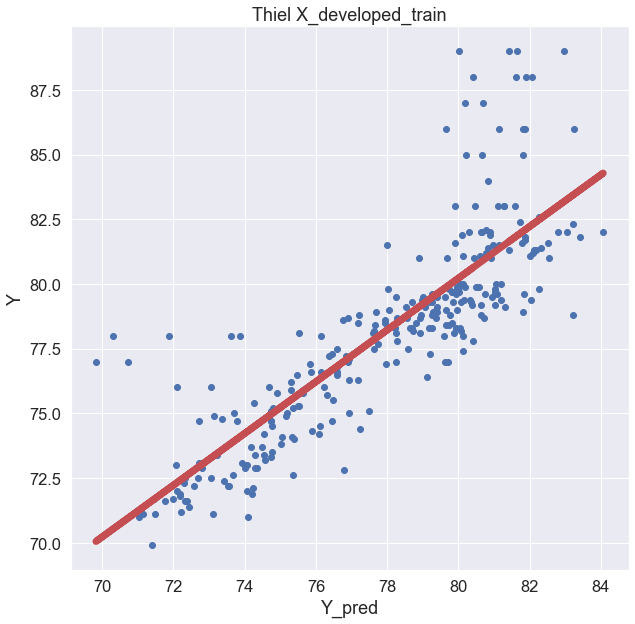

Thiel X_developed_test
X_developed_test (105, 16)
R^2 Score:0.6159
RMSE: 2.439
Minimum LE: 73.3
Maximum LE: 88.4
Average Predicted LE: 80.6
LE Standard Deviation: 3.163
LE Variance: 10.006


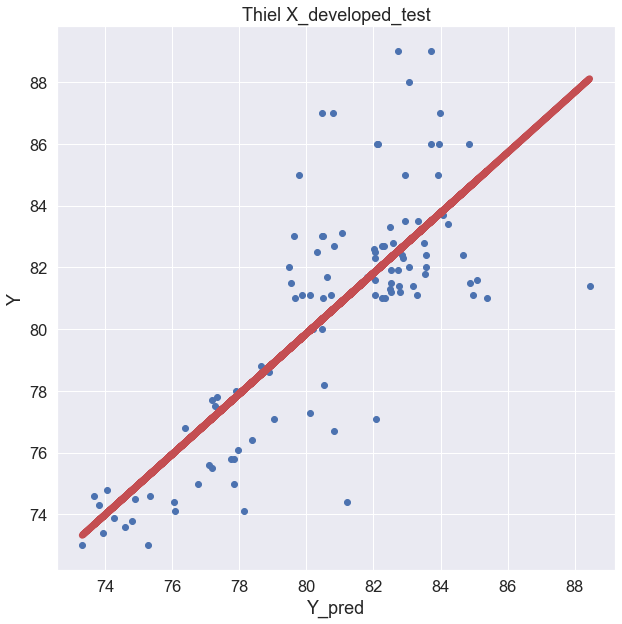

Thiel X_developing_train
X_developing_train (1129, 16)
R^2 Score:0.8434
RMSE: 3.272
Minimum LE: 41.3
Maximum LE: 82.7
Average Predicted LE: 68.5
LE Standard Deviation: 7.744
LE Variance: 59.969


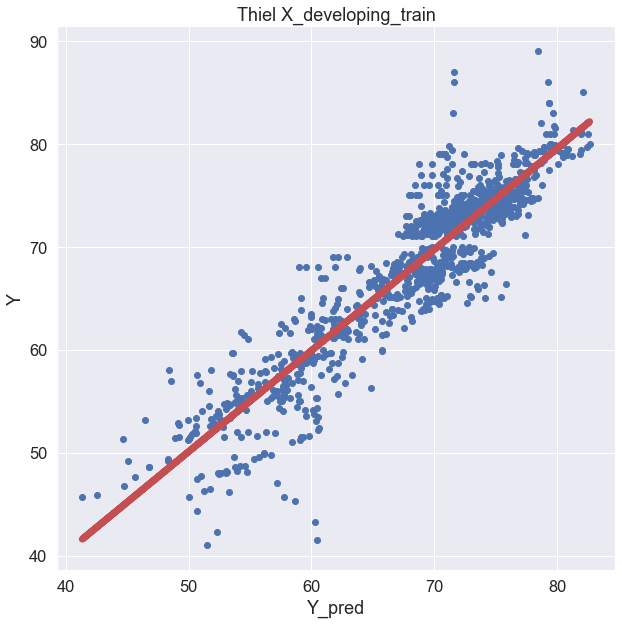

Thiel X_developing_test
X_developing_test (501, 16)
R^2 Score:0.8185
RMSE: 3.192
Minimum LE: 48.1
Maximum LE: 85.1
Average Predicted LE: 70.0
LE Standard Deviation: 7.120
LE Variance: 50.702


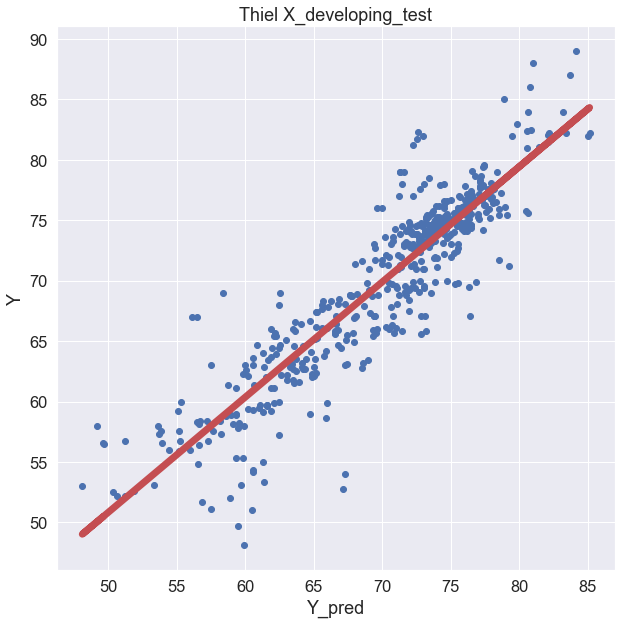

Thiel X_world1_train
X_world1_train (226, 16)
R^2 Score:-9.4894
RMSE: 8.286
Minimum LE: -20.1
Maximum LE: 84.3
Average Predicted LE: 79.5
LE Standard Deviation: 8.252
LE Variance: 68.092


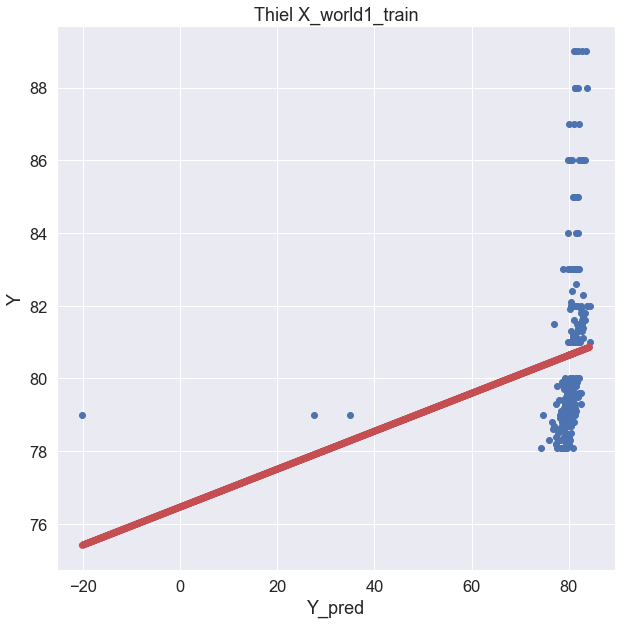

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Thiel X_world1_test
X_world1_test (110, 16)
R^2 Score:0.1590
RMSE: 2.265
Minimum LE: 74.8
Maximum LE: 88.0
Average Predicted LE: 82.5
LE Standard Deviation: 1.660
LE Variance: 2.757


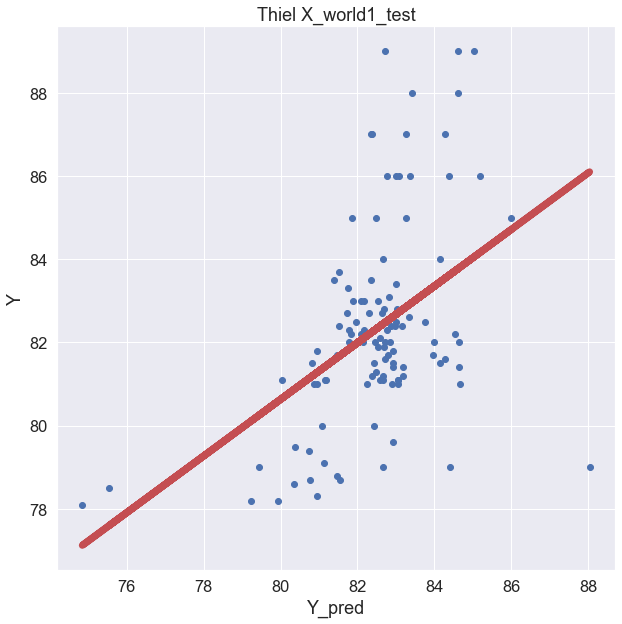

Thiel X_world2_train
X_world2_train (966, 16)
R^2 Score:0.6533
RMSE: 2.549
Minimum LE: 59.7
Maximum LE: 80.2
Average Predicted LE: 71.3
LE Standard Deviation: 3.794
LE Variance: 14.394


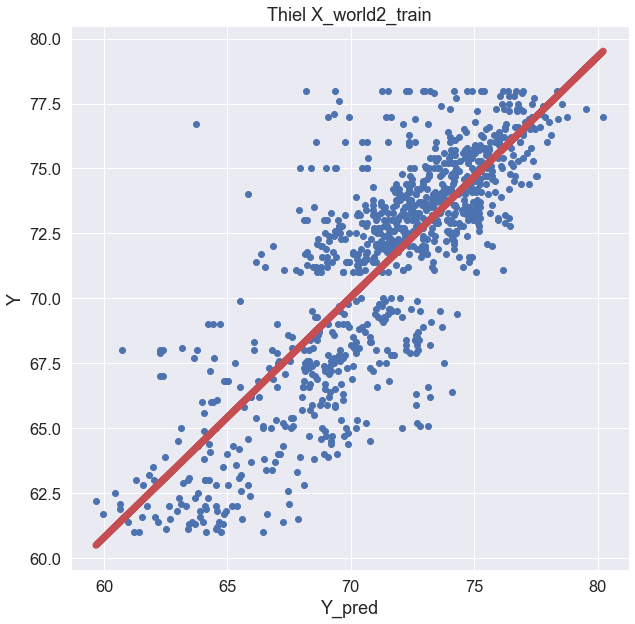

Thiel X_world2_test
X_world2_test (427, 16)
R^2 Score:0.7284
RMSE: 2.481
Minimum LE: 51.8
Maximum LE: 78.5
Average Predicted LE: 71.6
LE Standard Deviation: 4.636
LE Variance: 21.495


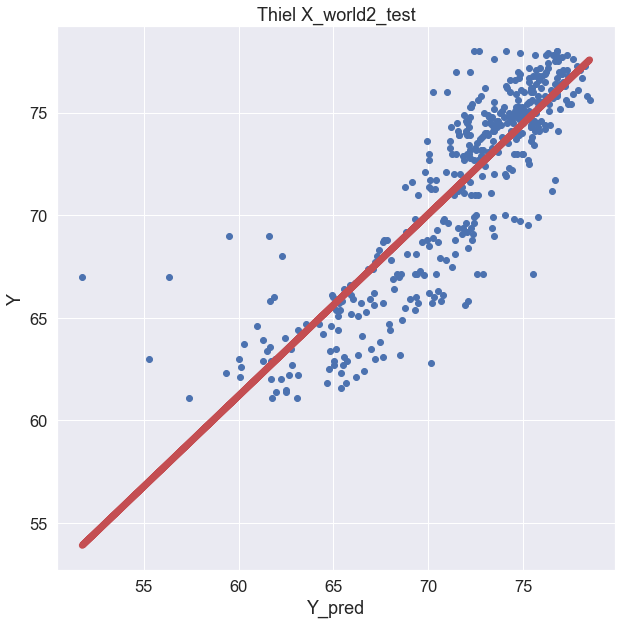

Thiel X_world3_train
X_world3_train (215, 16)
R^2 Score:0.3860
RMSE: 3.320
Minimum LE: 45.3
Maximum LE: 61.5
Average Predicted LE: 54.9
LE Standard Deviation: 2.872
LE Variance: 8.249


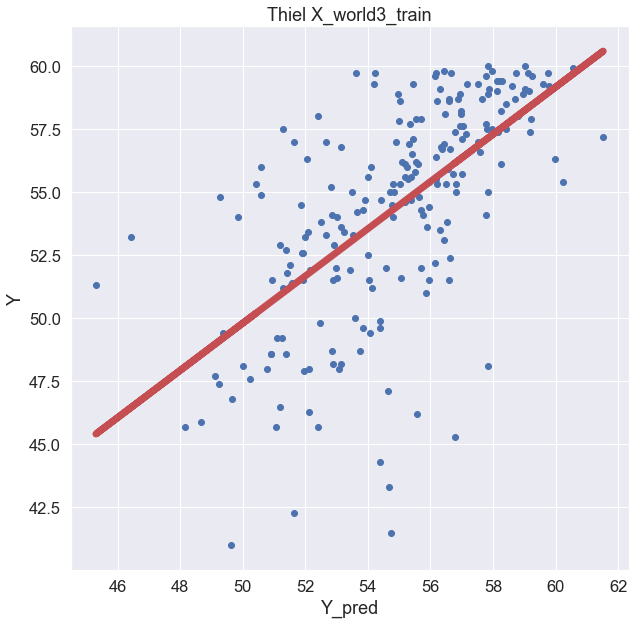

Thiel X_world3_test
X_world3_test (69, 16)
R^2 Score:0.3971
RMSE: 2.245
Minimum LE: 52.3
Maximum LE: 60.9
Average Predicted LE: 57.0
LE Standard Deviation: 2.208
LE Variance: 4.873


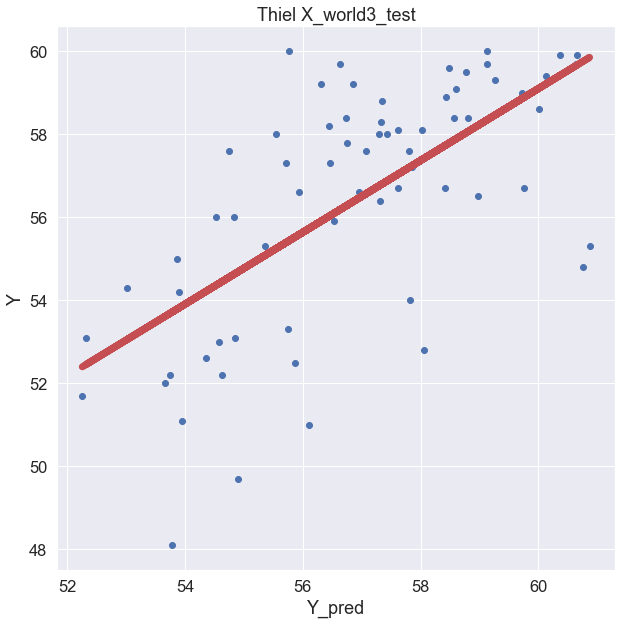

Thiel X_train
X_train (1407, 16)
R^2 Score:0.8620
RMSE: 3.180
Minimum LE: 41.5
Maximum LE: 83.6
Average Predicted LE: 70.3
LE Standard Deviation: 7.915
LE Variance: 62.651


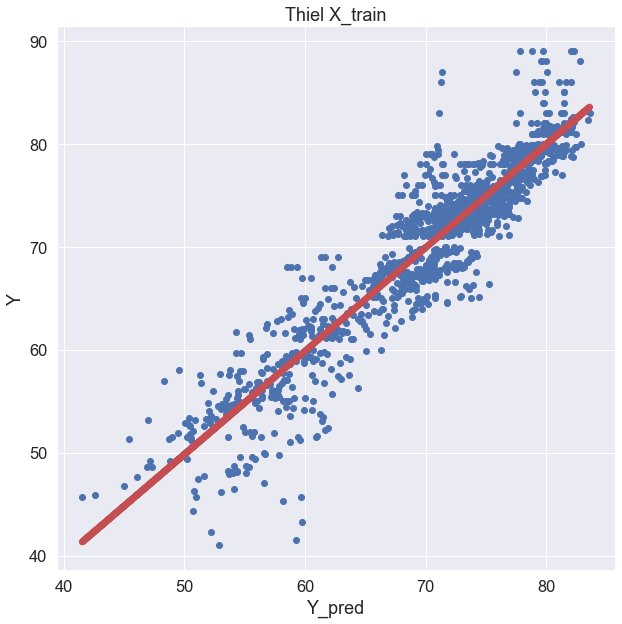

Thiel X_test
X_test (606, 16)
R^2 Score:0.8350
RMSE: 3.272
Minimum LE: 47.3
Maximum LE: 87.5
Average Predicted LE: 71.9
LE Standard Deviation: 7.798
LE Variance: 60.806


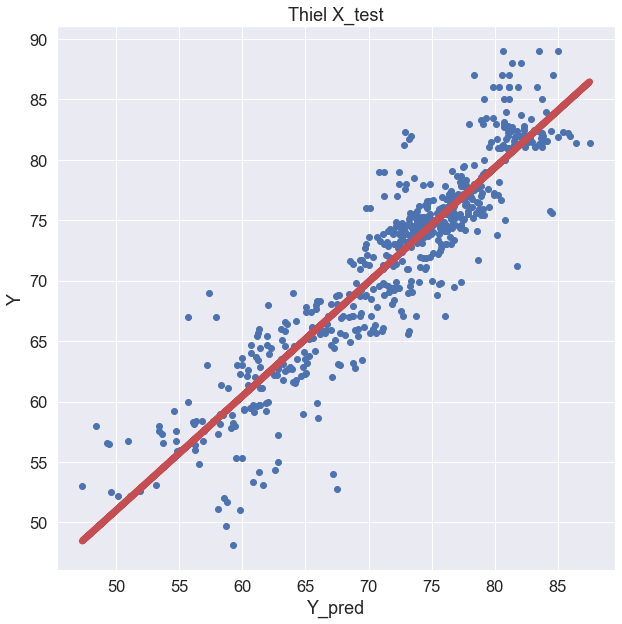

Thiel X
X (2157, 16)
R^2 Score:0.8572
RMSE: 3.191
Minimum LE: 41.5
Maximum LE: 84.5
Average Predicted LE: 70.9
LE Standard Deviation: 7.791
LE Variance: 60.694


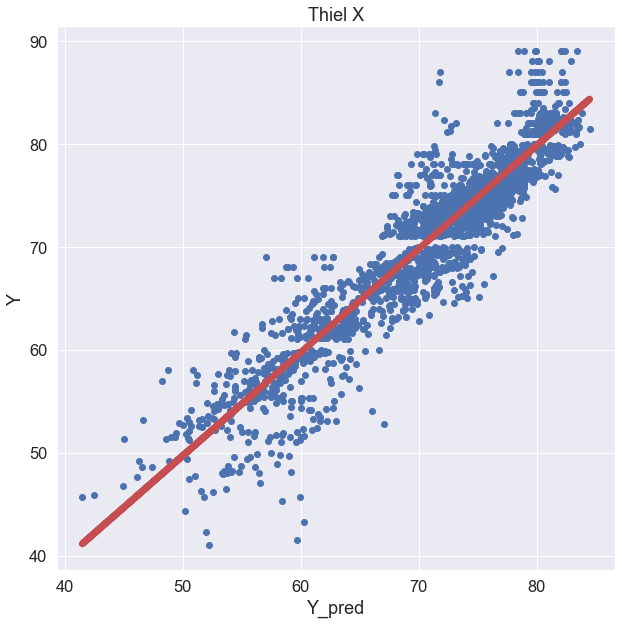

In [107]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','world','Status','Infant_Deaths','Thinness_10_19'],axis=1)
    x=scale(x)
    if i==0:
        print('Thiel {}'.format(z))
        print(z,x.shape)
        #Model
        theil = TheilSenRegressor(random_state=52).fit(x,y)
        
        #R2 
        R=theil.score(x,y)
        print('R^2 Score:{:0.4f}'.format(R))

        #Predictions
        Y_pred=theil.predict(x)
        RMSE=mean_squared_error(y, Y_pred)**0.5
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
        #plot
        z1=np.polyfit(Y_pred,y,1)
        z1poly = np.poly1d(z1) 
        plt.scatter(Y_pred,y,alpha=1)
        plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
        plt.title('Thiel {}'.format(z))
        plt.xlabel('Y_pred')
        plt.ylabel('Y')
        rcParams['figure.figsize'] = 10, 10
        plt.show()
        
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)

    else:
        print('Thiel {}'.format(z))
        print(z,x.shape)
        #Model
        theil = TheilSenRegressor(random_state=52).fit(x,y)
        
        #R2 
        R=theil.score(x,y)
        print('R^2 Score:{:0.4f}'.format(R))

        #Predictions
        Y_pred=theil.predict(x)
        RMSE=mean_squared_error(y, Y_pred)**0.5
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
        #plot
        z1=np.polyfit(Y_pred,y,1)
        z1poly = np.poly1d(z1) 
        plt.scatter(Y_pred,y,alpha=1)
        plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
        plt.title('Thiel {}'.format(z))
        plt.xlabel('Y_pred')
        plt.ylabel('Y')
        rcParams['figure.figsize'] = 10, 10
        plt.show()
        
        #Add to results
        results.loc[i] = ['Thiel',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

### REDGE REGRESSION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Ridge X_developed_train
X_developed_train (278, 18)
R^2 Score: 0.7044
RMSE: 2.127
Minimum LE: 70.2
Maximum LE: 83.9
Average Predicted LE: 78.1
LE Standard Deviation: 3.227
LE Variance: 10.416


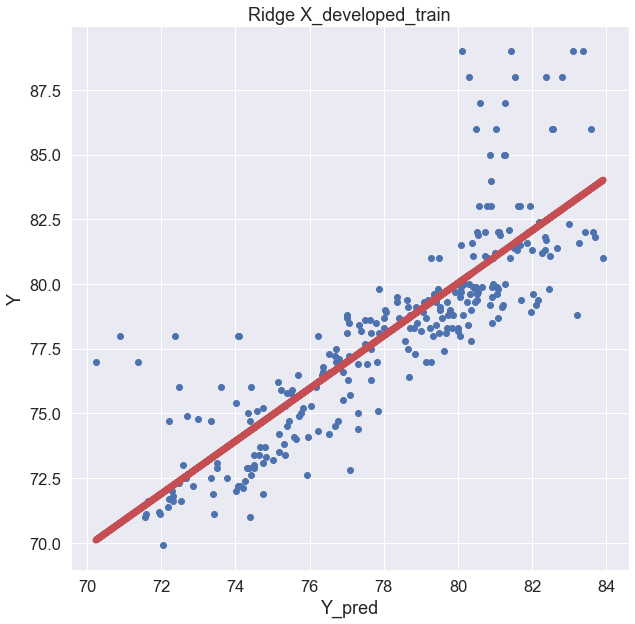

Ridge X_developed_test
X_developed_test (105, 18)
R^2 Score: 0.6775
RMSE: 2.235
Minimum LE: 73.0
Maximum LE: 85.0
Average Predicted LE: 80.4
LE Standard Deviation: 3.091
LE Variance: 9.554


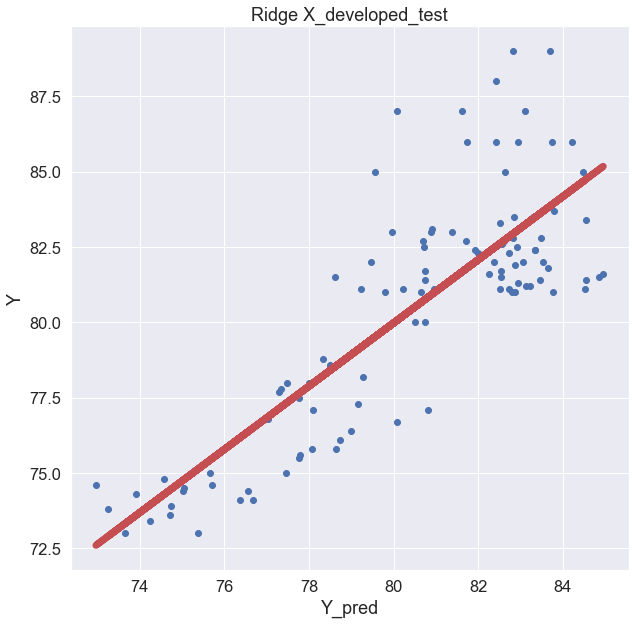

Ridge X_developing_train
X_developing_train (1129, 18)
R^2 Score: 0.8561
RMSE: 3.137
Minimum LE: 42.8
Maximum LE: 80.9
Average Predicted LE: 68.2
LE Standard Deviation: 7.606
LE Variance: 57.849


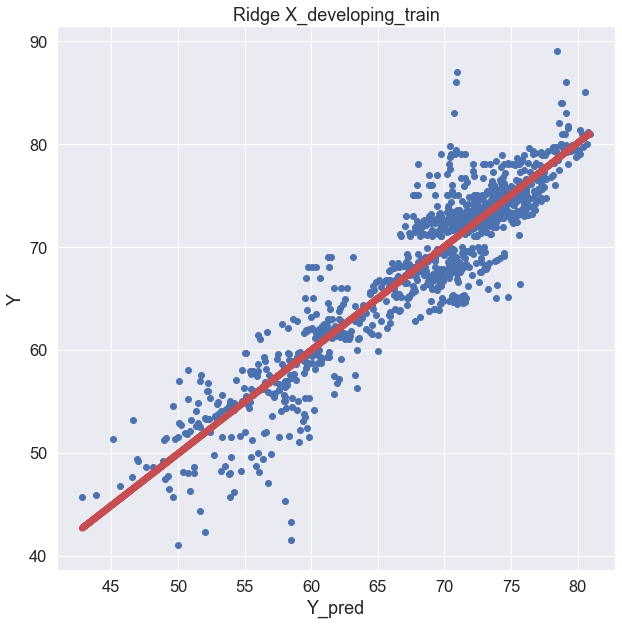

Ridge X_developing_test
X_developing_test (501, 18)
R^2 Score: 0.8314
RMSE: 3.077
Minimum LE: 49.9
Maximum LE: 85.1
Average Predicted LE: 69.9
LE Standard Deviation: 6.766
LE Variance: 45.778


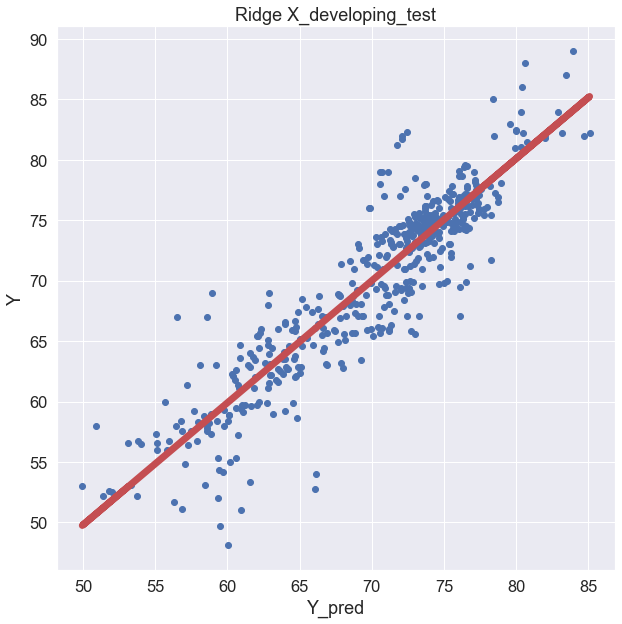

Ridge X_world1_train
X_world1_train (226, 18)
R^2 Score: 0.2909
RMSE: 2.155
Minimum LE: 77.0
Maximum LE: 84.5
Average Predicted LE: 80.6
LE Standard Deviation: 1.302
LE Variance: 1.696


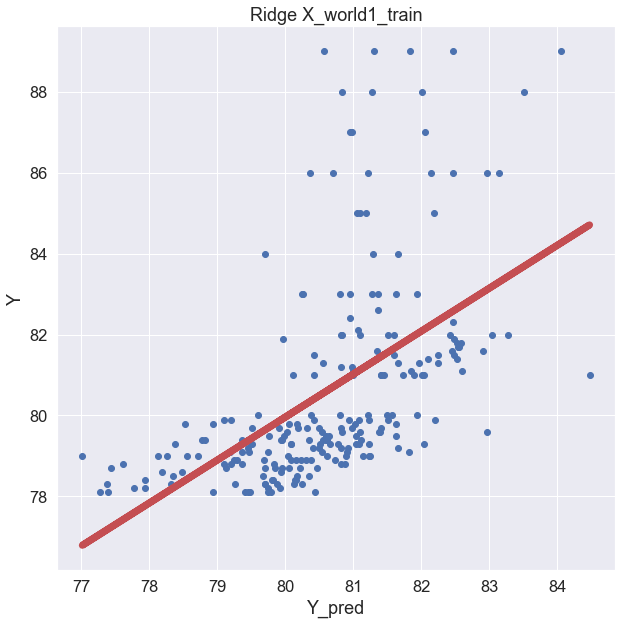

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Ridge X_world1_test
X_world1_test (110, 18)
R^2 Score: 0.3554
RMSE: 1.983
Minimum LE: 76.1
Maximum LE: 85.9
Average Predicted LE: 82.3
LE Standard Deviation: 1.360
LE Variance: 1.849


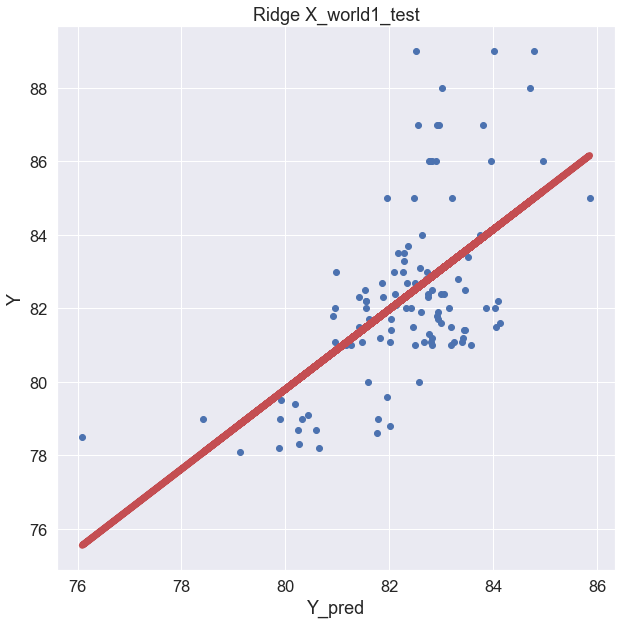

Ridge X_world2_train
X_world2_train (966, 18)
R^2 Score: 0.6872
RMSE: 2.422
Minimum LE: 60.2
Maximum LE: 79.4
Average Predicted LE: 71.3
LE Standard Deviation: 3.554
LE Variance: 12.628


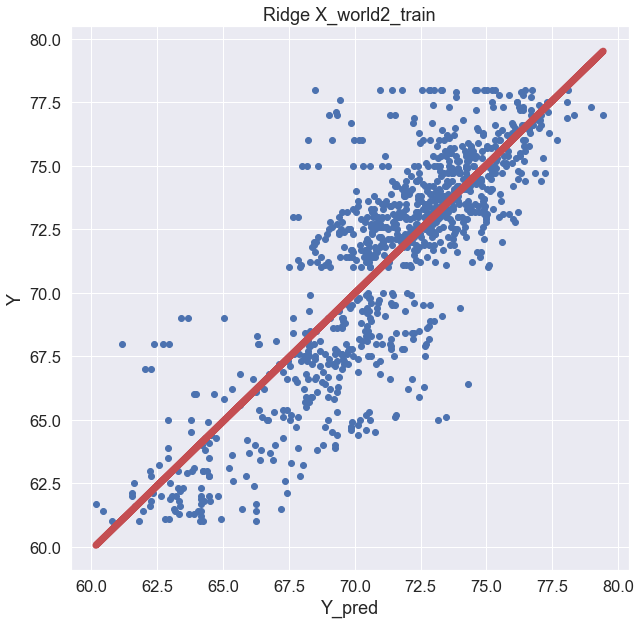

Ridge X_world2_test
X_world2_test (427, 18)
R^2 Score: 0.7702
RMSE: 2.282
Minimum LE: 58.5
Maximum LE: 78.2
Average Predicted LE: 71.5
LE Standard Deviation: 4.122
LE Variance: 16.989


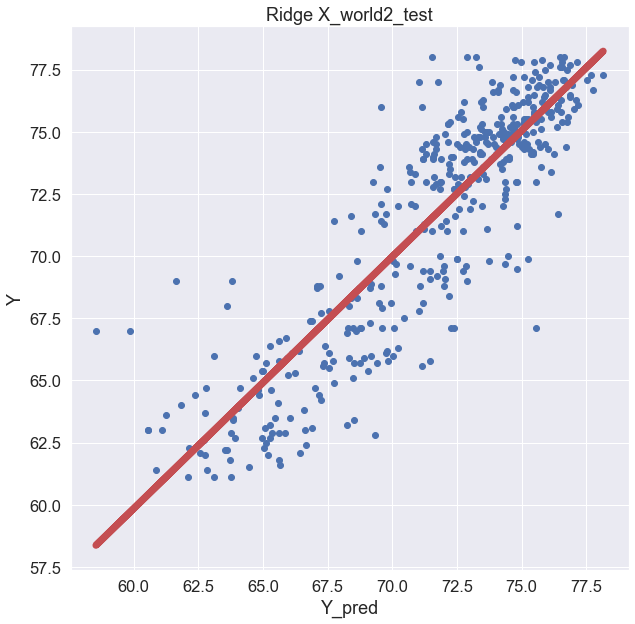

Ridge X_world3_train
X_world3_train (215, 18)
R^2 Score: 0.4225
RMSE: 3.219
Minimum LE: 46.3
Maximum LE: 60.0
Average Predicted LE: 54.3
LE Standard Deviation: 2.632
LE Variance: 6.929


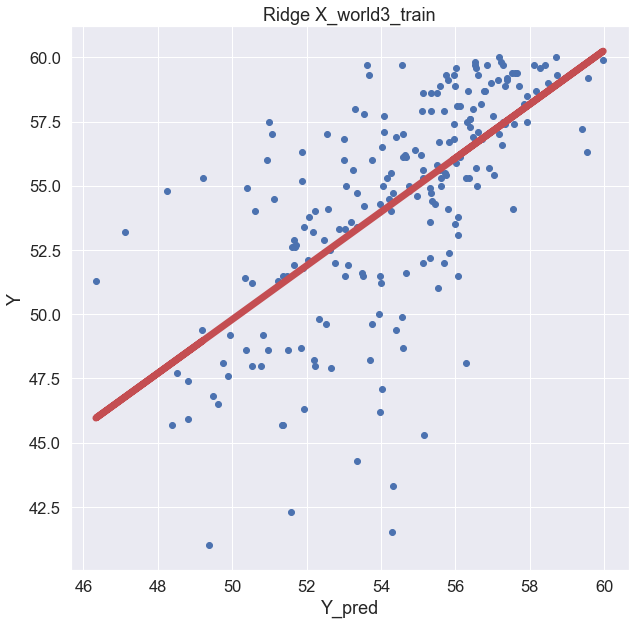

Ridge X_world3_test
X_world3_test (69, 18)
R^2 Score: 0.4879
RMSE: 2.069
Minimum LE: 52.6
Maximum LE: 59.9
Average Predicted LE: 56.5
LE Standard Deviation: 1.686
LE Variance: 2.842


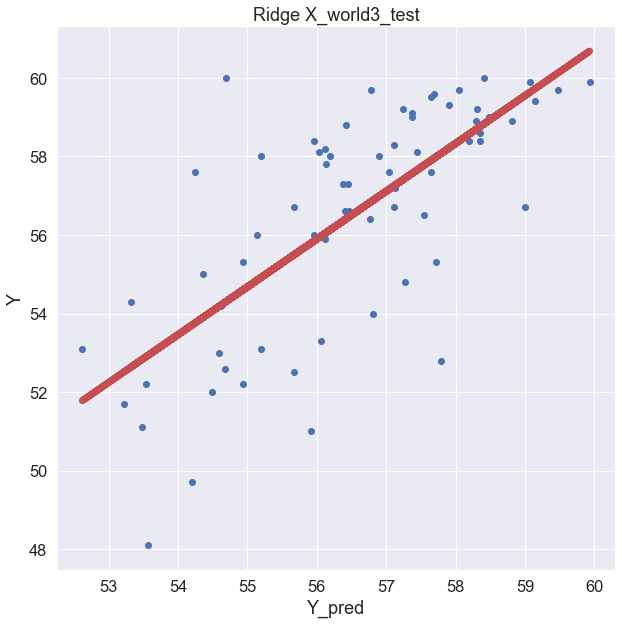

Ridge X_train
X_train (1407, 18)
R^2 Score: 0.8731
RMSE: 3.049
Minimum LE: 42.7
Maximum LE: 83.4
Average Predicted LE: 70.2
LE Standard Deviation: 7.963
LE Variance: 63.404


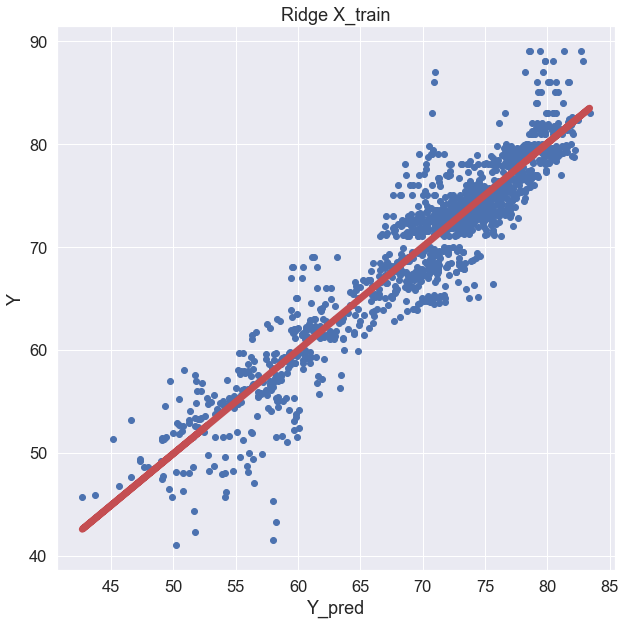

Ridge X_test
X_test (606, 18)
R^2 Score: 0.8549
RMSE: 3.068
Minimum LE: 49.4
Maximum LE: 84.5
Average Predicted LE: 71.7
LE Standard Deviation: 7.391
LE Variance: 54.621


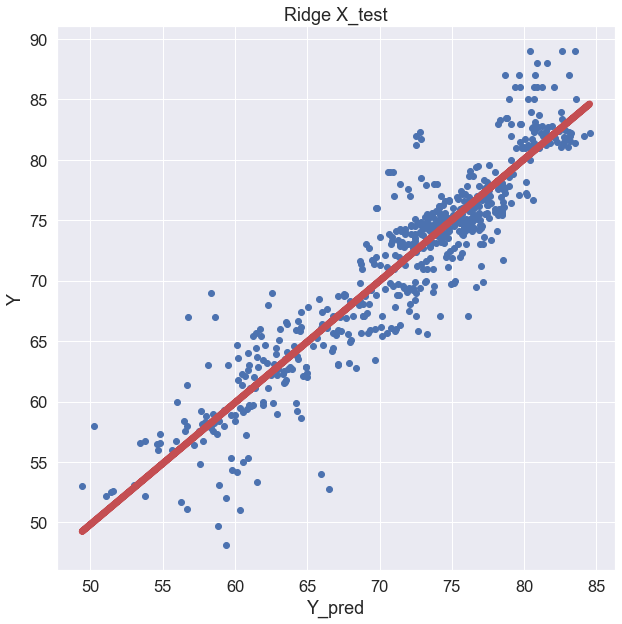

Ridge X
X (2157, 18)
R^2 Score: 0.8685
RMSE: 3.062
Minimum LE: 42.3
Maximum LE: 83.5
Average Predicted LE: 70.7
LE Standard Deviation: 7.846
LE Variance: 61.553


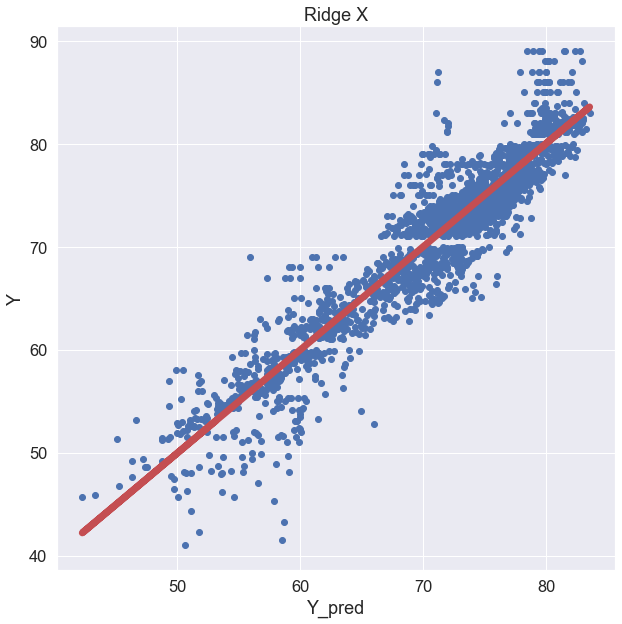

In [108]:
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','world','Status'],axis=1)
    x=scale(x)
    print('Ridge {}'.format(z))
    print(z,x.shape)
    #Model
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=True,solver='auto',random_state=65)
    ridge= ridgeregr.fit(x,y)

    #R2 
    R=ridge.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=ridge.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
    
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Ridge {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
        
    #Add to results
    results.loc[i+13] = ['Ridge',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]        

### GRADIENT BOOSTING REGRESSION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Random Forest X_developed_train
X_developed_train (278, 18)
R^2 Score: 0.9759
RMSE: 0.608
Minimum LE: 70.8
Maximum LE: 88.1
Average Predicted LE: 78.1
LE Standard Deviation: 3.703
LE Variance: 13.713


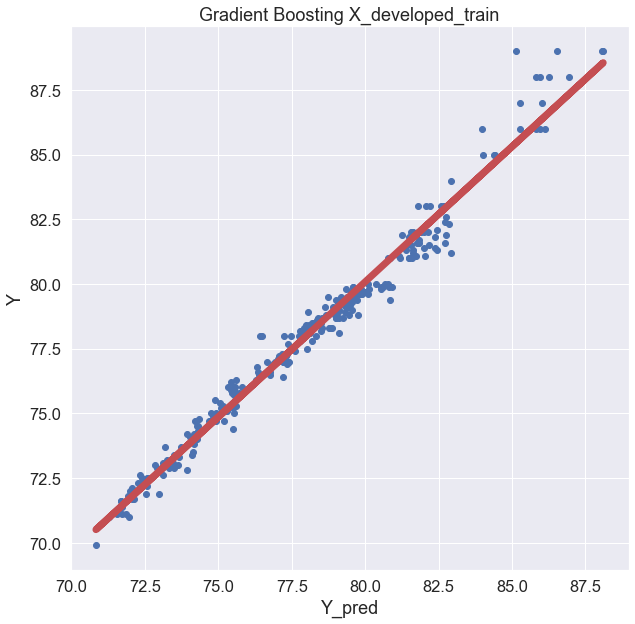

Top 5 Features
 IncomeComposition    37.43
AdultMortality       24.64
Thinness59           13.62
Thinness1019          5.13
Alcohol               4.84
Name: X_developed_train, dtype: float64 

Random Forest X_developed_test
X_developed_test (105, 18)
R^2 Score: 0.9968
RMSE: 0.223
Minimum LE: 73.1
Maximum LE: 88.6
Average Predicted LE: 80.4
LE Standard Deviation: 3.859
LE Variance: 14.895


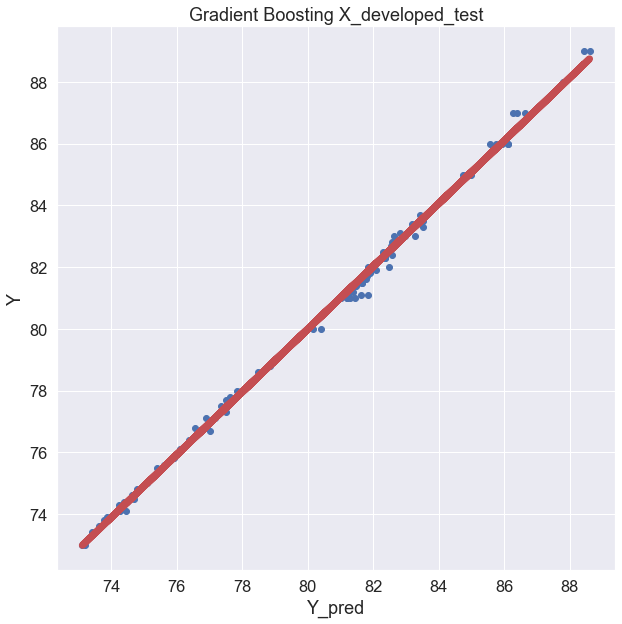

Top 5 Features
 AdultMortality       78.28
IncomeComposition     7.45
TotalExpenditure      4.41
BMI                   2.61
Alcohol               2.26
Name: X_developed_test, dtype: float64 

Random Forest X_developing_train
X_developing_train (1129, 18)
R^2 Score: 0.9732
RMSE: 1.354
Minimum LE: 42.4
Maximum LE: 85.1
Average Predicted LE: 68.2
LE Standard Deviation: 8.028
LE Variance: 64.453


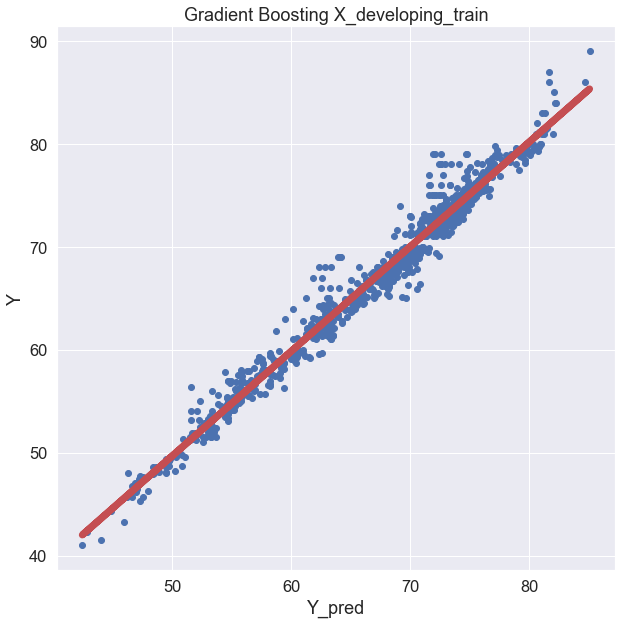

Top 5 Features
 IncomeComposition    44.39
HIVAIDS              23.82
AdultMortality       17.23
Polio                 3.90
BMI                   2.85
Name: X_developing_train, dtype: float64 

Random Forest X_developing_test
X_developing_test (501, 18)
R^2 Score: 0.9812
RMSE: 1.027
Minimum LE: 49.0
Maximum LE: 86.2
Average Predicted LE: 69.9
LE Standard Deviation: 7.282
LE Variance: 53.025


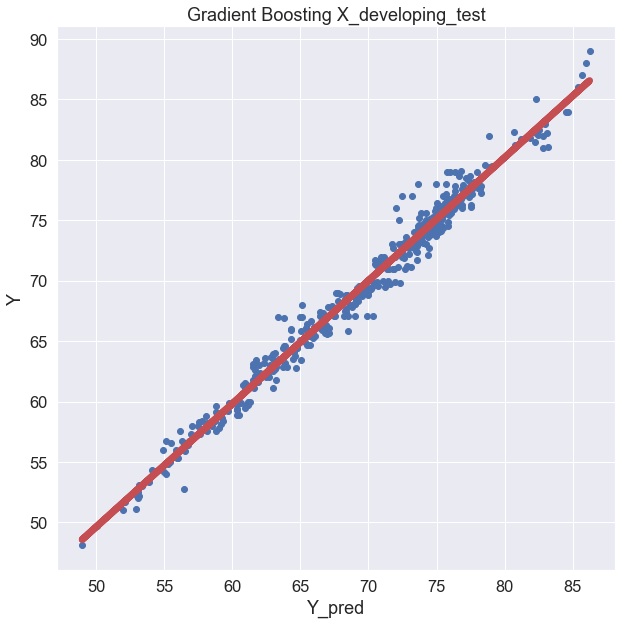

Top 5 Features
 HIVAIDS              46.33
IncomeComposition    23.02
AdultMortality       11.31
Schooling             7.39
TotalExpenditure      1.86
Name: X_developing_test, dtype: float64 

Random Forest X_world1_train
X_world1_train (226, 18)
R^2 Score: 0.9533
RMSE: 0.553
Minimum LE: 78.1
Maximum LE: 88.5
Average Predicted LE: 80.6
LE Standard Deviation: 2.255
LE Variance: 5.083


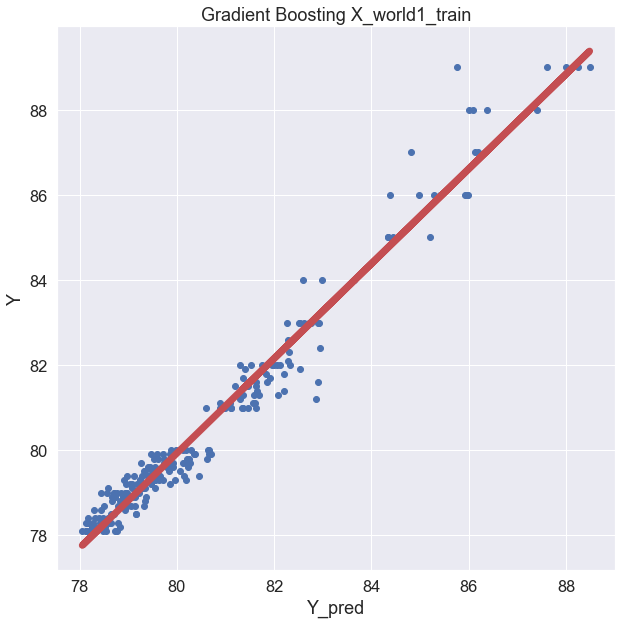

Top 5 Features
 AdultMortality       25.59
IncomeComposition    16.30
Year                 13.34
country_code          6.50
BMI                   4.75
Name: X_world1_train, dtype: float64 

Random Forest X_world1_test
X_world1_test (110, 18)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


R^2 Score: 0.9834
RMSE: 0.318
Minimum LE: 78.2
Maximum LE: 88.7
Average Predicted LE: 82.3
LE Standard Deviation: 2.301
LE Variance: 5.293


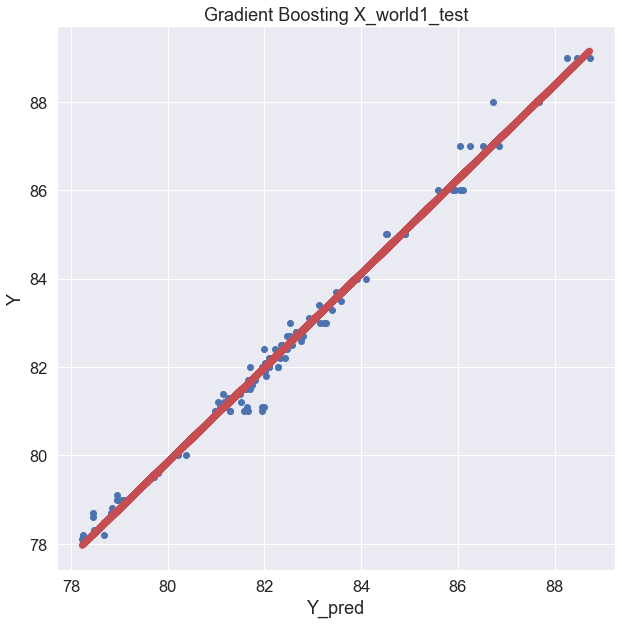

Top 5 Features
 AdultMortality    25.33
Thinness59        18.14
Thinness1019       9.39
Schooling          8.23
Alcohol            7.32
Name: X_world1_test, dtype: float64 

Random Forest X_world2_train
X_world2_train (966, 18)
R^2 Score: 0.9352
RMSE: 1.102
Minimum LE: 61.1
Maximum LE: 77.5
Average Predicted LE: 71.3
LE Standard Deviation: 3.989
LE Variance: 15.910


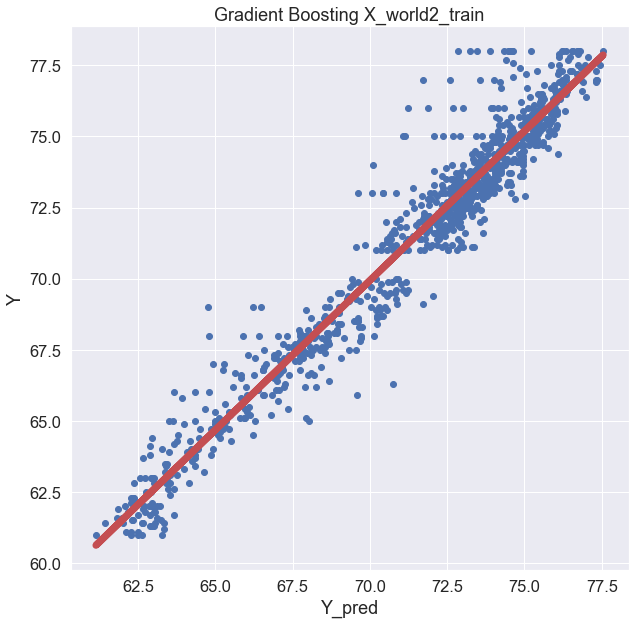

Top 5 Features
 AdultMortality       53.39
IncomeComposition    29.07
BMI                   3.72
Alcohol               2.49
Thinness59            2.28
Name: X_world2_train, dtype: float64 

Random Forest X_world2_test
X_world2_test (427, 18)
R^2 Score: 0.9734
RMSE: 0.776
Minimum LE: 61.9
Maximum LE: 77.8
Average Predicted LE: 71.5
LE Standard Deviation: 4.553
LE Variance: 20.733


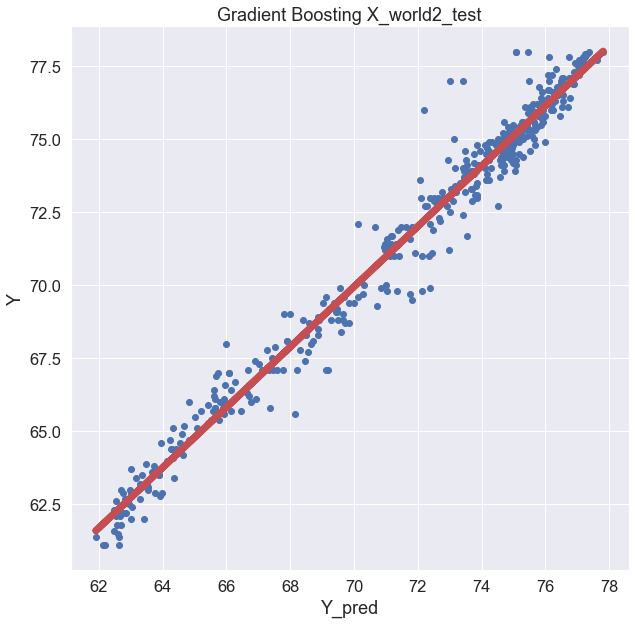

Top 5 Features
 IncomeComposition    44.22
AdultMortality       24.14
Schooling            16.34
HIVAIDS               3.85
Thinness59            3.03
Name: X_world2_test, dtype: float64 

Random Forest X_world3_train
X_world3_train (215, 18)
R^2 Score: 0.9894
RMSE: 0.435
Minimum LE: 41.3
Maximum LE: 59.9
Average Predicted LE: 54.3
LE Standard Deviation: 4.082
LE Variance: 16.659


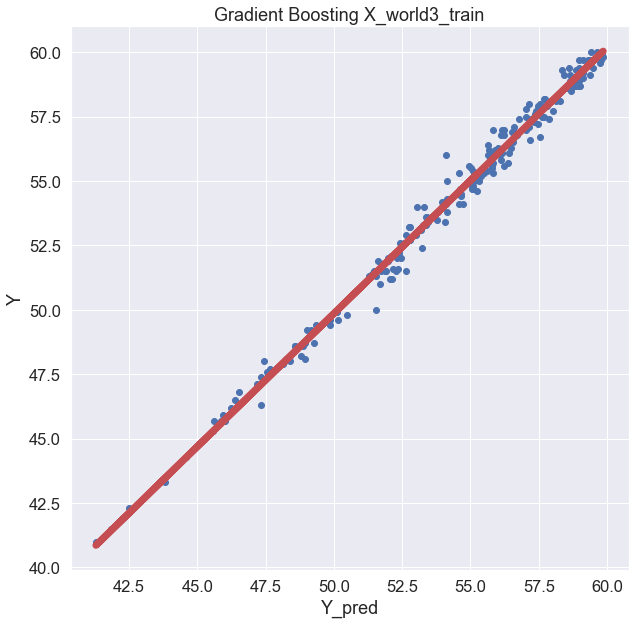

Top 5 Features
 AdultMortality       31.68
IncomeComposition    14.36
country_code         12.69
HIVAIDS               7.76
Diphtheria            6.37
Name: X_world3_train, dtype: float64 

Random Forest X_world3_test
X_world3_test (69, 18)
R^2 Score: 0.9991
RMSE: 0.088
Minimum LE: 48.2
Maximum LE: 60.0
Average Predicted LE: 56.5
LE Standard Deviation: 2.857
LE Variance: 8.162


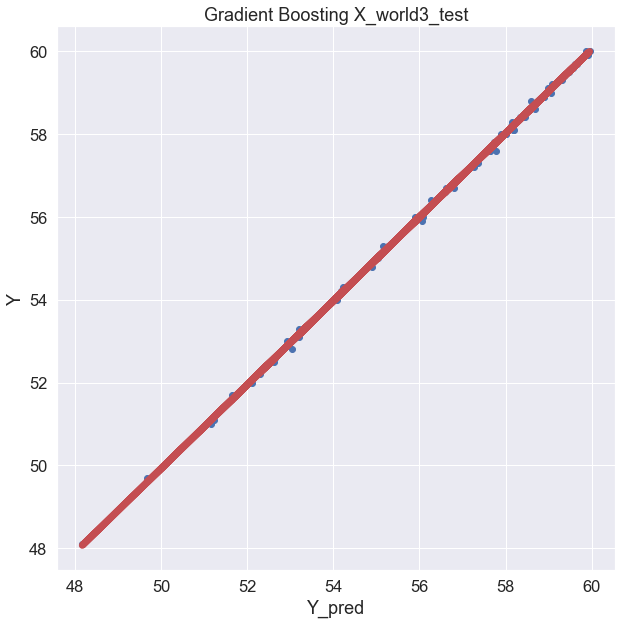

Top 5 Features
 AdultMortality      34.43
HIVAIDS             17.50
TotalExpenditure     9.06
Thinness59           7.98
Measles              6.44
Name: X_world3_test, dtype: float64 

Random Forest X_train
X_train (1407, 18)
R^2 Score: 0.9679
RMSE: 1.533
Minimum LE: 42.9
Maximum LE: 86.1
Average Predicted LE: 70.2
LE Standard Deviation: 8.287
LE Variance: 68.668


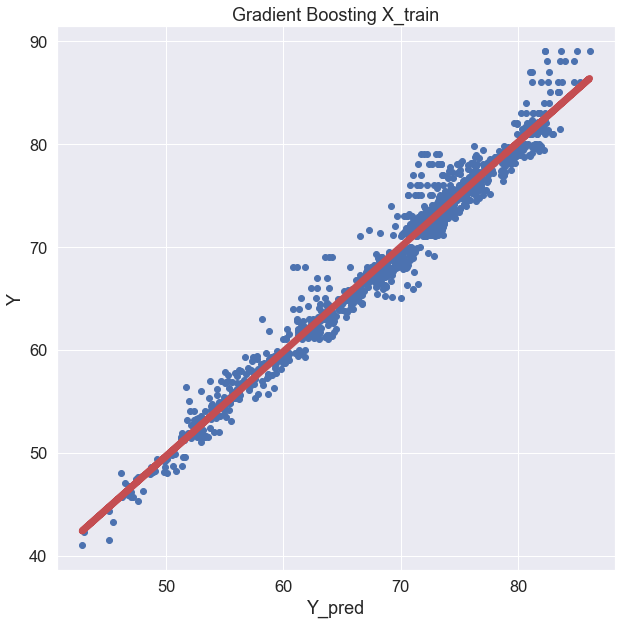

Top 5 Features
 IncomeComposition    58.03
HIVAIDS              18.01
AdultMortality       12.68
Thinness59            2.43
Polio                 2.34
Name: X_train, dtype: float64 

Random Forest X_test
X_test (606, 18)
R^2 Score: 0.9775
RMSE: 1.207
Minimum LE: 48.8
Maximum LE: 86.2
Average Predicted LE: 71.7
LE Standard Deviation: 7.819
LE Variance: 61.143


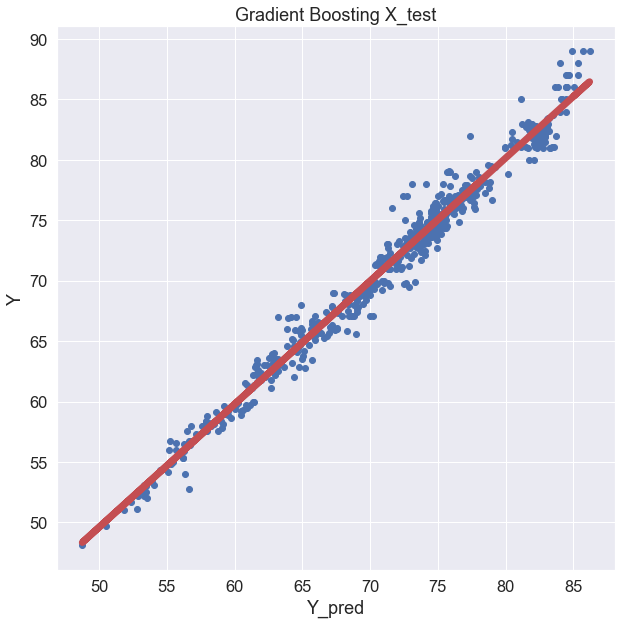

Top 5 Features
 IncomeComposition    35.71
HIVAIDS              31.99
Schooling            13.71
AdultMortality        9.00
Thinness59            2.66
Name: X_test, dtype: float64 

Random Forest X
X (2157, 18)
R^2 Score: 0.9601
RMSE: 1.688
Minimum LE: 42.0
Maximum LE: 85.0
Average Predicted LE: 70.7
LE Standard Deviation: 8.147
LE Variance: 66.366


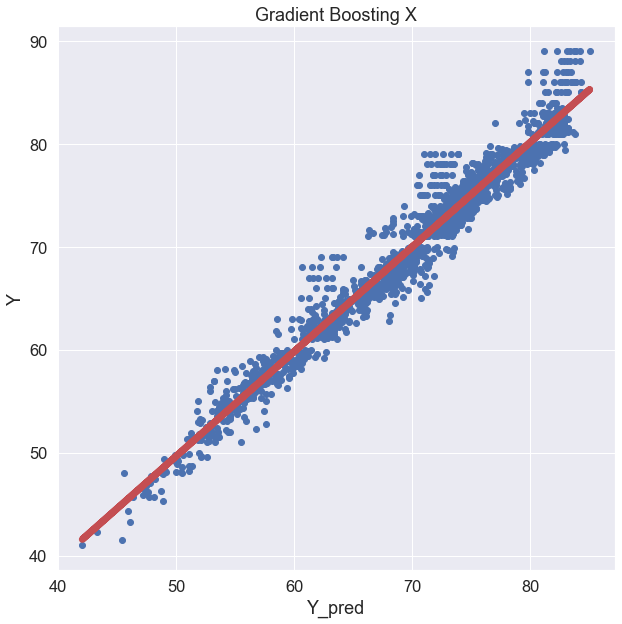

Top 5 Features
 IncomeComposition    60.62
HIVAIDS              18.18
AdultMortality       11.46
Thinness59            2.35
U5Deaths              1.85
Name: X, dtype: float64 



In [109]:
cols=['Year','AdultMortality', 'Infant Deaths','Alcohol', 'PercentExpenditure', 'Hep B', 'Measles', 'BMI', 'U5Deaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'Thinness1019',
       'Thinness59', 'IncomeComposition', 'Schooling','country_code']
feature_importances=pd.DataFrame(index=cols)
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x
    y
    x=x.drop(['Country','world','Status'],axis=1)
    x=scale(x)
    print('Random Forest {}'.format(z))
    print(z,x.shape)
    #Model
    params = {'n_estimators':100,'max_depth': 3}
    rf = ensemble.GradientBoostingRegressor(**params)
    rfc= rf.fit(x,y)

    #R2 
    R=rfc.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=rf.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Gradient Boosting {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    
    #Feature Importance
    feature_importances[z]=(rfc.feature_importances_*100).round(2)
    print('Top 5 Features\n',feature_importances[z].nlargest(5).round(2),'\n')
        
    #Add to results
    results.loc[i+26] = ['Gradient Boosting',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)] 
    

In [110]:
feature_importances

X_developed_train  X_developed_test  X_developing_train  \
Year                             1.40              0.32                0.07   
AdultMortality                  24.64             78.28               17.23   
Infant Deaths                    0.10              0.01                0.35   
Alcohol                          4.84              2.26                0.97   
PercentExpenditure               1.67              0.55                0.13   
Hep B                            0.89              0.11                0.07   
Measles                          0.57              0.82                0.10   
BMI                              1.40              2.61                2.85   
U5Deaths                         0.15              0.03                1.97   
Polio                            0.24              0.06                3.90   
TotalExpenditure                 3.85              4.41                0.36   
Diphtheria                       0.43              0.28                0.65   
HIVAIDS                          0.00              0.00               23.82   
Thinness1019                     5.13              1.48                0.11   
Thinness59                      13.62              0.22                1.53   
IncomeComposition               37.43              7.45               44.39   
Schooling                        2.39              0.78                0.43   
country_code                     1.25              0.33                1.06   

                    X_developing_test  X_world1_train  X_world1_test  \
Year                             0.04           13.34           2.67   
AdultMortality                  11.31           25.59          25.33   
Infant Deaths                    0.34            0.57           0.18   
Alcohol                          1.69            3.75           7.32   
PercentExpenditure               0.17            4.36           3.12   
Hep B                            0.21            2.73           0.37   
Measles                          0.33            4.31           5.21   
BMI                              0.50            4.75           5.93   
U5Deaths                         1.28            0.88           0.70   
Polio                            1.14            3.35           0.14   
TotalExpenditure                 1.86            4.04           5.85   
Diphtheria                       0.70            1.85           0.31   
HIVAIDS                         46.33            0.00           0.00   
Thinness1019                     1.32            3.65           9.39   
Thinness59                       1.42            0.12          18.14   
IncomeComposition               23.02           16.30           5.66   
Schooling                        7.39            3.91           8.23   
country_code                     0.95            6.50           1.45   

                    X_world2_train  X_world2_test  X_world3_train  \
Year                          0.14           0.10            1.19   
AdultMortality               53.39          24.14           31.68   
Infant Deaths                 0.16           0.30            3.63   
Alcohol                       2.49           0.71            2.30   
PercentExpenditure            1.34           0.41            0.71   
Hep B                         0.19           0.15            1.60   
Measles                       0.40           0.16            0.46   
BMI                           3.72           0.34            6.25   
U5Deaths                      0.48           0.28            5.04   
Polio                         1.12           1.31            2.58   
TotalExpenditure              0.58           1.57            1.07   
Diphtheria                    0.62           0.23            6.37   
HIVAIDS                       1.88           3.85            7.76   
Thinness1019                  0.68           1.66            0.23   
Thinness59                    2.28           3.03            0.98   
IncomeComposition            29.07          4

In [111]:
results

Method                 Set         Status  Datapoint Count  \
0               Thiel   X_developed_train      Developed             4448   
1               Thiel    X_developed_test      Developed             1680   
2               Thiel  X_developing_train     Developing            18064   
3               Thiel   X_developing_test     Developing             8016   
4               Thiel      X_world1_train      1st World             3616   
5               Thiel       X_world1_test      1st World             1760   
6               Thiel      X_world2_train      2nd World            15456   
7               Thiel       X_world2_test      2nd World             6832   
8               Thiel      X_world3_train      3rd World             3440   
9               Thiel       X_world3_test      3rd World             1104   
10              Thiel             X_train  Full Training            22512   
11              Thiel              X_test   Full Testing             9696   
12              Thiel                   X           Full            34512   
13              Ridge   X_developed_train      Developed             5004   
14              Ridge    X_developed_test      Developed             1890   
15              Ridge  X_developing_train     Developing            20322   
16              Ridge   X_developing_test     Developing             9018   
17              Ridge      X_world1_train      1st World             4068   
18              Ridge       X_world1_test      1st World             1980   
19              Ridge      X_world2_train      2nd World            17388   
20              Ridge       X_world2_test      2nd World             7686   
21              Ridge      X_world3_train      3rd World             3870   
22              Ridge       X_world3_test      3rd World             1242   
23              Ridge             X_train  Full Training            25326   
24              Ridge              X_test   Full Testing            10908   
25              Ridge                   X           Full            38826   
26  Gradient Boosting   X_developed_train      Developed             5004   
27  Gradient Boosting    X_developed_test      Developed             1890   
28  Gradient Boosting  X_developing_train     Developing            20322   
29  Gradient Boosting   X_developing_test     Developing             9018   
30  Gradient Boosting      X_world1_train      1st World             4068   
31  Gradient Boosting       X_world1_test      1st World             1980   
32  Gradient Boosting      X_world2_train      2nd World            17388   
33  Gradient Boosting       X_world2_test      2nd World             7686   
34  Gradient Boosting      X_world3_train      3rd World             3870   
35  Gradient Boosting       X_world3_test      3rd World             1242   
36  Gradient Boosting             X_train  Full Training            25326   
37  Gradient Boosting              X_test   Full Testing            10908   
38  Gradient Boosting                   X           Full            38826   

     RMSE     R^2  LE Min  LE Max  Average LE  LE Std  LE Var  
0   2.180  0.6900    69.8    84.1        77.9   3.260  10.600  
1   2.439  0.6159    73.3    88.4        80.6   3.163  10.006  
2   3.272  0.8434    41.3    82.7        68.5   7.744  59.969  
3   3.192  0.8185    48.1    85.1        70.0   7.120  50.702  
4   8.286 -9.4894   -20.1    84.3        79.5   8.252  68.092  
5   2.265  0.1590    74.8    88.0        82.5   1.660   2.757  
6   2.549  0.6533    59.7    80.2        71.3   3.794  14.394  
7   2.481  0.7284    51.8    78.5        71.6   4.636  21.495  
8   3.320  0.3860    45.3    61.5        54.9   2.872   8.249  
9   2.245  0.3971    52.3    60.9        57.0   2.208   4.873  
10  3.180  0.8620    41.5    83.6        70.3   7.915  62.651  
11  3.272  0.8350    47.3    87.5        71.9   7.798  60.806  
12  3.191  0.8572    41.5    84.5        70.9   7.791  60.694  
13  2.127  0.7044    70.2    83.9     

In [112]:
regsum=results.groupby(['Status','Method']).mean()
regsum

Datapoint Count    RMSE      R^2  LE Min  \
Status        Method                                                        
1st World     Gradient Boosting             3024  0.4355  0.96835   78.15   
              Ridge                         3024  2.0690  0.32315   76.55   
              Thiel                         2688  5.2755 -4.66520   27.35   
2nd World     Gradient Boosting            12537  0.9390  0.95430   61.50   
              Ridge                        12537  2.3520  0.72870   59.35   
              Thiel                        11144  2.5150  0.69085   55.75   
3rd World     Gradient Boosting             2556  0.2615  0.99425   44.75   
              Ridge                         2556  2.6440  0.45520   49.45   
              Thiel                         2272  2.7825  0.39155   48.80   
Developed     Gradient Boosting             3447  0.4155  0.98635   71.95   
              Ridge                         3447  2.1810  0.69095   71.60   
              Thiel                         3064  2.3095  0.65295   71.55   
Developing    Gradient Boosting            14670  1.1905  0.97720   45.70   
              Ridge                        14670  3.1070  0.84375   46.35   
              Thiel                        13040  3.2320  0.83095   44.70   
Full          Gradient Boosting            38826  1.6880  0.96010   42.00   
              Ridge                        38826  3.0620  0.86850   42.30   
              Thiel                        34512  3.1910  0.85720   41.50   
Full Testing  Gradient Boosting            10908  1.2070  0.97750   48.80   
              Ridge                        10908  3.0680  0.85490   49.40   
              Thiel                         9696  3.2720  0.83500   47.30   
Full Training Gradient Boosting            25326  1.5330  0.96790   42.90   
              Ridge                        25326  3.0490  0.87310   42.70   
              Thiel                        22512  3.1800  0.86200   41.50   

                                 LE Max  Average LE  LE Std   LE Var  
Status        Method                                                  
1st World     Gradient Boosting   88.60       81.45  2.2780   5.1880  
              Ridge               85.20       81.45  1.3310   1.7725  
              Thiel               86.15       81.00  4.9560  35.4245  
2nd World     Gradient Boosting   77.65       71.40  4.2710  18.3215  
              Ridge               78.80       71.40  3.8380  14.8085  
              Thiel               79.35       71.45  4.2150  17.9445  
3rd World     Gradient Boosting   59.95       55.40  3.4695  12.4105  
              Ridge               59.95       55.40  2.1590   4.8855  
              Thiel               61.20       55.95  2.5400   6.5610  
Developed     Gradient Boosting   88.35       79.25  3.7810  14.3040  
              Ridge               84.45       79.25  3.1590   9.9850  
              Thiel               86.25       79.25  3.2115  10.3030  
Developing    Gradient Boosting   85.65       69.05  7.6550  58.7390  
              Ridge               83.00       69.05  7.1860  51.8135  
              Thiel               83.90       69.25  7.4320  55.3355  
Full          Gradient Boosting   85.00       70.70  8.1470  66.3660  
              Ridge               83.50       70.70  7.8460  61.5530  
              Thiel               84.50       70.90  7.7910  60.6940  
Full Testing  Gradient Boosting   86.20       71.70  7.8190  61.1430  
              Ridge               84.50       71.70  7.3910  54.6210  
              Thiel               87.50       71.90  7.7980  60.8060  
Full Training Gradient Boosting   86.10       70.20  8.2870  68.6680  
              Ridge               83.40       70.20  7.9630  63.4040  
              Thiel               83.60       70.30  7.9150  62.6510

## Clustering

### Mean-Shift Clustering

In [114]:
df_cl=df_reg.copy()
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import MeanShift, estimate_bandwidth
Y = df_cl['world']
X_unscaled = df_cl.drop(['Country','world','Status'],1)
X=scale(X_unscaled)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2,n_samples=200)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
y_pred=ms.predict(X)

# Extract cluster assignments for each data point.
labels = ms.labels_
df_cl['MS Cluster']=labels

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('Cal Harabaz Score: {}'.format(metrics.calinski_harabasz_score(X, ms.labels_)/1000))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X, labels, metric='euclidean')))                            
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y))
print('Completeness Score:',metrics.completeness_score(y_pred,Y))
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,Y))

print('Cluster Percentage')
((df_cl['MS Cluster'].value_counts()/len(df_cl['MS Cluster'])).round(3))*100

Number of estimated clusters: 3
Cal Harabaz Score: 0.08714458789889061
Silhouette Score: 0.3549164206619843
Homogenity Score: 0.15452992446834765
Completeness Score: 0.0245066739599228
Adjusted Rand Score: 0.044181274646479446
Cluster Percentage


0    97.5
1     1.9
2     0.6
Name: MS Cluster, dtype: float64

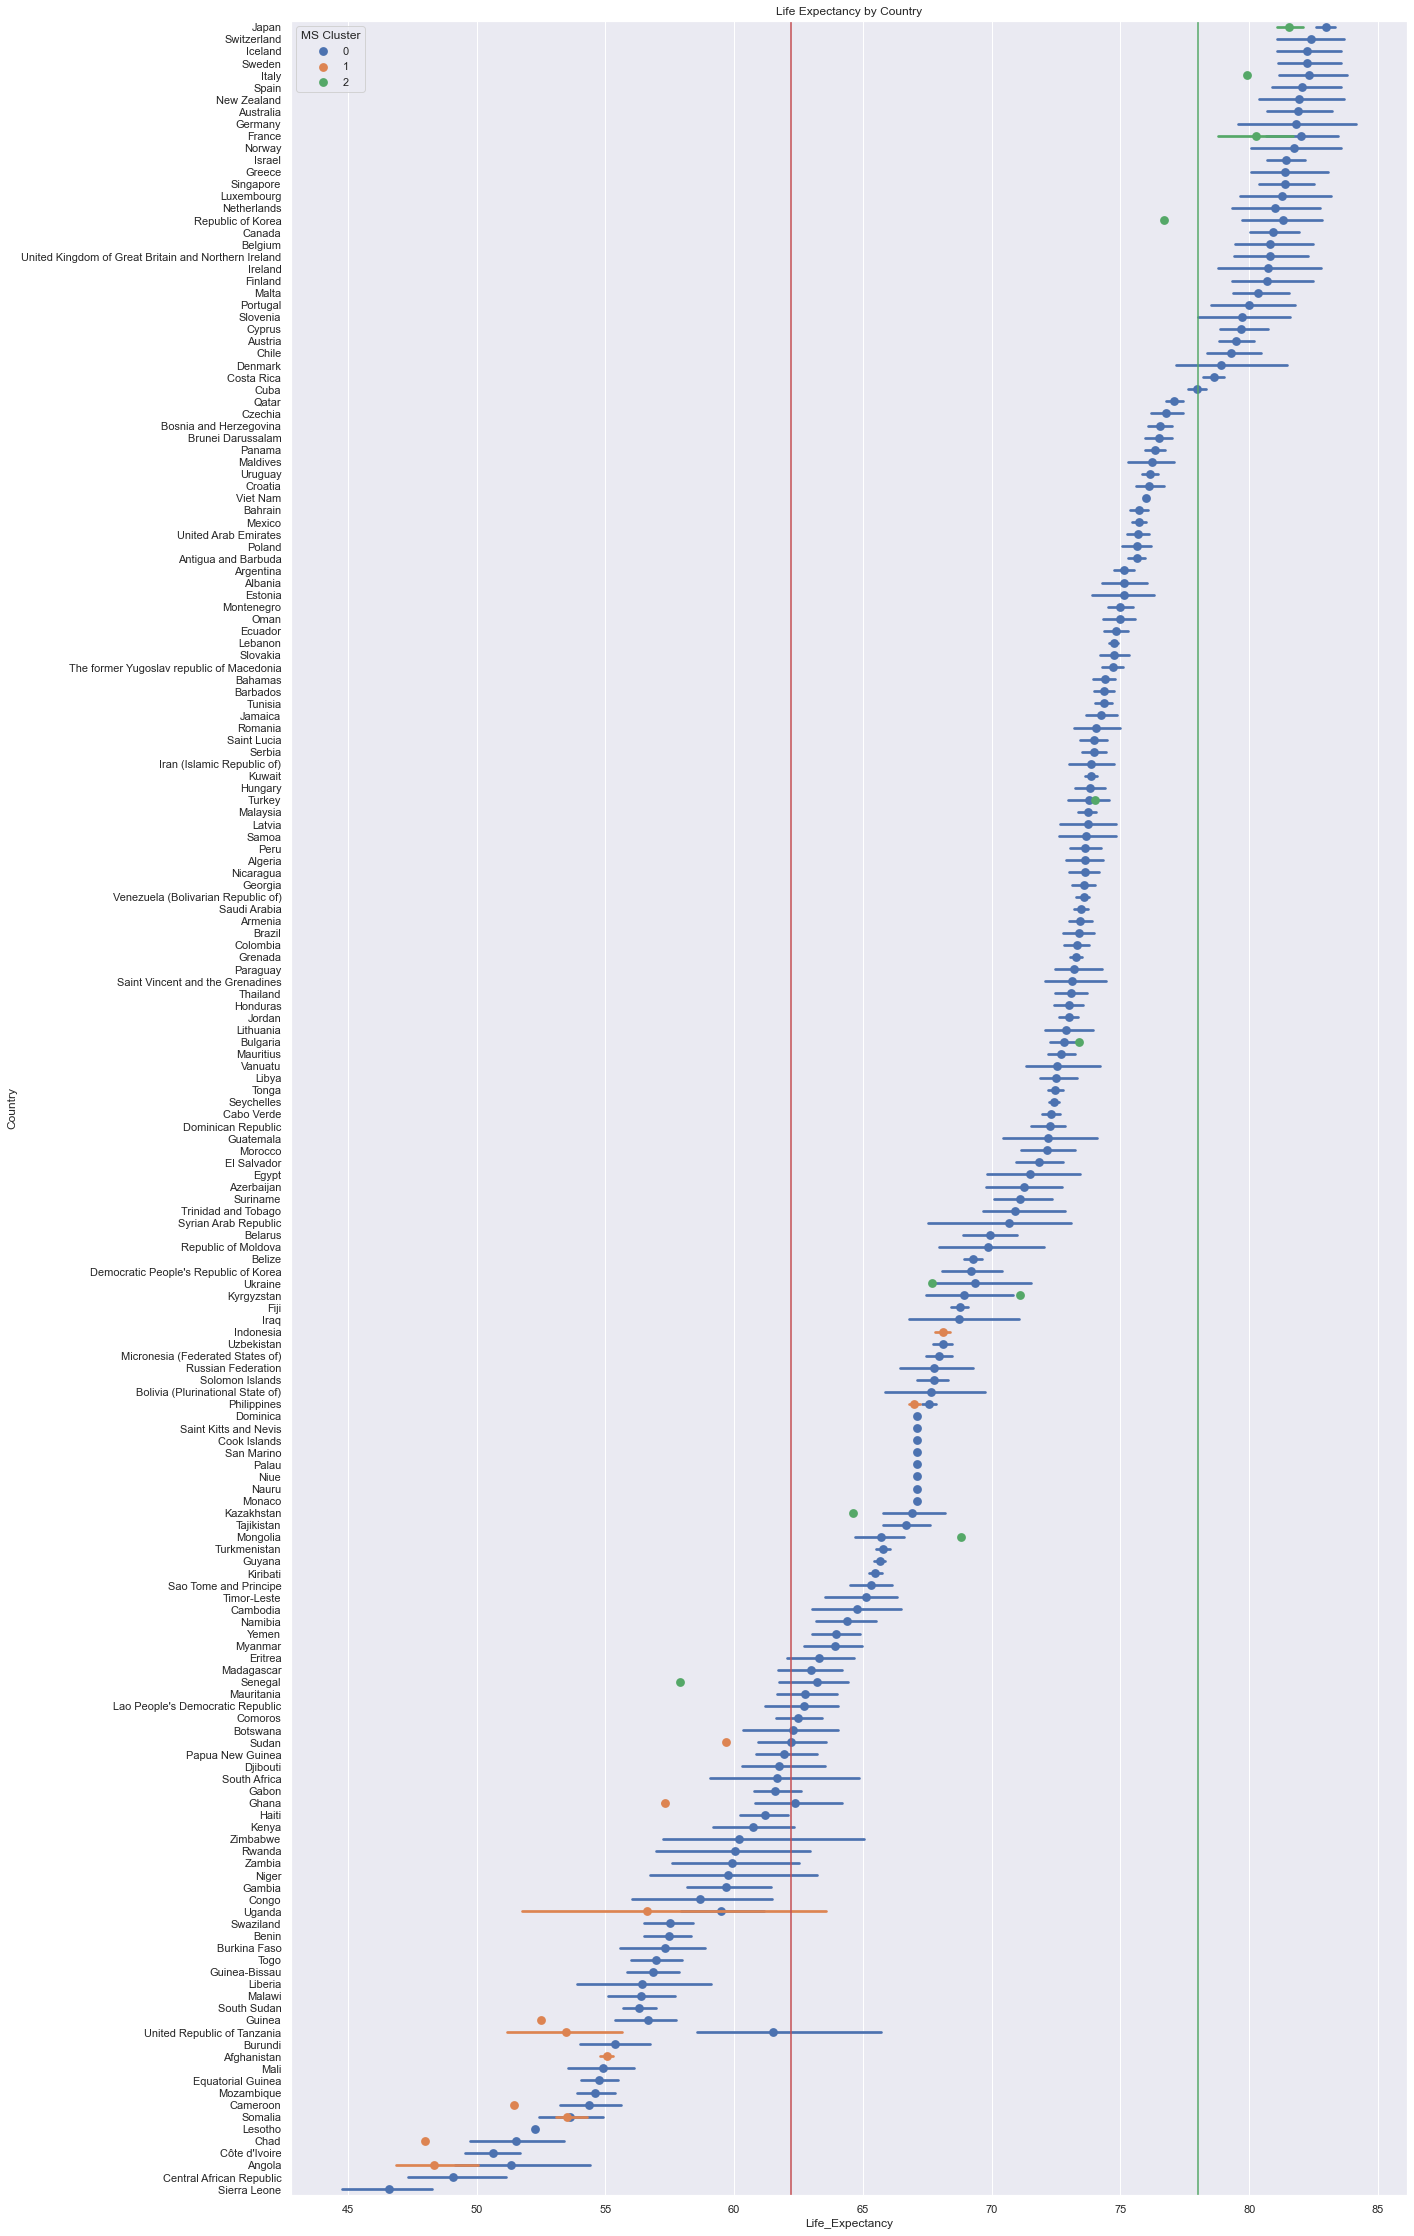

In [116]:
LEcountry=df_cl.groupby(df_cl['Country'])['Life_Expectancy'].mean().sort_values(kind="quicksort",ascending=False)
sns.pointplot(y='Country',x='Life_Expectancy',hue='MS Cluster',data=df_cl,order=LEcountry.index,join=False)
plt.title('Life Expectancy by Country')
plt.axvline(78,0,10,color='g')
plt.axvline(df_cl['Life_Expectancy'].mean()-df_cl['Life_Expectancy'].std(),0,10,color='r')
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

### K-Means

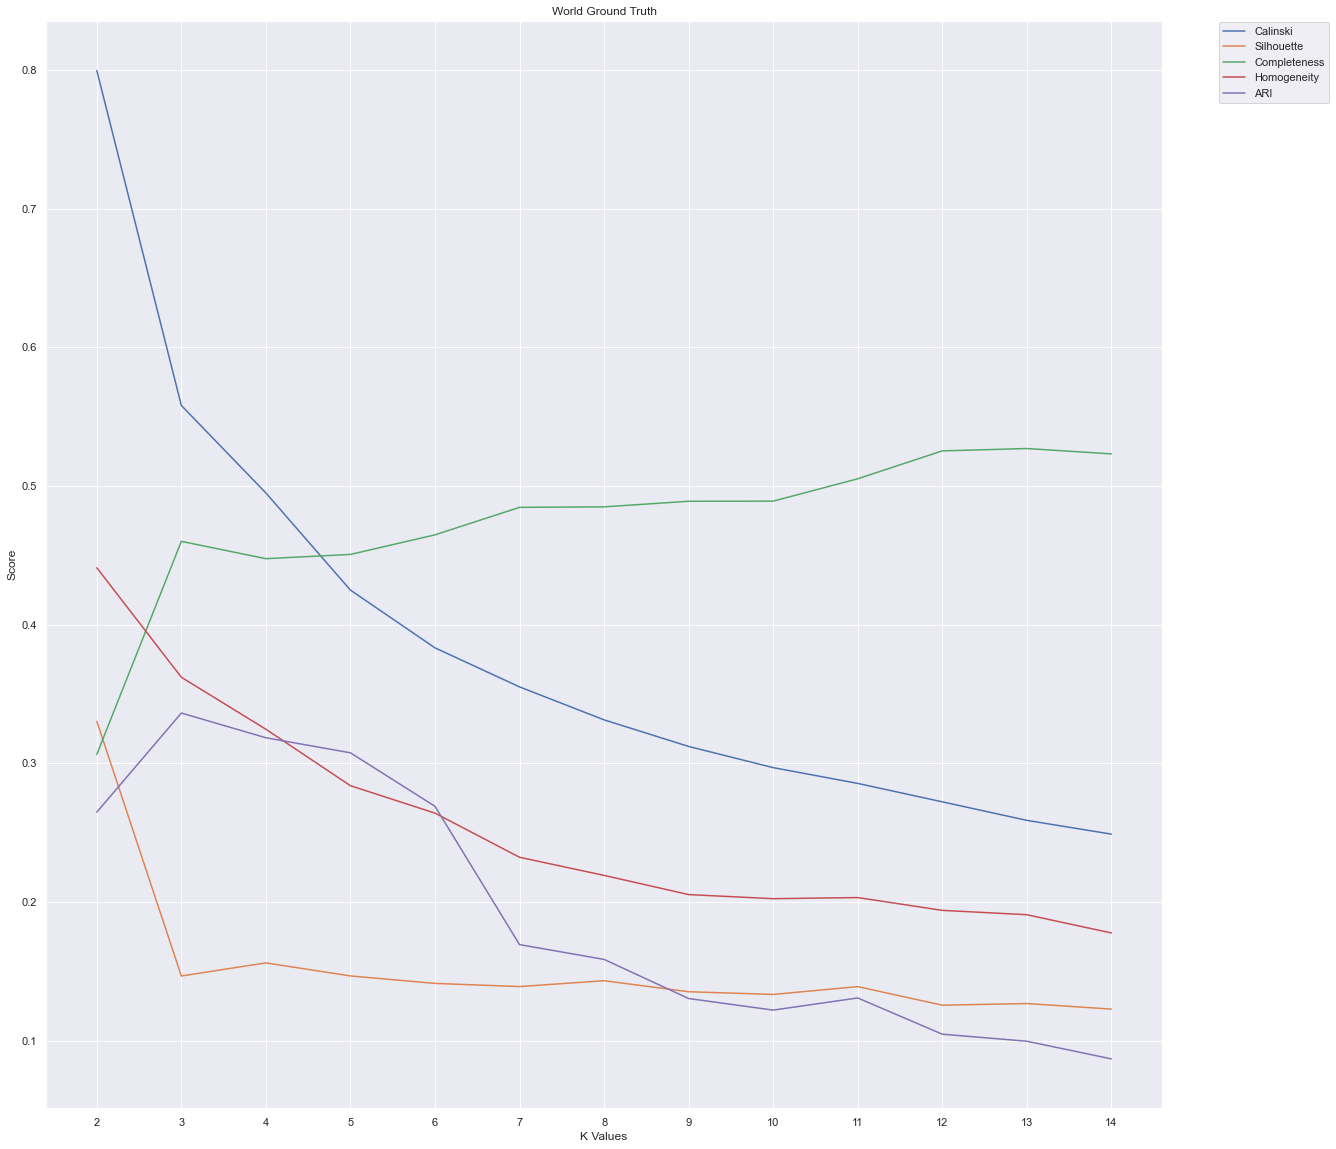

In [118]:
from sklearn.cluster import KMeans
#Scores
complete = []
homogenity = []
silhouette=[]
calinski=[]
adrs=[]

#Cluster Range
ns = list(range(2,15))

#Inputs and Ground Truth
Y = df_cl['world']
X_unscaled = df_cl.drop(['Country','world','Status'],1)
X=scale(X_unscaled)

for n in ns:
    km=KMeans(n_clusters=n, random_state=42)
    km.fit(X)
    y_pred=km.predict(X)
    cal=(metrics.calinski_harabasz_score(X, km.labels_)/1000)
    calinski.append(cal) 
    sil=metrics.silhouette_score(X, km.labels_, metric='euclidean')
    silhouette.append(sil)
    comp = metrics.completeness_score(y_pred,Y)
    complete.append(comp)
    homog = metrics.homogeneity_score(y_pred,Y)
    homogenity.append(homog)
    ar=metrics.adjusted_rand_score(y_pred,Y)
    adrs.append(ar)
    
#Plot
plt.plot(ns,calinski)
plt.plot(ns,silhouette)
plt.plot(ns, complete)
plt.plot(ns,homogenity)
plt.plot(ns,adrs)
plt.title('World Ground Truth')
plt.xlabel('K Values')
plt.ylabel('Score')
plt.legend(['Calinski','Silhouette','Completeness', 'Homogeneity','ARI'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(np.arange(2,15,1))
plt.show()

In [120]:
Y = df_cl['world']
X_unscaled = df_cl.drop(['Country','world','Status'],1)
X=scale(X_unscaled)
ncluster=3
km=KMeans(n_clusters=ncluster, random_state=42)
km.fit(X)
y_pred=km.predict(X)

# Extract cluster assignments for each data point.
labels = km.labels_
df_cl['KM Cluster']=labels

# Coordinates of the cluster centers.
cluster_centers = km.cluster_centers_

print("Number of estimated clusters: {}".format(ncluster))
print('Cal Harabaz Score: {}'.format(metrics.calinski_harabasz_score(X, km.labels_)/1000))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X, labels, metric='euclidean')))  
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y))
print('Completeness Score:',metrics.completeness_score(y_pred,Y))

print('Cluster Percentage')
((df_cl['KM Cluster'].value_counts()/len(df_cl['KM Cluster'])).round(3))*100

Number of estimated clusters: 3
Cal Harabaz Score: 0.6398689845148641
Silhouette Score: 0.2145687788139201
Homogenity Score: 0.3621036907151032
Completeness Score: 0.4601278185867652
Cluster Percentage


0    47.5
1    29.3
2    23.3
Name: KM Cluster, dtype: float64

In [121]:
len(df_cl['Country'].unique())

180

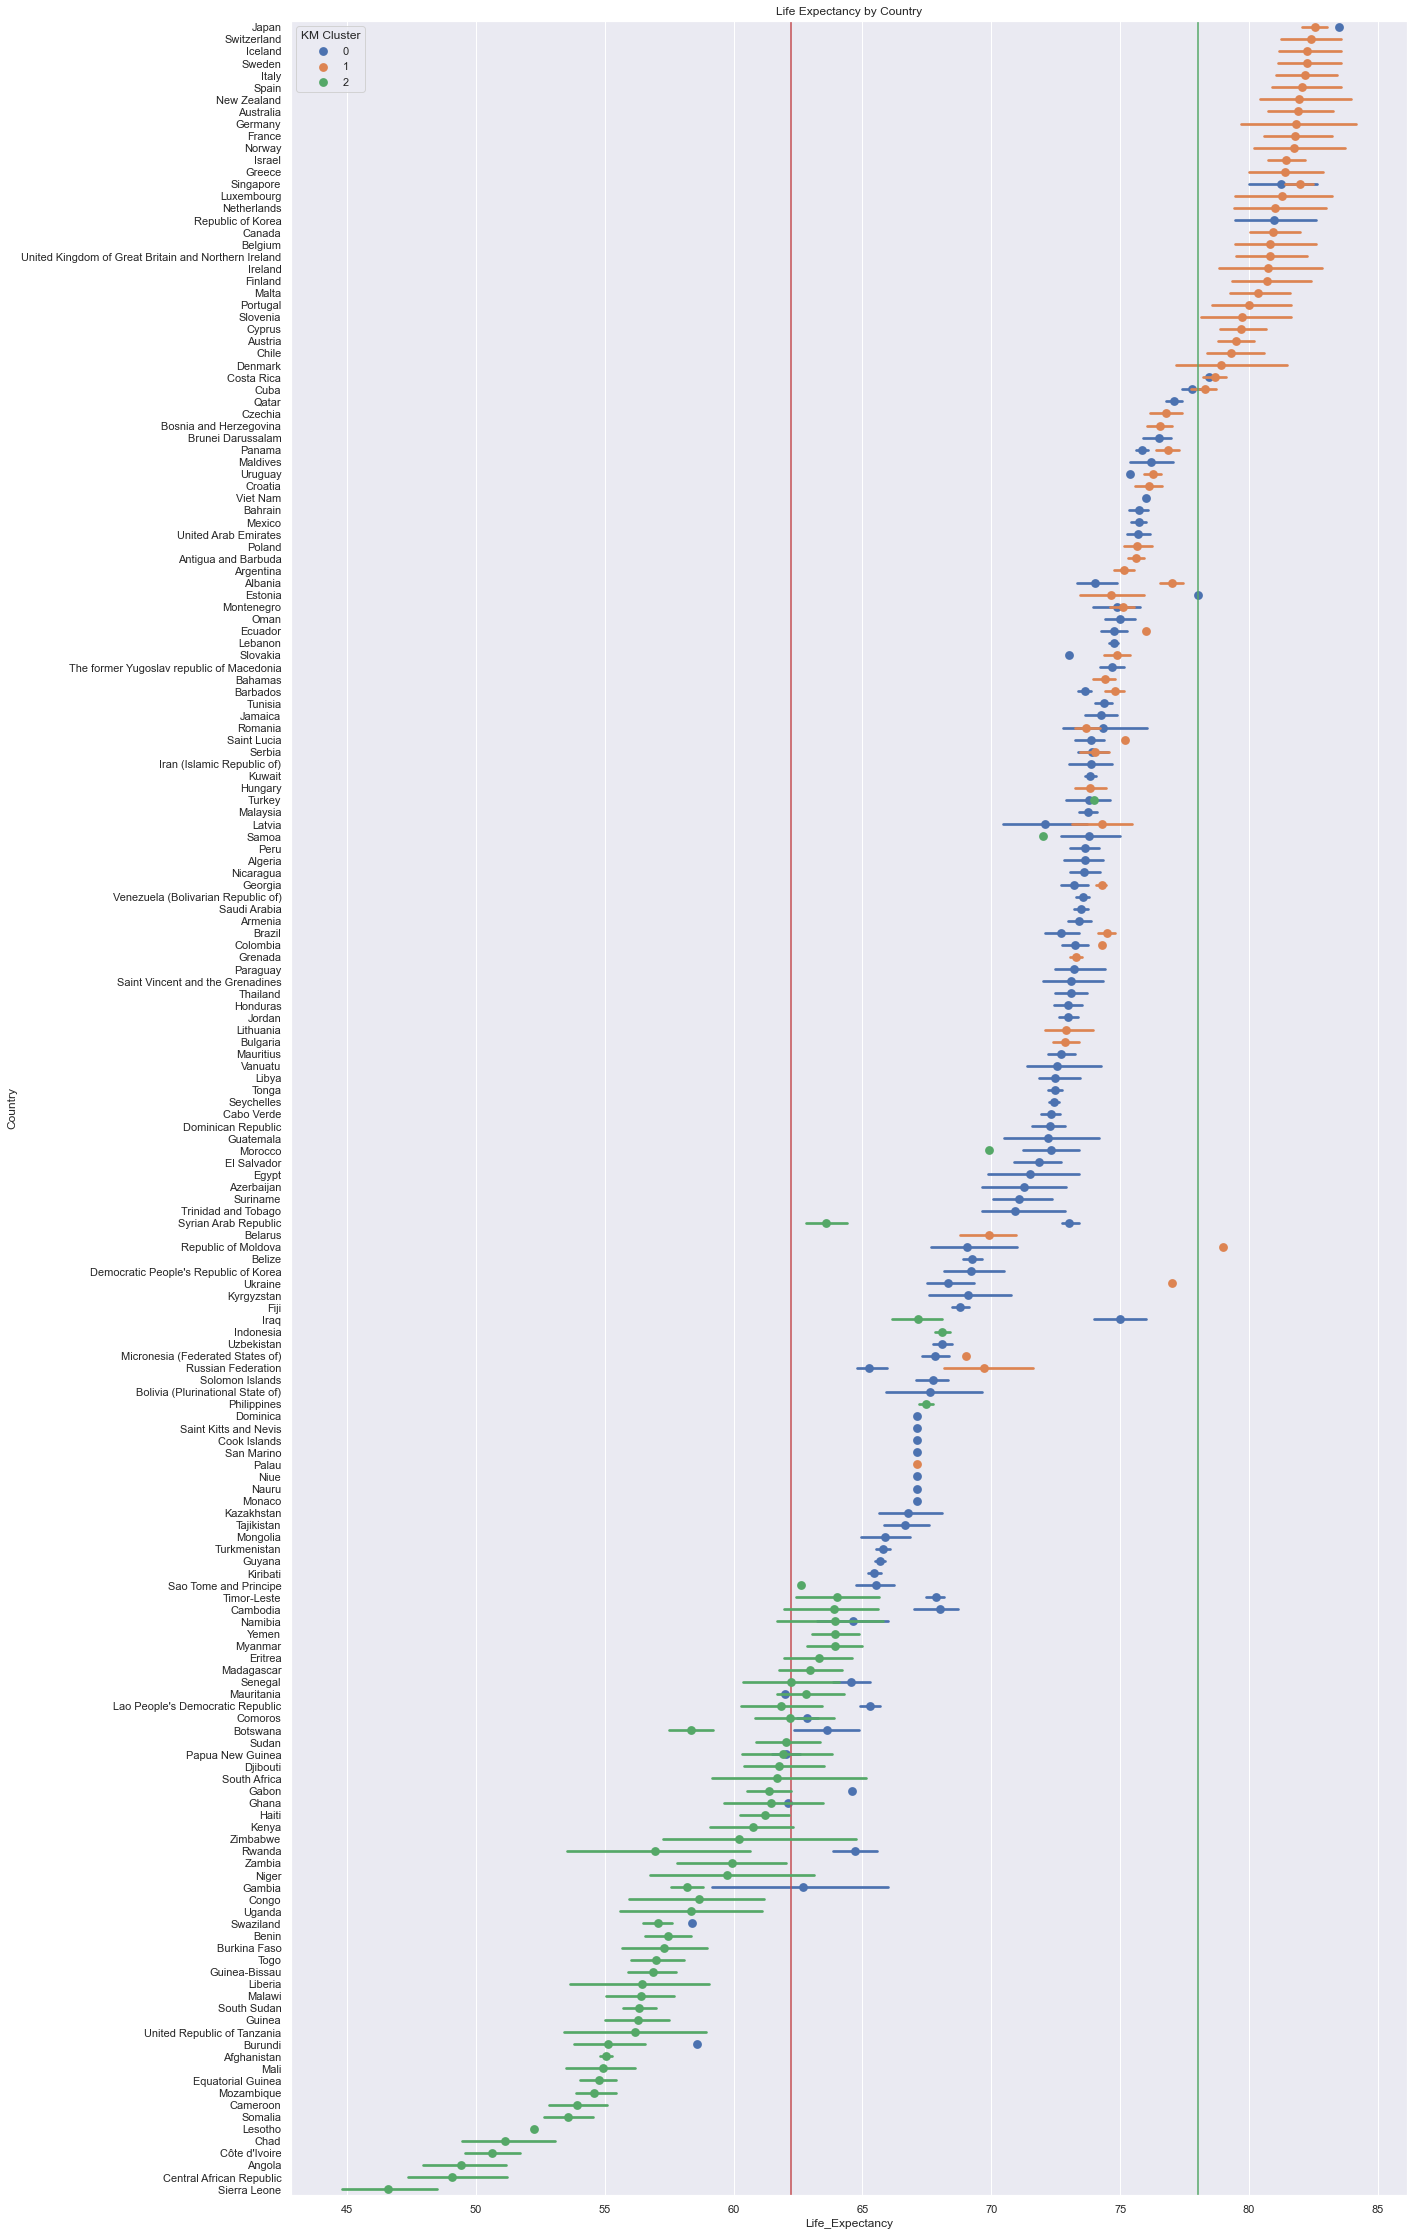

In [123]:
LEcountry=df_cl.groupby(df_cl['Country'])['Life_Expectancy'].mean().sort_values(kind="quicksort",ascending=False)
sns.pointplot(y='Country',x='Life_Expectancy',hue='KM Cluster',data=df_cl,order=LEcountry.index,join=False)
plt.title('Life Expectancy by Country')
plt.axvline(78,0,10,color='g')
plt.axvline(df_cl['Life_Expectancy'].mean()-df_cl['Life_Expectancy'].std(),0,10,color='r')
sns.set(rc={'figure.figsize':(20,20)})

In [124]:
def Clusterplot(column):
    if (column=="world") or (column=='Status'):
        x=df_cl[df_cl['KM Cluster']==0][column]
        y=df_cl[df_cl['KM Cluster']==0]['Life_Expectancy']
        x1=df_cl[df_cl['KM Cluster']==1][column]
        y1=df_cl[df_cl['KM Cluster']==1]['Life_Expectancy']
        x2=df_cl[df_cl['KM Cluster']==2][column]
        y2=df_cl[df_cl['KM Cluster']==2]['Life_Expectancy']
        #Plot
        plt.scatter(x,y,alpha=1,color='b')
        plt.scatter(x1,y1,alpha=1,color='r')
        plt.scatter(x2,y2,alpha=1,color='g')
        labels=['0','1','2']
        plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
        plt.ylabel('Life Expectancy')
        plt.xlabel(column)
   
    else:
        x=df_cl[df_cl['KM Cluster']==0][column]
        y=df_cl[df_cl['KM Cluster']==0]['Life_Expectancy']
        x1=df_cl[df_cl['KM Cluster']==1][column]
        y1=df_cl[df_cl['KM Cluster']==1]['Life_Expectancy']
        x2=df_cl[df_cl['KM Cluster']==2][column]
        y2=df_cl[df_cl['KM Cluster']==2]['Life_Expectancy']
        #Plot
        plt.scatter(x,y,alpha=1,color='b')
        plt.scatter(x1,y1,alpha=1,color='r')
        plt.scatter(x2,y2,alpha=1,color='g')
        #Fit Lines
        z1 =np.polyfit(x,y,1)
        z2 =np.polyfit(x1,y1,1)
        z3=np.polyfit(x2,y2,1)
        z1poly = np.poly1d(z1) 
        z2poly = np.poly1d(z2)
        z3poly= np.poly1d(z3)

        plt.plot(x,z1poly(x),linewidth=7.0,color='b')
        plt.plot(x1,z2poly(x1),linewidth=7.0,color='r')
        plt.plot(x2,z3poly(x2),linewidth=7.0,color='g')
        labels=['0','1','2']
        plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
        plt.ylabel('Life Expectancy')
        plt.xlabel(column)

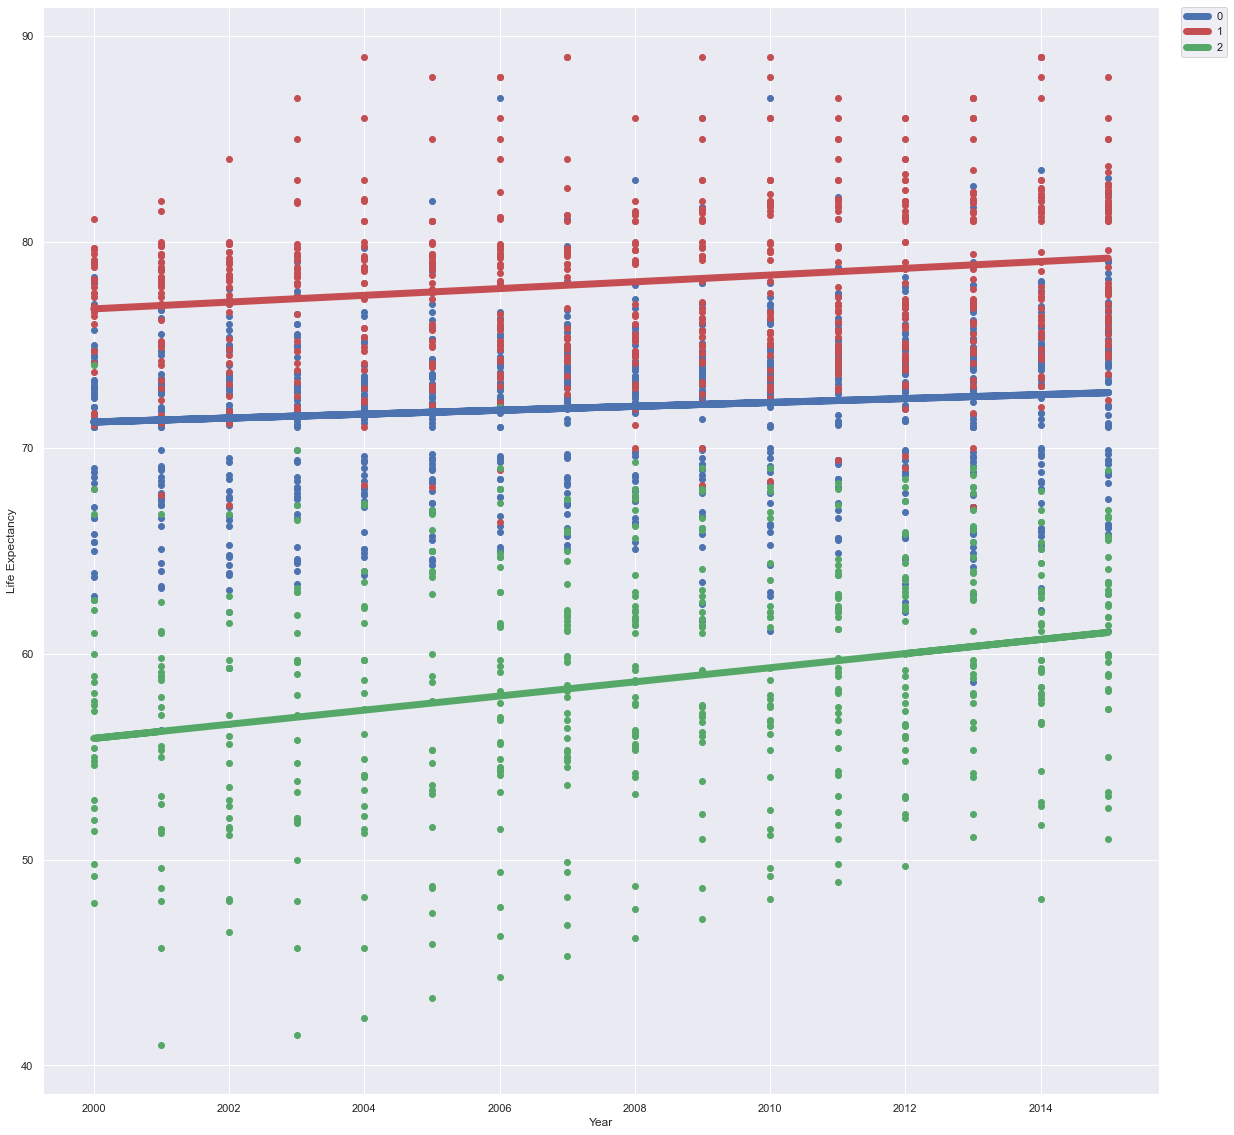

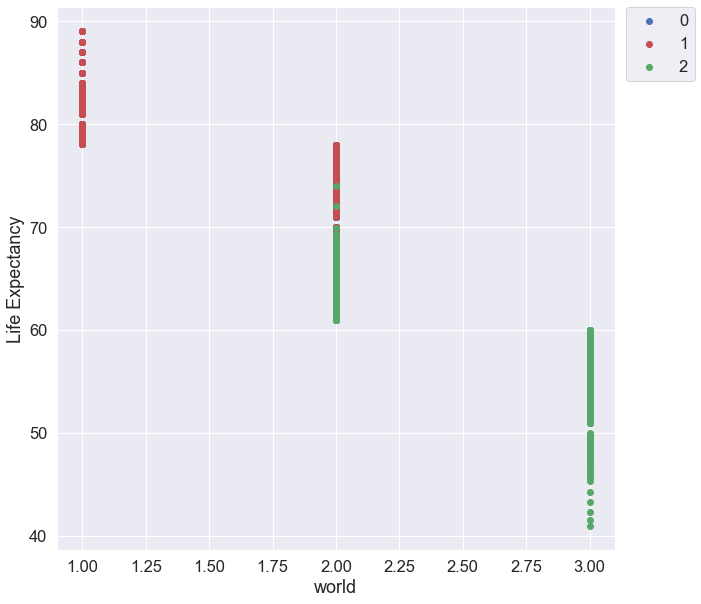

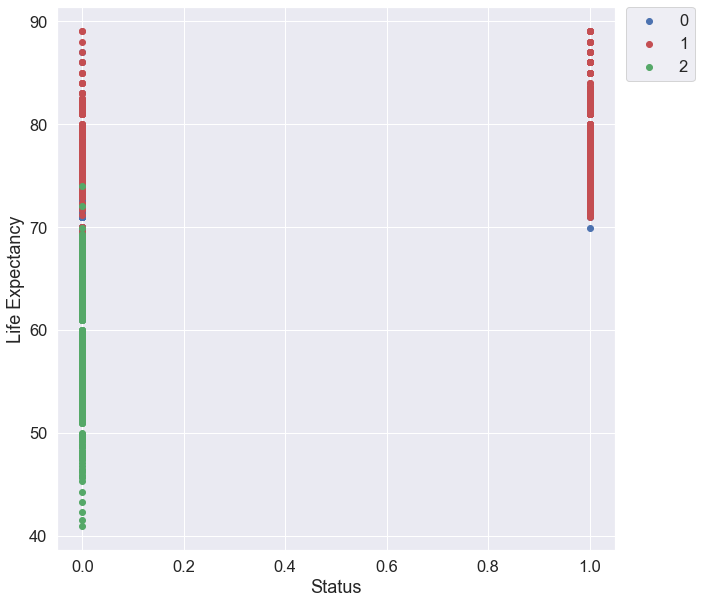

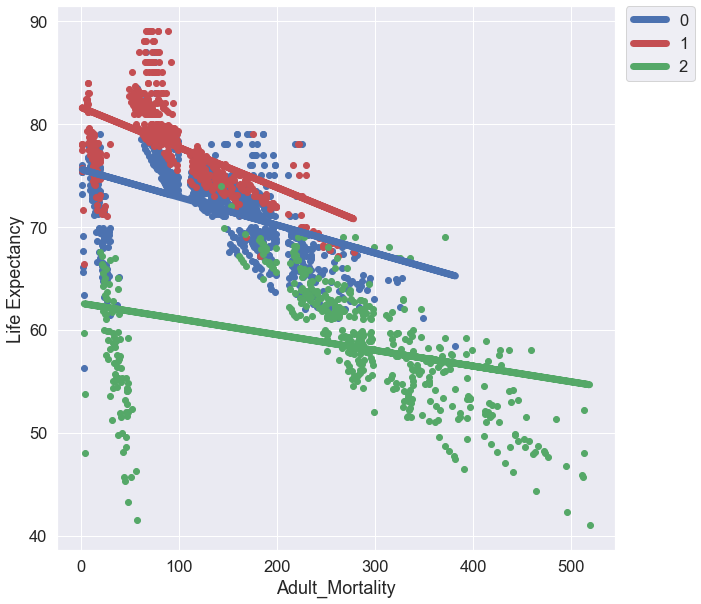

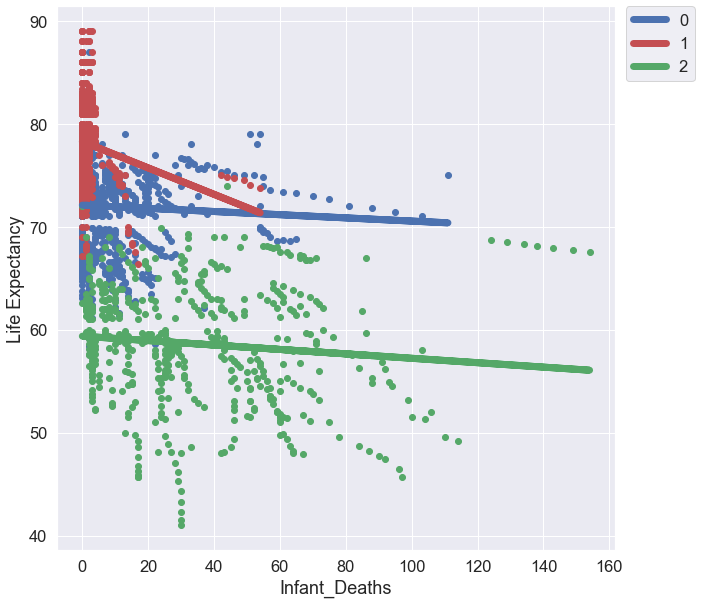

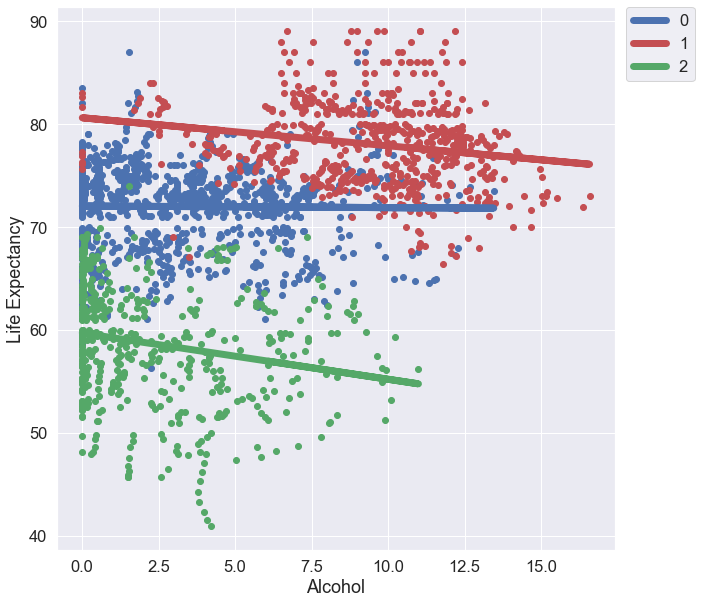

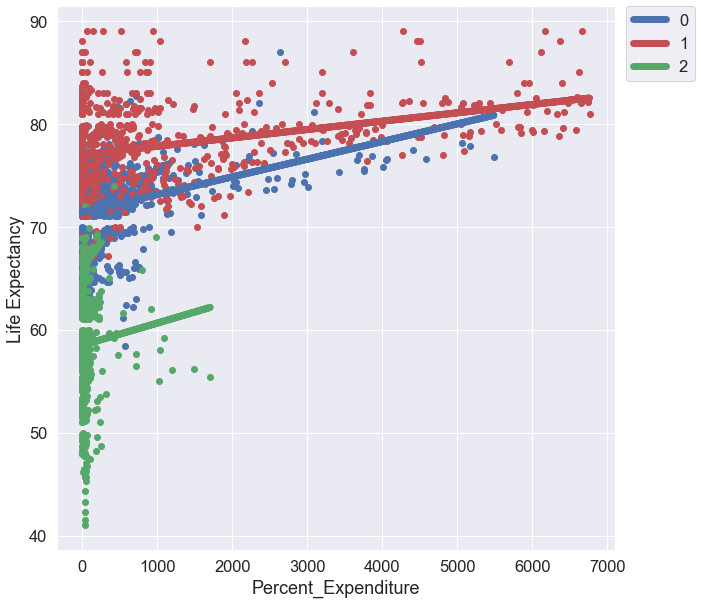

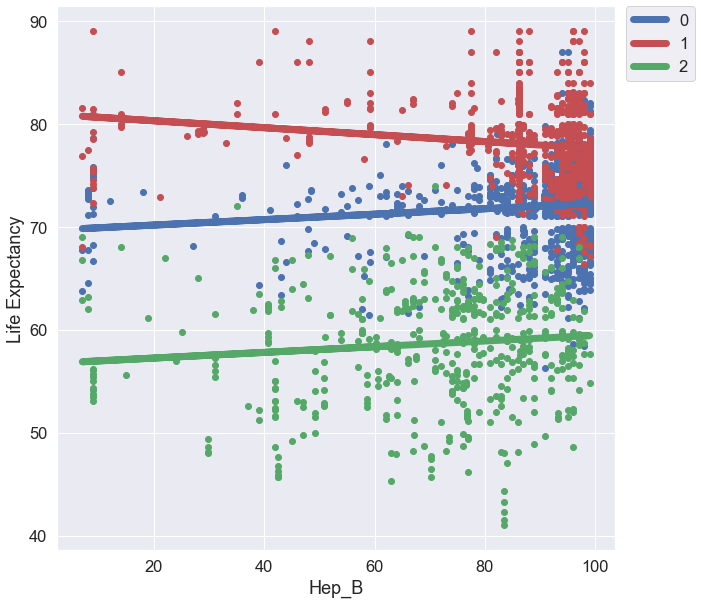

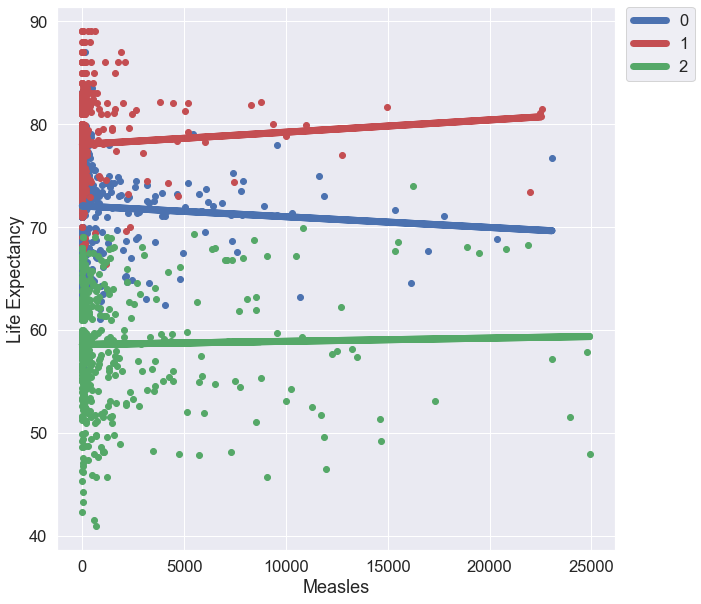

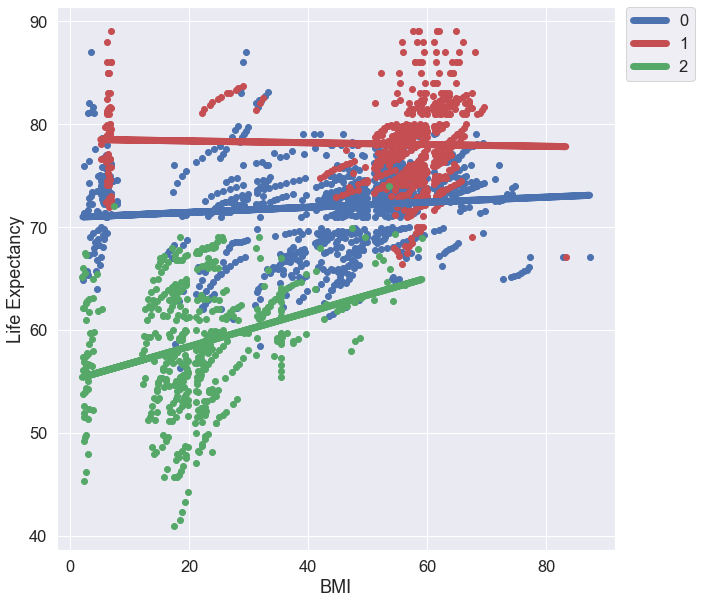

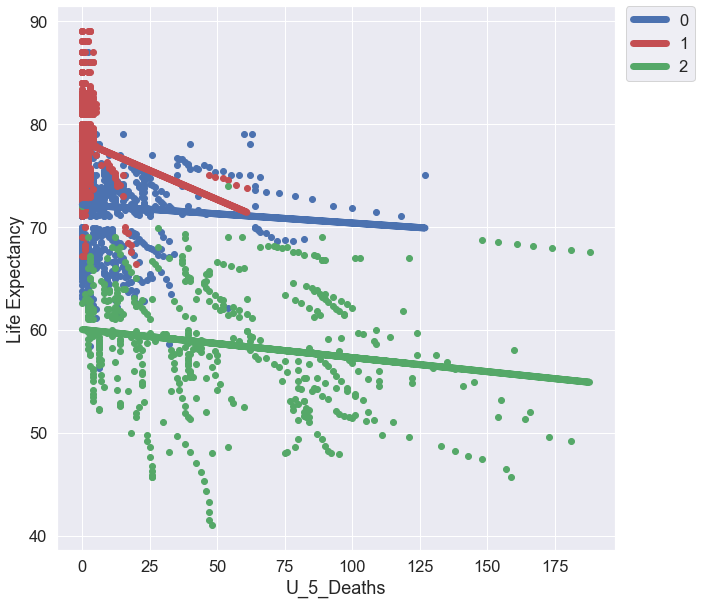

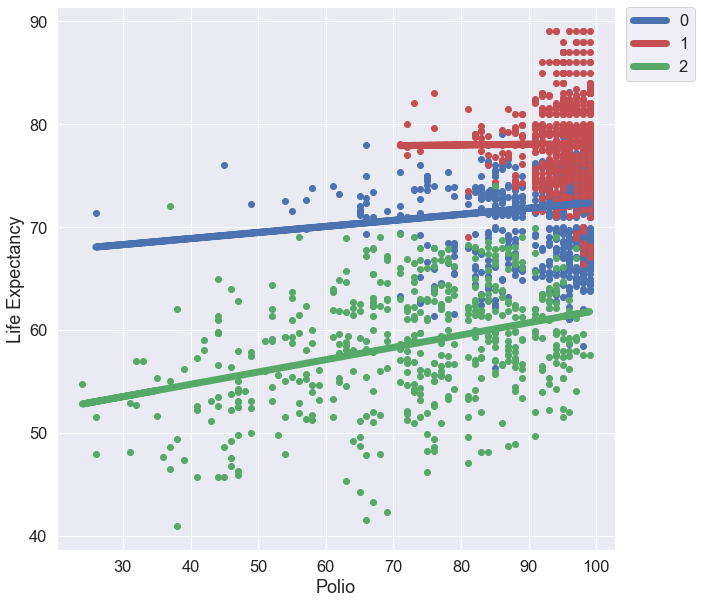

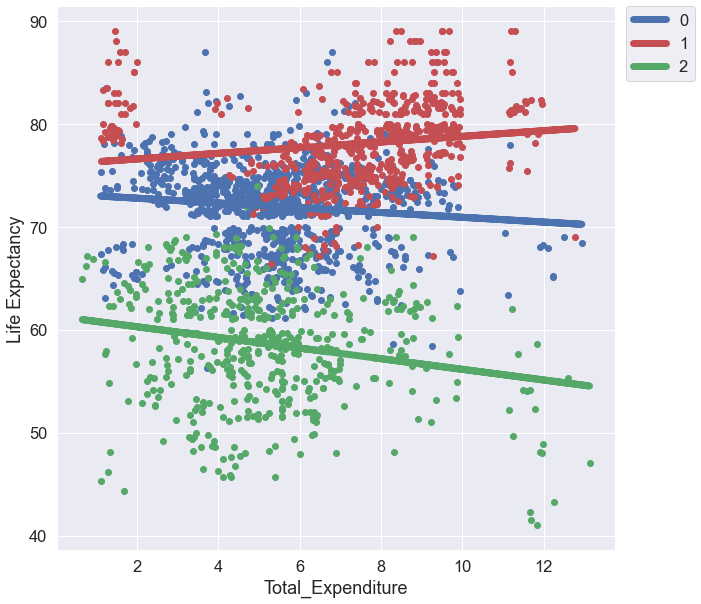

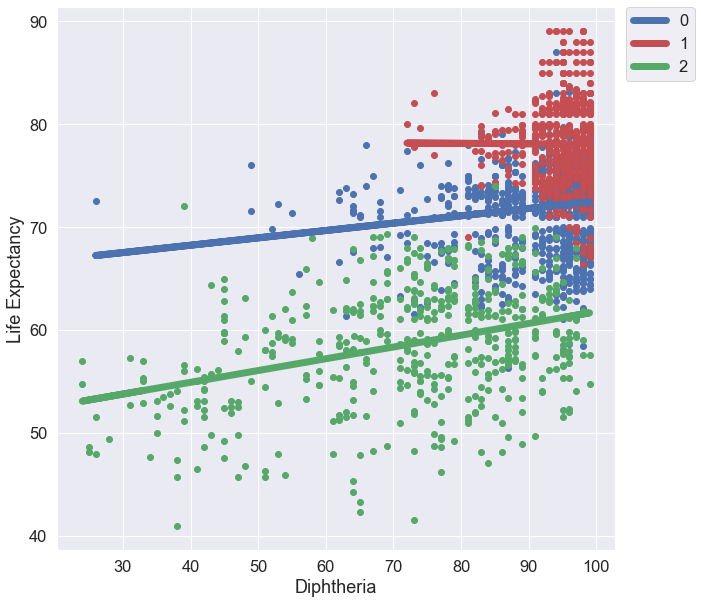

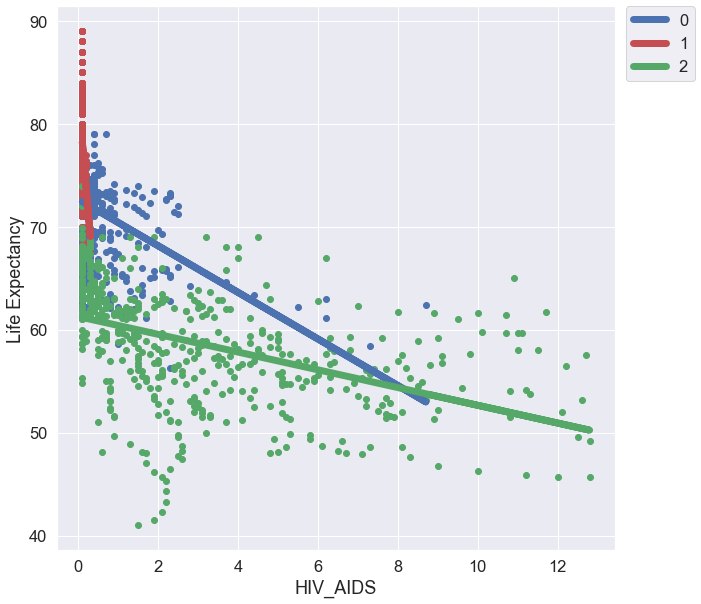

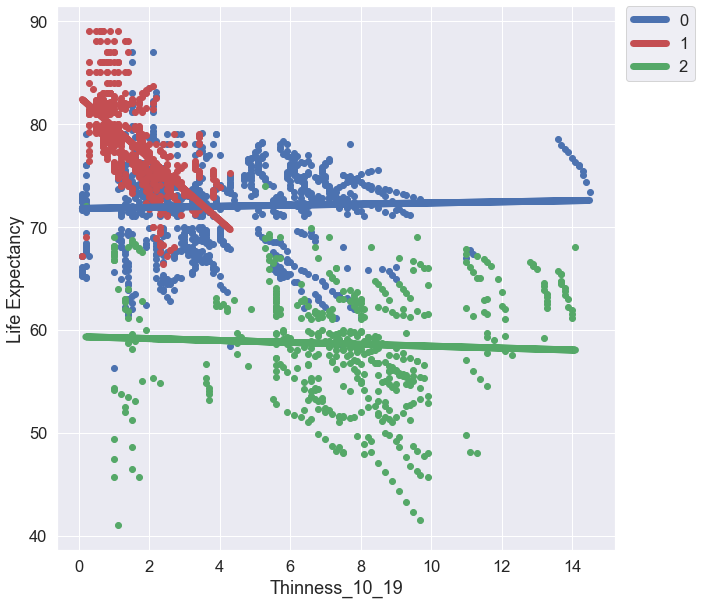

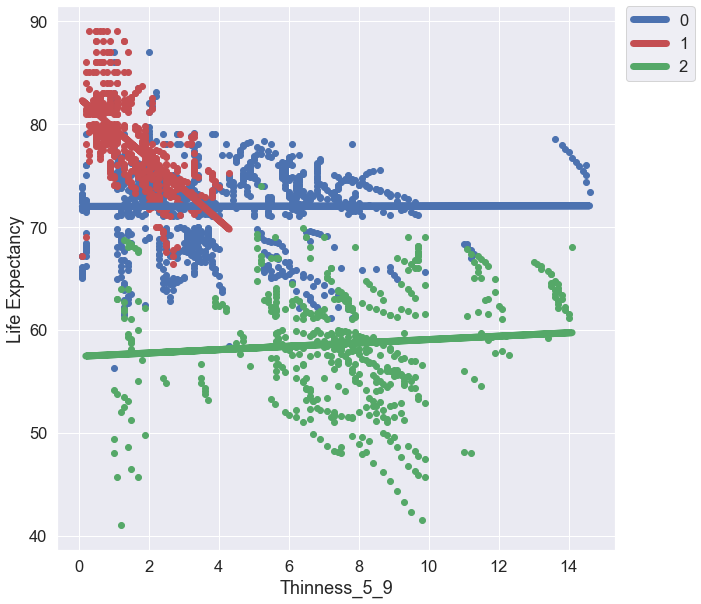

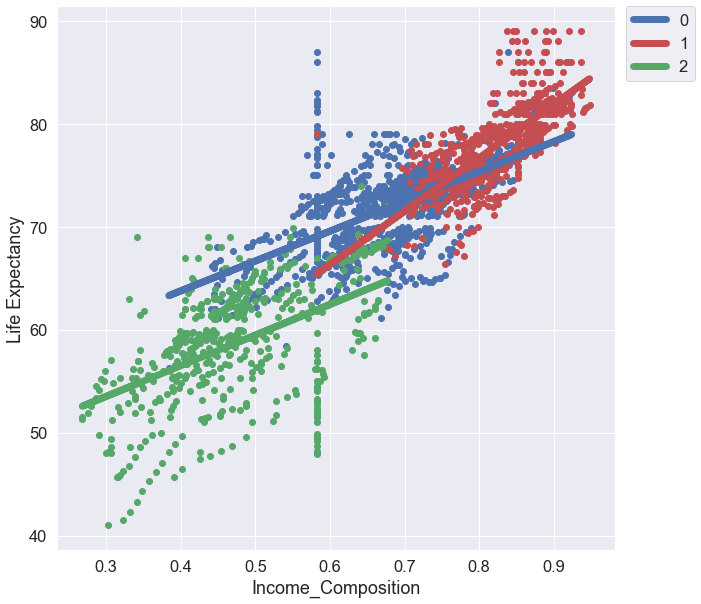

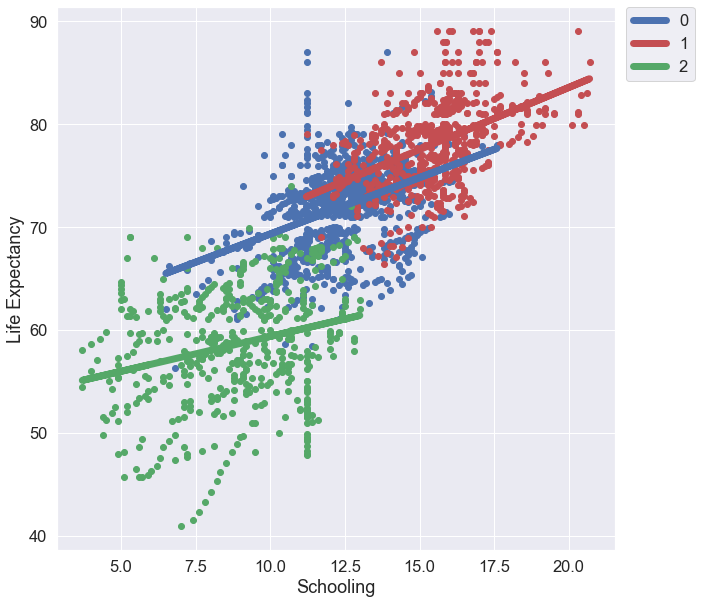

In [125]:
cols=['Year','world','Status','Adult_Mortality','Infant_Deaths', 'Alcohol', 'Percent_Expenditure', 'Hep_B', 'Measles',
       'BMI', 'U_5_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'Thinness_10_19', 'Thinness_5_9', 'Income_Composition',
       'Schooling']
for column in cols:
    Clusterplot(column)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.set(font_scale=1.5)
    plt.show()

## MIXED EFFECT MODEL

In [136]:
#Adjust Year
import sys
years=[2001, 2000, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002]
years.sort()

for year,i in zip(years,range(len(years))):
    df_reg['Year'][df_reg['Year'] == year]=i+1
    

<ipython-input-136-cdff23071c34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Year'][df_reg['Year'] == year]=i+1
<ipython-input-136-cdff23071c34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Year'][df_reg['Year'] == year]=i+1
<ipython-input-136-cdff23071c34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Year'][df_reg['Year'] == year]=i+1
<ipython-input-136-cdff23071c34>:8: SettingWithCopyWarning: 
A v

### Calculate ICC

In [137]:
# Function to calculate the intraclass correlation
def ICC(fittedmodel):
    between_var= fittedmodel.cov_re.iloc[0,0]
    resid=fittedmodel.scale
    icc=between_var/(between_var+resid)
    return icc

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams
features=['Year','Country', 'Status', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percent_Expenditure', 'Hep_B', 'Measles',
       'BMI', 'U_5_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'Thinness_10_19', 'Thinness_5_9', 'Income_Composition',
       'Schooling', 'world']
for col,i in zip(features,range(len(features))):
    if i==0:
        # Model to use for calculating the ICC
        print('Model {}'.format(col))
        model = smf.mixedlm("Life_Expectancy ~ 1",data=df_reg,groups=df_reg[col])
        result = model.fit()
        print(result.summary())
        print('The Intraclass Correlation is: {:.3f}'.format(ICC(result)))
        print('Group Var: {:.2f}\n'.format(result.cov_re.iloc[0,0]))
        
        #DataFrame Columns
        LMresults=pd.DataFrame(index=range(len(features)))
        LMresults['Column']=col
        LMresults['ICC']=ICC(result).round(3)
        LMresults['Group Var']=result.cov_re.iloc[0,0].round(2)
    else:
        # Model to use for calculating the ICC
        print('Model {}'.format(col))
        model = smf.mixedlm("Life_Expectancy ~ 1",data=df_reg,groups=df_reg[col])
        result = model.fit()
        print(result.summary())
        print('The Intraclass Correlation is: {:.3f}'.format(ICC(result)))
        print('Group Var: {:.2f}\n'.format(result.cov_re.iloc[0,0]))
        
        #Add to DataFrame 
        LMresults.loc[i]=[col,ICC(result).round(3),result.cov_re.iloc[0,0].round(2)]     

Model Year
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       16      Scale:              71.0640        
Min. group size:  105     Log-Likelihood:     -7662.6519     
Max. group size:  155     Converged:          Yes            
Mean group size:  134.8                                      
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     70.638     0.229  308.110  0.000  70.188  71.087
Group Var      0.308     0.036                                

The Intraclass Correlation is: 0.004
Group Var: 0.31

Model Country
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Group

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       561     Scale:              27.7021        
Min. group size:  1       Log-Likelihood:     -7138.3269     
Max. group size:  19      Converged:          Yes            
Mean group size:  3.8                                        
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     69.697     0.312  223.262  0.000  69.086  70.309
Group Var     43.482     0.701                                

The Intraclass Correlation is: 0.611
Group Var: 43.48

Model U_5_Deaths
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:     

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       161     Scale:              25.4250        
Min. group size:  1       Log-Likelihood:     -6823.8676     
Max. group size:  81      Converged:          Yes            
Mean group size:  13.4                                       
--------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept      68.692     0.771  89.052  0.000  67.180  70.204
Group Var      90.072     2.284                               

The Intraclass Correlation is: 0.780
Group Var: 90.07

Model world
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       3  

In [139]:
LMresults

Column    ICC  Group Var
0                  Year  0.004       0.31
1               Country  0.932      71.58
2                Status  0.469      49.63
3       Adult_Mortality  0.905      94.02
4         Infant_Deaths  0.408      27.72
5               Alcohol  0.241      17.25
6   Percent_Expenditure  0.008       0.58
7                 Hep_B  0.595      62.30
8               Measles  0.460      42.51
9                   BMI  0.611      43.48
10           U_5_Deaths  0.431      28.92
11                Polio  0.503      43.37
12    Total_Expenditure  0.159      11.38
13           Diphtheria  0.528      47.27
14             HIV_AIDS  0.430      20.75
15       Thinness_10_19  0.504      37.14
16         Thinness_5_9  0.504      36.81
17   Income_Composition  0.820      78.00
18            Schooling  0.780      90.07
19                world  0.908     172.93

### Mixed Effect Model Comparison
Comparison of Random Intercept(RI), Random Slopes(RS), and Random Intercepts and Slopes Models(RIS):

* For Chosen Model: Plot Residual Distribution
* Check Variance with respect to Life Expectancy
* Check Variance with respect to Random Effect(if applicable)

### RI Model

In [146]:
cols=['Year', 'Status', 'Adult_Mortality','Infant_Deaths', 'Alcohol', 'Percent_Expenditure', 'Hep_B', 'Measles',
       'BMI', 'U_5_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'Thinness_10_19', 'Thinness_5_9', 'Income_Composition',
       'Schooling', 'world']
re=['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-']

Y=df_reg['Life_Expectancy']
for col,r,i in zip(cols,re,range(len(re))): 
    if i==0:
        print('Running Random Intercepts')
        model = smf.mixedlm("Life_Expectancy~{}".format(col),data=df_reg,groups=df_reg['Country'])
        riresult = model.fit()
        print(riresult.summary())
        print('FE: {}'.format(col))
        print('The Intraclass Correlation is: {}'.format(ICC(riresult)))
        print('The Likelihood is: {}'.format(riresult.llf))
        print('RE Variance is {}'.format(r))
        
        #Predicted Values
        Y_pred = riresult.fittedvalues
        RMSE=mean_squared_error(Y, Y_pred)**0.5
        var=Y_pred.std()**2
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(var),'\n')
        
        #DataFrame Columns
        MXLMresults=pd.DataFrame(index=range(11))
        MXLMresults['Model']='RI'
        MXLMresults['Fixed Effect']=col
        MXLMresults['Random Effect']=r
        MXLMresults['RE VAR']=riresult.cov_re.iloc[0,0].round(2)     
        MXLMresults['RMSE']=RMSE.round(3)
        MXLMresults['ICC']=ICC(riresult).round(3)
        MXLMresults['Likelihood']=riresult.llf.round(1)
        MXLMresults['LE pred Min']=round(Y_pred.min(),1)
        MXLMresults['LE pred Max']=round(Y_pred.max(),1)
        MXLMresults['LE pred Mean']=round(Y_pred.mean(),1)
        MXLMresults['LE pred Std']=round(Y_pred.std(),3)
        MXLMresults['LE pred Var']=round(var,3)
    
    else:  
        print('Running Random Intercepts Model')
        model = smf.mixedlm("Life_Expectancy~{}".format(col),data=df_reg,groups=df_reg['Country'])
        riresult = model.fit()
        print(riresult.summary())
        print('FE: {}'.format(col))
        print('The Intraclass Correlation is: {}'.format(ICC(riresult)))
        print('The Likelihood is: {}'.format(riresult.llf))
        print('RE Variance is {}'.format(r))

        #Predicted Values
        Y_pred = riresult.fittedvalues
        RMSE=mean_squared_error(Y, Y_pred)**0.5
        var=Y_pred.std()**2
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(var),'\n')   
        
        #Add to results
        MXLMresults.loc[i]=['RI',col,r,riresult.cov_re.iloc[0,0].round(2)
                              ,RMSE.round(3),ICC(riresult).round(3),riresult.llf.round(1)
                              ,round(Y_pred.min(),1),round(Y_pred.max(),1),round(Y_pred.mean(),1),round(Y_pred.std(),3),round(var,3)]         

Running Random Intercepts
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              3.2579         
Min. group size:  1       Log-Likelihood:     -4830.5831     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     66.911     0.651  102.799  0.000  65.635  68.186
Year           0.304     0.009   34.440  0.000   0.287   0.322
Group Var     74.572     4.584                                

FE: Year
The Intraclass Correlation is: 0.9581410454808066
The Likelihood is: -4830.583118387869
RE Variance is -
RMSE: 1.728
Minimum LE: 44.5
Maximum LE: 85.0
Average Predi

RMSE: 2.159
Minimum LE: 46.1
Maximum LE: 82.7
Average Predicted LE: 70.7
LE Standard Deviation: 8.115
LE Variance: 65.859 

Running Random Intercepts Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              5.0950         
Min. group size:  1       Log-Likelihood:     -5273.9887     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     69.910     0.629  111.076  0.000  68.676  71.144
Measles       -0.000     0.000   -7.264  0.000  -0.000  -0.000
Group Var     70.552     3.480                                

FE: Measles
The Intraclass Correlation is: 

RMSE: 1.990
Minimum LE: 43.3
Maximum LE: 82.5
Average Predicted LE: 70.7
LE Standard Deviation: 8.166
LE Variance: 66.684 

Running Random Intercepts Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              5.1430         
Min. group size:  1       Log-Likelihood:     -5264.0185     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         71.269    0.622 114.604 0.000 70.050 72.488
Thinness_10_19    -0.361    0.048  -7.563 0.000 -0.455 -0.268
Group Var         61.894    3.092                            

FE: Thinness_10_19
The Intraclass Correlation is:

## RS Model

In [148]:
cols=['Status','world','Year','Status','world','Status','world','Year','Status','world','Year','Status'
      ,'world','Year','Status','world','Year']
re=['Year','Year','Status','Schooling','Schooling','HIV_AIDS','HIV_AIDS','HIV_AIDS','Income_Composition','Income_Composition','Income_Composition'
    ,'Alcohol','Alcohol','Alcohol','U_5_Deaths','U_5_Deaths','U_5_Deaths']

Y=df_reg['Life_Expectancy']
for col,r,i in zip(cols,re,range(len(re))): 
        print('Running Random Slopes Model')
        model = smf.mixedlm("Life_Expectancy~{}".format(col),data=df_reg,groups=df_reg['Country'],re_formula="~0+{}".format(r))
        rsresult = model.fit()
        print(rsresult.summary())
        print('FE: {}'.format(col))
        print('The Intraclass Correlation is: {}'.format(ICC(rsresult)))
        print('The Likelihood is: {}'.format(rsresult.llf))
        print('{} Variance is {}'.format(r,rsresult.cov_re.iloc[0,0].round(2)))

        #Predicted Values
        Y_pred = rsresult.fittedvalues
        RMSE=mean_squared_error(Y, Y_pred)**0.5
        var=Y_pred.std()**2
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(var),'\n')   
   
        #Add to results
        MXLMresults.loc[i+19]=['RS',col,r,rsresult.cov_re.iloc[0,0].round(2)
                              ,RMSE.round(3),ICC(rsresult).round(3),rsresult.llf.round(1)
                              ,round(Y_pred.min(),1),round(Y_pred.max(),1),round(Y_pred.mean(),1),round(Y_pred.std(),3),round(var,3)]         

Running Random Slopes Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              16.4775        
Min. group size:  1       Log-Likelihood:     -6386.4651     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     66.778     0.208  321.420  0.000  66.370  67.185
Status        10.064     0.446   22.567  0.000   9.190  10.938
Year Var       0.422     0.012                                

FE: Status
The Intraclass Correlation is: 0.024991426132218716
The Likelihood is: -6386.4651231966
Year Variance is 0.42
RMSE: 3.892
Minimum LE: 40.3
Maximum LE: 88.9
Aver

RMSE: 2.153
Minimum LE: 40.9
Maximum LE: 82.7
Average Predicted LE: 70.7
LE Standard Deviation: 8.118
LE Variance: 65.907 

Running Random Slopes Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              5.2051         
Min. group size:  1       Log-Likelihood:     -5435.6713     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
-------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         66.034    0.270 244.268 0.000 65.504 66.564
Year               0.221    0.012  18.026 0.000  0.197  0.245
HIV_AIDS Var    4188.701  218.726                            

FE: Year
The Intraclass Correlation is: 0.99875889087

RMSE: 3.248
Minimum LE: 42.3
Maximum LE: 88.0
Average Predicted LE: 70.7
LE Standard Deviation: 7.689
LE Variance: 59.115 

Running Random Slopes Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              7.7274         
Min. group size:  1       Log-Likelihood:     -5660.1952     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         73.521    0.130 563.509 0.000 73.265 73.776
Status             5.335    0.219  24.353 0.000  4.906  5.764
U_5_Deaths Var     4.170    0.215                            

FE: Status
The Intraclass Correlation is: 0.350505969

## RIS Model

In [179]:
cols=['Status','world','Year','Status','world','Status','world','Year','Status','world','Year','Status'
      ,'world','Year','Status','world','Year']
re=['Year','Year','Schooling','Schooling','HIV_AIDS','HIV_AIDS','HIV_AIDS','Income_Composition','Income_Composition','Income_Composition'
    ,'Alcohol','Alcohol','Alcohol','U_5_Deaths','U_5_Deaths','U_5_Deaths']
Y=df_reg['Life_Expectancy']
for col,r,i in zip(cols,re,range(len(re))): 
    print('Running Random Slopes+Intercepts Model')
    model = smf.mixedlm("Life_Expectancy~{}".format(col),data=df_reg,groups=df_reg['Country'],re_formula="~{}".format(r))
    print(col,r)
    if(col == r):
        pass
    risresult = model.fit()
    print(risresult.summary())
    print('FE: {}'.format(col))
    print('The Intraclass Correlation is: {}'.format(ICC(risresult)))
    print('The Likelihood is: {}'.format(risresult.llf))
    print('{} Variance is {}'.format(r,risresult.cov_re.iloc[1,1].round(2)))

    #Predicted Values
    Y_pred = risresult.fittedvalues
    RMSE=mean_squared_error(Y, Y_pred)**0.5
    var=Y_pred.std()**2
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(var),'\n')   
   
      
#Add to results
    MXLMresults.loc[i+36]=['RIS',col,r,risresult.cov_re.iloc[1,1].round(2)
                              ,RMSE.round(3),ICC(risresult).round(3),risresult.llf.round(1)
                              ,round(Y_pred.min(),1),round(Y_pred.max(),1),round(Y_pred.mean(),1),round(Y_pred.std(),3),round(var,3)]            
      

Running Random Slopes+Intercepts Model
Status Year
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              2.2133         
Min. group size:  1       Log-Likelihood:     -4641.2790     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          71.487    0.878 81.400 0.000 69.766 73.208
Status             11.268    1.341  8.403 0.000  8.640 13.896
Group Var         125.061   12.770                           
Group x Year Cov   -3.732    0.409                           
Year Var            0.172    0.015                           

FE: Status
The Intraclass Corr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Life_Expectancy
No. Observations:  2157     Method:              REML           
No. Groups:        180      Scale:               2.7915         
Min. group size:   1        Log-Likelihood:      -4893.3394     
Max. group size:   16       Converged:           No             
Mean group size:   12.0                                         
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             63.073    1.024 61.579 0.000 61.065 65.080
Year                   0.252    0.011 22.112 0.000  0.230  0.275
Group Var             63.748    4.076                           
Group x Schooling Cov  1.594    0.499                           
Schooling Var          2.696                                    

FE: Year
The Intraclass Correlation is

                    Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      Life_Expectancy
No. Observations:       2157         Method:                  REML           
No. Groups:             180          Scale:                   2.8267         
Min. group size:        1            Log-Likelihood:          -4761.3774     
Max. group size:        16           Converged:               Yes            
Mean group size:        12.0                                                 
-----------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                         72.847    0.646 112.766 0.000 71.581 74.113
Status                            -1.007    1.025  -0.982 0.326 -3.015  1.002
Group Var                       1709.447  133.479                            
Group 

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Life_Expectancy
No. Observations:    2157     Method:              REML           
No. Groups:          180      Scale:               3.3038         
Min. group size:     1        Log-Likelihood:      -4921.4836     
Max. group size:     16       Converged:           Yes            
Mean group size:     12.0                                         
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept              73.218    0.597 122.657 0.000 72.048 74.388
Status                  6.019    1.114   5.403 0.000  3.836  8.202
Group Var              30.786    2.825                            
Group x U_5_Deaths Cov -1.589    0.372                            
U_5_Deaths Var          0.884    0.126                            

FE: Statu

In [180]:
MXLMresults

Model         Fixed Effect       Random Effect   RE VAR   RMSE    ICC  \
0     RI                 Year                   -    74.57  1.728  0.958   
1     RI               Status                   -    53.18  2.189  0.911   
2     RI      Adult_Mortality                   -    66.82  2.181  0.928   
3     RI        Infant_Deaths                   -    52.16  2.045  0.920   
4     RI              Alcohol                   -    80.89  2.151  0.941   
5     RI  Percent_Expenditure                   -    71.29  2.189  0.932   
6     RI                Hep_B                   -    69.20  2.159  0.932   
7     RI              Measles                   -    70.55  2.161  0.933   
8     RI                  BMI                   -    68.63  2.183  0.930   
9     RI           U_5_Deaths                   -    48.70  1.990  0.919   
10    RI                Polio                   -    55.73  2.067  0.923   
11    RI    Total_Expenditure                   -    70.73  2.182  0.932   
12    RI           Diphtheria                   -    54.46  2.040  0.923   
13    RI             HIV_AIDS                   -    48.83  1.990  0.919   
14    RI       Thinness_10_19                   -    61.89  2.172  0.923   
15    RI         Thinness_5_9                   -    62.43  2.179  0.923   
16    RI   Income_Composition                   -    14.74  1.755  0.815   
17    RI            Schooling                   -    31.70  1.910  0.889   
18    RI                world                   -    33.89  1.913  0.895   
19    RS               Status                Year     0.42  3.892  0.025   
20    RS                world                Year     0.12  2.662  0.015   
21    RS                 Year              Status   115.40  7.284  0.682   
22    RS               Status           Schooling     1.83  2.001  0.295   
23    RS                world           Schooling     0.71  1.826  0.163   
24    RS               Status            HIV_AIDS  1493.25  2.387  0.996   
25    RS                world            HIV_AIDS  1205.72  2.153  0.996   
26    RS                 Year            HIV_AIDS  4188.70  2.184  0.999   
27    RS               Status  Income_Composition  2019.54  1.778  0.998   
28    RS                world  Income_Composition  1041.54  1.652  0.997   
29    RS                 Year  Income_Composition   299.51  1.822  0.988   
30    RS               Status             Alcohol    35.02  3.323  0.746   
31    RS                world             Alcohol     6.99  2.668  0.477   
32    RS                 Year             Alcohol    37.80  3.248  0.768   
33    RS               Status          U_5_Deaths     4.17  2.698  0.351   
34    RS                world          U_5_Deaths     2.08  2.289  0.273   
35    RS                 Year          U_5_Deaths     4.74  2.977  0.335   
36   RIS               Status                Year     0.17  1.370  0.983   
37   RIS                world                Year     0.10  1.322  0.972   
38   RIS                 Year           Schooling     2.70  1.586  0.958   
39   RIS               Status           Schooling     4.73  1.654  0.996   
40   RIS                world            HIV_AIDS     2.72  1.747  0.881   
41   RIS               Status            HIV_AIDS     7.15  1.877  0.885   
42   RIS                world            HIV_AIDS     2.72  1.747  0.881   
43   RIS                 Year  Income_Composition  1524.90  1.485  0.997   
44   RIS               Status  Income_Composition  3337.96  1.572  0.998   
45   RIS                world  Income_Composition  1992.35  1.483  0.998   
46   RIS                 Year             Alcohol     0.54  1.587  0.966   
47   RIS               Status             Alcohol     0.73  1.993  0.933   
48   RIS                world             Alcohol     0.45  1.767  0.929   
49   RIS                 Year          U_5_Deaths     0.28  1.497  0.944   
50   RIS               Status          U_5_Deaths     0.88  1.717  0.903   
51   RIS                world          U_5_Deaths  

In [181]:
Y=df_reg['Life_Expectancy']
print('Running Random Intercepts Model')
model = smf.mixedlm("Life_Expectancy~Year",data=df_reg,groups=df_reg['Country'])
riresult = model.fit()
print(riresult.summary())
print('The Intraclass Correlation is: {:.3f}'.format(ICC(riresult)),'\n')

print('Running Random Slopes Model')
model = smf.mixedlm("Life_Expectancy~Status",data=df_reg,groups=df_reg['Country'],re_formula="~0+Income_Composition")
rsresult = model.fit()
print(rsresult.summary())
print('The Intraclass Correlation is: {:.3f}'.format(ICC(rsresult)),'\n')

print('Running Random Slopes+Intercepts Model')
model = smf.mixedlm("Life_Expectancy~Status",data=df_reg,groups=df_reg['Country'],re_formula="~Year")
risresult = model.fit()
print(risresult.summary())
print('The Intraclass Correlation is: {:.3f}'.format(ICC(risresult)),'\n')

from scipy.stats import chi2
# Double Check Model Selection
def likelihood_ratio_test(bigmodel, smallmodel):
    likelihoodratio=2*(bigmodel.llf-smallmodel.llf)
    f=bigmodel.df_modelwc-smallmodel.df_modelwc
    p=chi2.sf(likelihoodratio, f)
    return p

lrt=likelihood_ratio_test(risresult,rsresult)
print('The p-value for the likelihood ratio test of the random slope and random intercept/slope models is: {:.4f}'.format(lrt))

lrt=likelihood_ratio_test(risresult,riresult)
print('The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: {:.4f}'.format(lrt))

Running Random Intercepts Model
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              3.2579         
Min. group size:  1       Log-Likelihood:     -4830.5831     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     66.911     0.651  102.799  0.000  65.635  68.186
Year           0.304     0.009   34.440  0.000   0.287   0.322
Group Var     74.572     4.584                                

The Intraclass Correlation is: 0.958 

Running Random Slopes Model
               Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variabl

In [182]:
# Use as 2nd hue
df_reg['Cluster']=df_cl['KM Cluster']

ShapiroResult(statistic=0.7576553225517273, pvalue=0.0)


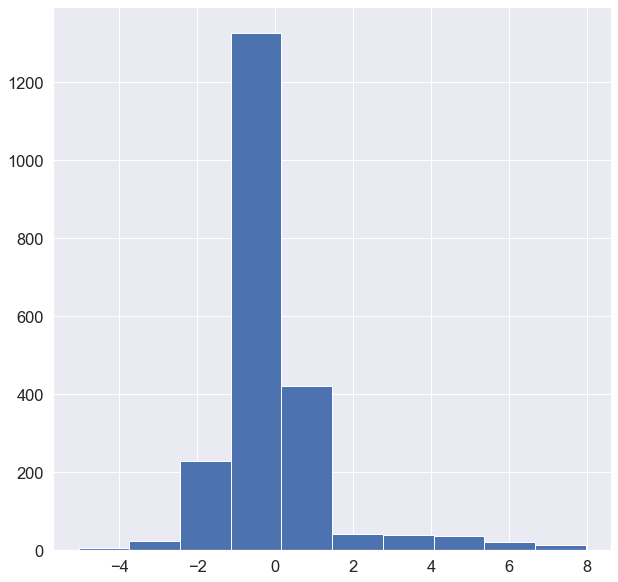

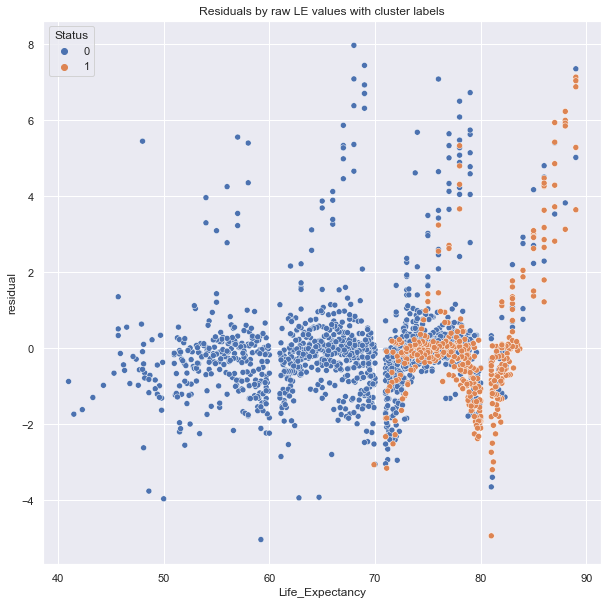

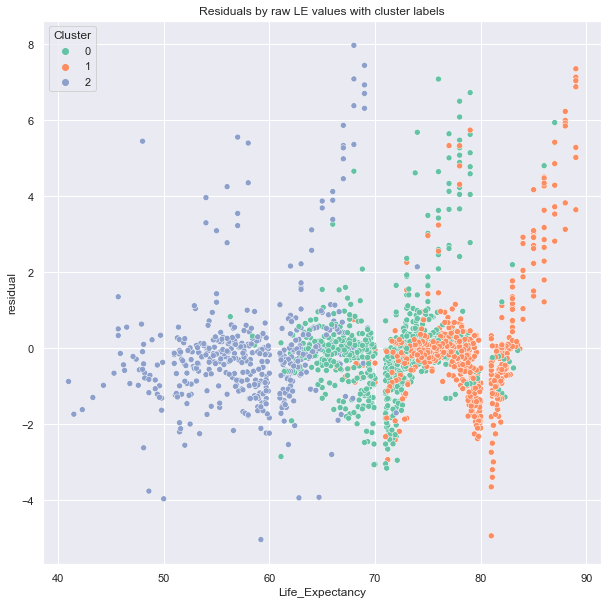

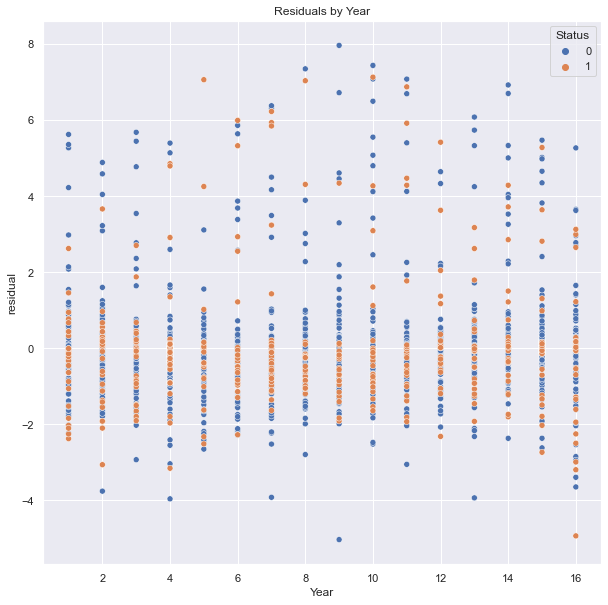

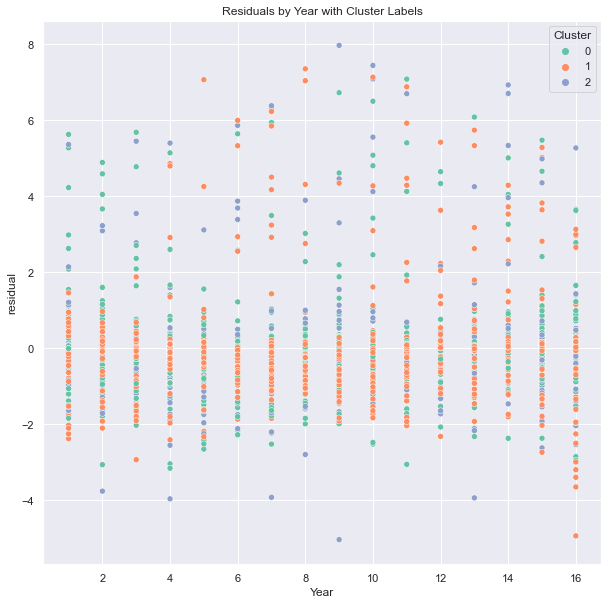

In [183]:
df_reg['residual']=risresult.resid

# Are residuals normally distributed?
plt.hist(df_reg['residual'])
sns.set(rc={'figure.figsize':(10,10)})
print(stats.shapiro(df_reg['residual']))
plt.show()

# Is variance constant for all values of the outcome?
sns.scatterplot(x='Life_Expectancy',y='residual',hue='Status',data=df_reg)
plt.title('Residuals by raw LE values with cluster labels')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

# Is variance constant for all values of the outcome?
sns.scatterplot(x='Life_Expectancy',y='residual',hue='Cluster',data=df_reg,palette='Set2')
plt.title('Residuals by raw LE values with cluster labels')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()


# Is variance constant for all values of the predictors?
sns.scatterplot(x='Year',y='residual',hue='Status',data=df_reg)
plt.title('Residuals by Year')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()


# Is variance constant for all values of the predictors?
sns.scatterplot(x='Year',y='residual',hue='Cluster',data=df_reg,palette='Set2')
plt.title('Residuals by Year with Cluster Labels')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()


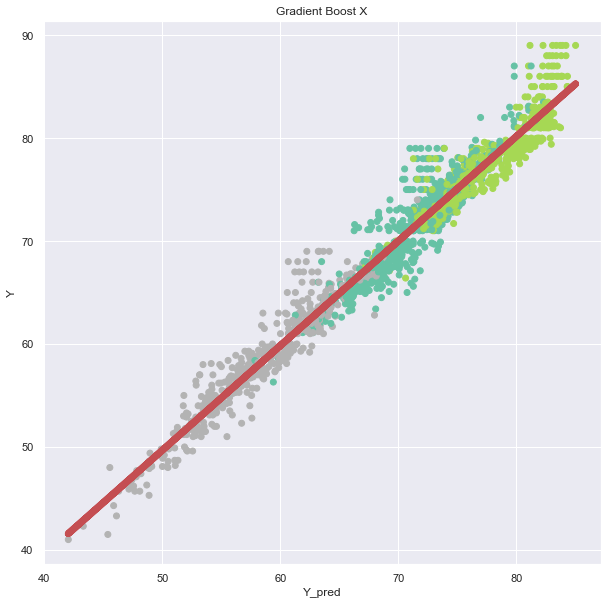

In [184]:
#plot out best with Cluster Labels
#Predictions
Y_pred=rf.predict(scale(df_reg.drop(['Life_Expectancy','Country','world','Status','residual','Cluster'],1)))
Y=df_reg['Life_Expectancy']                 
#plot
z1 =np.polyfit(Y_pred,Y,1)
z1poly = np.poly1d(z1) 
plt.scatter(Y_pred,Y,alpha=1,c=df_reg['Cluster'],cmap='Set2')
plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
plt.title('Gradient Boost {}'.format(z))
plt.xlabel('Y_pred')
plt.ylabel('Y')
plt.show()

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2157    Method:             REML           
No. Groups:       180     Scale:              2.2133         
Min. group size:  1       Log-Likelihood:     -4641.2790     
Max. group size:  16      Converged:          Yes            
Mean group size:  12.0                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          71.487    0.878 81.400 0.000 69.766 73.208
Status             11.268    1.341  8.403 0.000  8.640 13.896
Group Var         125.061   12.770                           
Group x Year Cov   -3.732    0.409                           
Year Var            0.172    0.015                           

RMSE: 1.370
Minimum LE: 41.9
Maximum LE: 85.9
Average Predicted LE: 70.7
LE Stand

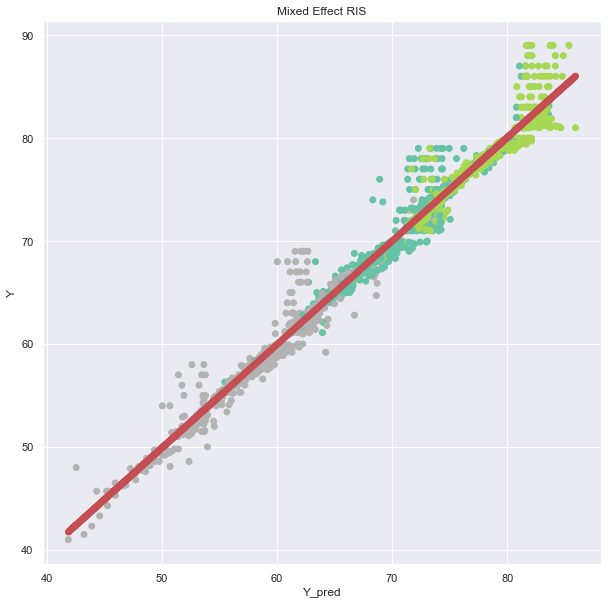

In [185]:
print(risresult.summary())
Y=df_reg['Life_Expectancy']
Y_pred = risresult.fittedvalues
RMSE=mean_squared_error(Y, Y_pred)**0.5
print('RMSE: {:0.3f}'.format(RMSE))
print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
#plot
z1 =np.polyfit(Y_pred,Y,1)
z1poly = np.poly1d(z1)
plt.scatter(Y_pred,Y,c=df_reg['Cluster'],alpha=1,cmap='Set2')
plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
plt.title('Mixed Effect RIS')
plt.xlabel('Y_pred')
plt.ylabel('Y')
plt.show()            

In [186]:
df_reg['Life_Expectancy'].describe()

count    2157.000000
mean       70.663418
std         8.447265
min        41.000000
25%        65.900000
50%        72.900000
75%        76.000000
max        89.000000
Name: Life_Expectancy, dtype: float64